# Import Libraries and Load The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
data = pd.read_excel('/content/drive/MyDrive/Case Study - Data Science (Egypt).xlsx', sheet_name=3)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
data.head(10)

PeriodVFP Outlet mnemonic                            Cell Name  Electronic  \
0        361          ZD8020  CENTRAL UPPER EGYPT-R-LARGE GROCERY       False   
1        361          ASQ005                      FATHALLAH ASWAQ        True   
2        361          QNR089          SOUTHERN UE R SMALL GROCERY       False   
3        361          KHZ049                          KHEIR ZAMAN        True   
4        361          LX4700        South Upper Egypt Supermarket       False   
5        361          RAG052                           RAGAB SONS        True   
6        361          KHZ052                          KHEIR ZAMAN        True   
7        361          RAG027                           RAGAB SONS        True   
8        361          RAG041                           RAGAB SONS        True   
9        361          KHZ032                          KHEIR ZAMAN        True   

         Region                  Channel  \
0  UPPER EGYPT             Large Grocery   
1    ALEXANDRIA  Supermarket/Key Account   
2  UPPER EGYPT             Small Grocery   
3        CAIRO   Supermarket/Key Account   
4  UPPER EGYPT   Supermarket/Key Account   
5        CAIRO   Supermarket/Key Account   
6        CAIRO   Supermarket/Key Account   
7        DELTA   Supermarket/Key Account   
8        CAIRO   Supermarket/Key Account   
9        CAIRO   Supermarket/Key Account   

                                                  Category name  \
0  CHEESE- BLOCK                                                  
1  CHEESE- BLOCK                                                  
2  CHEESE- BLOCK                                                  
3  CHEESE- BLOCK                                                  
4  CHEESE- BLOCK                                                  
5  CHEESE- BLOCK                                                  
6  CHEESE- BLOCK                                                  
7  CHEESE- BLOCK                                                  
8  CHEESE- BLOCK                                                  
9  CHEESE- BLOCK                                                  

                    Manufacturer name  Brand name  \
0                       OBOUR LAND CO  OBOUR LAND   
1                          HALAYEB CO     HALAYEB   
2                       OBOUR LAND CO  OBOUR LAND   
3                     LACTALIS-HALAWA   PRESIDENT   
4                     LACTALIS-HALAWA   PRESIDENT   
5         THE ARAB DAIRY PRODUCTS CO.       PANDA   
6  DOMTY - ARABIAN FOOD INDUSTRIES CO       DOMTY   
7         THE ARAB DAIRY PRODUCTS CO.       PANDA   
8                     LACTALIS-HALAWA   PRESIDENT   
9                     LACTALIS-HALAWA  GREEN LAND   

                         Product name   XFactor  Raw Sales Volume  \
0            OBOUR LAND FETA 500G CRT  186.6969           13.7750   
1             HALAYEB TALAGA 400G TUB    1.0000            2.6160   
2            OBOUR LAND FETA 500G CRT  212.0554            2.9500   
3             PRESIDENT FETA 250G CRT    1.0000            3.8125   
4             PRESIDENT FETA 500G TUB   10.9699            2.0350   
5  PANDA WHITE CHEESE OLIVE 250GR CRT    1.0000            0.2725   
6                 DOMTY FETA 250G CRT    1.0000            1.9075   
7           PANDA FETA LIGHT 500G CRT    1.0000           28.3200   
8             PRESIDENT FETA 500G TUB    1.0000           29.4100   
9        GREEN LAND BARAMILY 450G TUB    1.0000            2.9430   

   Extrapolated Sales Volume  
0                2571.749798  
1                   2.616000  
2                 625.563430  
3                   3.812500  
4                  22.323747  
5                   0.272500  
6                   1.907500  
7                  28.320000  
8                  29.410000  
9                   2.943000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994749 entries, 0 to 994748
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PeriodVFP                  994749 non-null  int64  
 1   Outlet mnemonic            994749 non-null  object 
 2   Cell Name                  994749 non-null  object 
 3   Electronic                 994749 non-null  bool   
 4   Region                     994749 non-null  object 
 5   Channel                    994749 non-null  object 
 6   Category name              983173 non-null  object 
 7   Manufacturer name          983173 non-null  object 
 8   Brand name                 983173 non-null  object 
 9   Product name               983173 non-null  object 
 10  XFactor                    994749 non-null  float64
 11  Raw Sales Volume           983173 non-null  float64
 12  Extrapolated Sales Volume  994749 non-null  float64
dtypes: bool(1), float64(3), int64

In [7]:
data.describe()

PeriodVFP        XFactor  Raw Sales Volume  \
count  994749.000000  994749.000000     983173.000000   
mean      372.193752      44.236991         17.598466   
std         6.946373     107.284482         72.831053   
min       361.000000       0.733100          0.000000   
25%       366.000000       1.000000          1.305000   
50%       372.000000       1.000000          4.830000   
75%       378.000000       3.316400         14.160000   
max       384.000000    1383.278000      13577.720000   

       Extrapolated Sales Volume  
count              994749.000000  
mean                  409.503943  
std                  1882.436078  
min                     0.000000  
25%                     1.635000  
50%                     7.897500  
75%                    54.470000  
max                150142.583232

In [8]:
def columns_info(data):
  cols = []
  dtypes = []
  unique = []
  n_unique = []

  for col in data.columns:
    cols.append(col)
    dtypes.append(data[col].dtype)
    unique.append(data[col].unique())
    n_unique.append(data[col].nunique())

  return pd.DataFrame({'names': cols, 'types': dtypes, 'unique':unique, 'n_unique':n_unique})

In [9]:
columns_info(data)

names    types  \
0                   PeriodVFP    int64   
1             Outlet mnemonic   object   
2                   Cell Name   object   
3                  Electronic     bool   
4                      Region   object   
5                     Channel   object   
6               Category name   object   
7           Manufacturer name   object   
8                  Brand name   object   
9                Product name   object   
10                    XFactor  float64   
11           Raw Sales Volume  float64   
12  Extrapolated Sales Volume  float64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   unique  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [10]:
description = pd.read_excel('/content/drive/MyDrive/Case Study - Data Science (Egypt).xlsx', sheet_name=1)
description

PeriodVFP  \
0             Outlet mnemonic   
1                   Cell Name   
2                  Electronic   
3                      Region   
4                     Channel   
5               Category name   
6           Manufacturer name   
7                  Brand name   
8                Product name   
9                     XFactor   
10           Raw Sales Volume   
11  Extrapolated Sales Volume   
12                        NaN   
13                        NaN   
14                        NaN   
15                        NaN   
16                        NaN   
17                        NaN   
18                        NaN   
19                        NaN   
20                        NaN   
21                        NaN   
22                        NaN   
23                        NaN   
24                        NaN   

                                                                                                24 Months from Jan'20 to Dec'21. i.e "361"= Jan'20, "384"=Dec'21  \
0                                                                                                                                Unique code identifying a store   
1                                                                            Cross between the region and channel to uniquely identify the location of the store   
2                              Identifies the source of data. TRUE = electronic data received from retailer. FALSE = manual collected data by Nielsen Field team   
3                                                                                                                             The region reporting for the store   
4                                                                                                                            The channel reporting for the store   
5                                                                   Split within White Cheese category for similar SKUs (block, block by weight, cottage cheese)   
6                                                                                         Company owner of the SKU (example: DOMTY - ARABIAN FOOD INDUSTRIES CO)   
7   Product identity within a company. A company can have multiple brands (example: Domty, Domty Plus, Gebnaty are brands of DOMTY - ARABIAN FOOD INDUSTRIES CO)   
8                                                                                        A unique identifier of each product (example: DOMTY PLUS FETA 250G CRT)   
9         The factor representing the number of similar stores in the universe (for example, XFactor = 2 means that there are 10 similar stores in the universe)   
10                                                                                                                                       Sales per stores in KGs   
11                                                Extrapolated sales per stores in Liters (extrapolated = raw sales volume * x-factor representing the universe)   
12                                                                                                                                                           NaN   
13                                                                                                                                                           NaN   
14                                                                                                                                                           NaN   
15                                                                                                                                                           NaN   
16                                                                                                                                                           NaN   
17                                                                                                                                                           NaN   
18                                           

In [11]:
data.nunique()

PeriodVFP                        24
Outlet mnemonic                2235
Cell Name                       119
Electronic                        2
Region                            5
Channel                           4
Category name                     3
Manufacturer name               712
Brand name                      815
Product name                   1749
XFactor                        1797
Raw Sales Volume              18143
Extrapolated Sales Volume    176870
dtype: int64

In [12]:
data['Channel'].value_counts()

Channel
Supermarket/Key Account     812525
Small Grocery                97446
Large Grocery                66497
Haberdashery/Kiosk/Mekla     18281
Name: count, dtype: int64

In [13]:
data['Category name'].value_counts()

Category name
CHEESE- BLOCK                                                   960832
CHEESE (BLOCKS SOLD BY WEIGHT)                                   15413
CHEESE- COTTAGE                                                   6928
Name: count, dtype: int64

In [14]:
data['Electronic'].value_counts()

Electronic
True     786690
False    208059
Name: count, dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
data.isnull().sum()

PeriodVFP                        0
Outlet mnemonic                  0
Cell Name                        0
Electronic                       0
Region                           0
Channel                          0
Category name                11576
Manufacturer name            11576
Brand name                   11576
Product name                 11576
XFactor                          0
Raw Sales Volume             11576
Extrapolated Sales Volume        0
dtype: int64

In [17]:
(data.isnull().sum() / len(data) * 100).round(2)

PeriodVFP                    0.00
Outlet mnemonic              0.00
Cell Name                    0.00
Electronic                   0.00
Region                       0.00
Channel                      0.00
Category name                1.16
Manufacturer name            1.16
Brand name                   1.16
Product name                 1.16
XFactor                      0.00
Raw Sales Volume             1.16
Extrapolated Sales Volume    0.00
dtype: float64

In [18]:
missing_data_rows = data[data[['Category name', 'Manufacturer name', 'Brand name', 'Product name', 'Raw Sales Volume']].isnull().any(axis=1)]
len(missing_data_rows)

11576

*   This indicates that the rows with missing values are the same across these columns.
*   The Raw Sales Volume and Extrapolated Sales Volume columns are also missing values, which are critical for any sales analysis.
*   So, It would not be efficient or useful to attempt to fill these rows.



In [19]:
missing_data_rows.head()

PeriodVFP Outlet mnemonic                        Cell Name  Electronic  \
306        361          DMT035              EAST DELTA-U-KIOSKS       False   
307        361          KAR046  EAST DELTA-R-MEKLA (ROASTERIES)       False   
308        361          A00862       ALEXANDRIA-U-SMALL GROCERY       False   
309        361          DMT049      EAST DELTA-U-HABERDASHERIES       False   
310        361          IS1686      CANAL ZONE-U-HABERDASHERIES       False   

          Region                   Channel Category name Manufacturer name  \
306       DELTA   Haberdashery/Kiosk/Mekla           NaN               NaN   
307       DELTA   Haberdashery/Kiosk/Mekla           NaN               NaN   
308   ALEXANDRIA             Small Grocery           NaN               NaN   
309       DELTA   Haberdashery/Kiosk/Mekla           NaN               NaN   
310  CANAL ZONE   Haberdashery/Kiosk/Mekla           NaN               NaN   

    Brand name Product name   XFactor  Raw Sales Volume  \
306        NaN          NaN   75.1340               NaN   
307        NaN          NaN  188.7477               NaN   
308        NaN          NaN  201.3802               NaN   
309        NaN          NaN   65.9773               NaN   
310        NaN          NaN   45.0099               NaN   

     Extrapolated Sales Volume  
306                        0.0  
307                        0.0  
308                        0.0  
309                        0.0  
310                        0.0

In [65]:
data.dropna(subset=['Category name', 'Manufacturer name', 'Brand name', 'Product name', 'Raw Sales Volume'], inplace=True)

In [21]:
data.isnull().sum()

PeriodVFP                    0
Outlet mnemonic              0
Cell Name                    0
Electronic                   0
Region                       0
Channel                      0
Category name                0
Manufacturer name            0
Brand name                   0
Product name                 0
XFactor                      0
Raw Sales Volume             0
Extrapolated Sales Volume    0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983173 entries, 0 to 994748
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PeriodVFP                  983173 non-null  int64  
 1   Outlet mnemonic            983173 non-null  object 
 2   Cell Name                  983173 non-null  object 
 3   Electronic                 983173 non-null  bool   
 4   Region                     983173 non-null  object 
 5   Channel                    983173 non-null  object 
 6   Category name              983173 non-null  object 
 7   Manufacturer name          983173 non-null  object 
 8   Brand name                 983173 non-null  object 
 9   Product name               983173 non-null  object 
 10  XFactor                    983173 non-null  float64
 11  Raw Sales Volume           983173 non-null  float64
 12  Extrapolated Sales Volume  983173 non-null  float64
dtypes: bool(1), float64(3), int64(1), 

In [23]:
data['PeriodVFP'].nunique()

24

The dataset spans a total of 24 months, covering a period from January 2020 to December 2021. Each month is represented by a unique PeriodVFP code, which corresponds to a specific date.

In [24]:
period_mapping = {
    361: '2020-01-01', 362: '2020-02-01', 363: '2020-03-01',
    364: '2020-04-01', 365: '2020-05-01', 366: '2020-06-01',
    367: '2020-07-01', 368: '2020-08-01', 369: '2020-09-01',
    370: '2020-10-01', 371: '2020-11-01', 372: '2020-12-01',
    373: '2021-01-01', 374: '2021-02-01', 375: '2021-03-01',
    376: '2021-04-01', 377: '2021-05-01', 378: '2021-06-01',
    379: '2021-07-01', 380: '2021-08-01', 381: '2021-09-01',
    382: '2021-10-01', 383: '2021-11-01', 384: '2021-12-01'
}

period_df = pd.DataFrame(list(period_mapping.items()), columns=['PeriodVFP', 'PeriodDate'])
period_df['PeriodDate'] = pd.to_datetime(period_df['PeriodDate']).dt.date

period_df

PeriodVFP  PeriodDate
0         361  2020-01-01
1         362  2020-02-01
2         363  2020-03-01
3         364  2020-04-01
4         365  2020-05-01
5         366  2020-06-01
6         367  2020-07-01
7         368  2020-08-01
8         369  2020-09-01
9         370  2020-10-01
10        371  2020-11-01
11        372  2020-12-01
12        373  2021-01-01
13        374  2021-02-01
14        375  2021-03-01
15        376  2021-04-01
16        377  2021-05-01
17        378  2021-06-01
18        379  2021-07-01
19        380  2021-08-01
20        381  2021-09-01
21        382  2021-10-01
22        383  2021-11-01
23        384  2021-12-01

In [66]:
data = pd.merge(data, period_df, on='PeriodVFP', how='left')
data.head()

PeriodVFP Outlet mnemonic                            Cell Name  Electronic  \
0        361          ZD8020  CENTRAL UPPER EGYPT-R-LARGE GROCERY       False   
1        361          ASQ005                      FATHALLAH ASWAQ        True   
2        361          QNR089          SOUTHERN UE R SMALL GROCERY       False   
3        361          KHZ049                          KHEIR ZAMAN        True   
4        361          LX4700        South Upper Egypt Supermarket       False   

         Region                  Channel  \
0  UPPER EGYPT             Large Grocery   
1    ALEXANDRIA  Supermarket/Key Account   
2  UPPER EGYPT             Small Grocery   
3        CAIRO   Supermarket/Key Account   
4  UPPER EGYPT   Supermarket/Key Account   

                                                  Category name  \
0  CHEESE- BLOCK                                                  
1  CHEESE- BLOCK                                                  
2  CHEESE- BLOCK                                                  
3  CHEESE- BLOCK                                                  
4  CHEESE- BLOCK                                                  

  Manufacturer name  Brand name              Product name   XFactor  \
0     OBOUR LAND CO  OBOUR LAND  OBOUR LAND FETA 500G CRT  186.6969   
1        HALAYEB CO     HALAYEB   HALAYEB TALAGA 400G TUB    1.0000   
2     OBOUR LAND CO  OBOUR LAND  OBOUR LAND FETA 500G CRT  212.0554   
3   LACTALIS-HALAWA   PRESIDENT   PRESIDENT FETA 250G CRT    1.0000   
4   LACTALIS-HALAWA   PRESIDENT   PRESIDENT FETA 500G TUB   10.9699   

   Raw Sales Volume  Extrapolated Sales Volume  PeriodDate  
0           13.7750                2571.749798  2020-01-01  
1            2.6160                   2.616000  2020-01-01  
2            2.9500                 625.563430  2020-01-01  
3            3.8125                   3.812500  2020-01-01  
4            2.0350                  22.323747  2020-01-01

In [67]:
data.drop(['PeriodVFP'], axis=1, inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983173 entries, 0 to 983172
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Outlet mnemonic            983173 non-null  object 
 1   Cell Name                  983173 non-null  object 
 2   Electronic                 983173 non-null  bool   
 3   Region                     983173 non-null  object 
 4   Channel                    983173 non-null  object 
 5   Category name              983173 non-null  object 
 6   Manufacturer name          983173 non-null  object 
 7   Brand name                 983173 non-null  object 
 8   Product name               983173 non-null  object 
 9   XFactor                    983173 non-null  float64
 10  Raw Sales Volume           983173 non-null  float64
 11  Extrapolated Sales Volume  983173 non-null  float64
 12  PeriodDate                 983173 non-null  object 
dtypes: bool(1), float64(3), objec

In [28]:
data.head(10)

Outlet mnemonic                            Cell Name  Electronic  \
0          ZD8020  CENTRAL UPPER EGYPT-R-LARGE GROCERY       False   
1          ASQ005                      FATHALLAH ASWAQ        True   
2          QNR089          SOUTHERN UE R SMALL GROCERY       False   
3          KHZ049                          KHEIR ZAMAN        True   
4          LX4700        South Upper Egypt Supermarket       False   
5          RAG052                           RAGAB SONS        True   
6          KHZ052                          KHEIR ZAMAN        True   
7          RAG027                           RAGAB SONS        True   
8          RAG041                           RAGAB SONS        True   
9          KHZ032                          KHEIR ZAMAN        True   

         Region                  Channel  \
0  UPPER EGYPT             Large Grocery   
1    ALEXANDRIA  Supermarket/Key Account   
2  UPPER EGYPT             Small Grocery   
3        CAIRO   Supermarket/Key Account   
4  UPPER EGYPT   Supermarket/Key Account   
5        CAIRO   Supermarket/Key Account   
6        CAIRO   Supermarket/Key Account   
7        DELTA   Supermarket/Key Account   
8        CAIRO   Supermarket/Key Account   
9        CAIRO   Supermarket/Key Account   

                                                  Category name  \
0  CHEESE- BLOCK                                                  
1  CHEESE- BLOCK                                                  
2  CHEESE- BLOCK                                                  
3  CHEESE- BLOCK                                                  
4  CHEESE- BLOCK                                                  
5  CHEESE- BLOCK                                                  
6  CHEESE- BLOCK                                                  
7  CHEESE- BLOCK                                                  
8  CHEESE- BLOCK                                                  
9  CHEESE- BLOCK                                                  

                    Manufacturer name  Brand name  \
0                       OBOUR LAND CO  OBOUR LAND   
1                          HALAYEB CO     HALAYEB   
2                       OBOUR LAND CO  OBOUR LAND   
3                     LACTALIS-HALAWA   PRESIDENT   
4                     LACTALIS-HALAWA   PRESIDENT   
5         THE ARAB DAIRY PRODUCTS CO.       PANDA   
6  DOMTY - ARABIAN FOOD INDUSTRIES CO       DOMTY   
7         THE ARAB DAIRY PRODUCTS CO.       PANDA   
8                     LACTALIS-HALAWA   PRESIDENT   
9                     LACTALIS-HALAWA  GREEN LAND   

                         Product name   XFactor  Raw Sales Volume  \
0            OBOUR LAND FETA 500G CRT  186.6969           13.7750   
1             HALAYEB TALAGA 400G TUB    1.0000            2.6160   
2            OBOUR LAND FETA 500G CRT  212.0554            2.9500   
3             PRESIDENT FETA 250G CRT    1.0000            3.8125   
4             PRESIDENT FETA 500G TUB   10.9699            2.0350   
5  PANDA WHITE CHEESE OLIVE 250GR CRT    1.0000            0.2725   
6                 DOMTY FETA 250G CRT    1.0000            1.9075   
7           PANDA FETA LIGHT 500G CRT    1.0000           28.3200   
8             PRESIDENT FETA 500G TUB    1.0000           29.4100   
9        GREEN LAND BARAMILY 450G TUB    1.0000            2.9430   

   Extrapolated Sales Volume  PeriodDate  
0                2571.749798  2020-01-01  
1                   2.616000  2020-01-01  
2                 625.563430  2020-01-01  
3                   3.812500  2020-01-01  
4                  22.323747  2020-01-01  
5                   0.272500  2020-01-01  
6                   1.907500  2020-01-01  
7                  28.320000  2020-01-01  
8                  29.410000  2020-01-01  
9                   2.943000  2020-01-01

To save a cleaned DataFrame from Google Colab to my local computer as an Excel file

In [ ]:
# data.to_excel('cleaned_data.xlsx', index=False)

In [ ]:
spearman_corr = data[data.select_dtypes(include=['number']).columns].corr(method='spearman')
spearman_corr

XFactor  Raw Sales Volume  \
XFactor                    1.000000          0.019228   
Raw Sales Volume           0.019228          1.000000   
Extrapolated Sales Volume  0.581246          0.766813   

                           Extrapolated Sales Volume  
XFactor                                     0.581246  
Raw Sales Volume                            0.766813  
Extrapolated Sales Volume                   1.000000

In [ ]:
kendall_corr = data[data.select_dtypes(include=['number']).columns].corr(method='kendall')
kendall_corr

XFactor  Raw Sales Volume  \
XFactor                    1.000000          0.014481   
Raw Sales Volume           0.014481          1.000000   
Extrapolated Sales Volume  0.468317          0.684999   

                           Extrapolated Sales Volume  
XFactor                                     0.468317  
Raw Sales Volume                            0.684999  
Extrapolated Sales Volume                   1.000000

In [ ]:
corr = data[data.select_dtypes(include=['number']).columns].corr()
corr

XFactor  Raw Sales Volume  \
XFactor                    1.000000         -0.043829   
Raw Sales Volume          -0.043829          1.000000   
Extrapolated Sales Volume  0.487164          0.103025   

                           Extrapolated Sales Volume  
XFactor                                     0.487164  
Raw Sales Volume                            0.103025  
Extrapolated Sales Volume                   1.000000

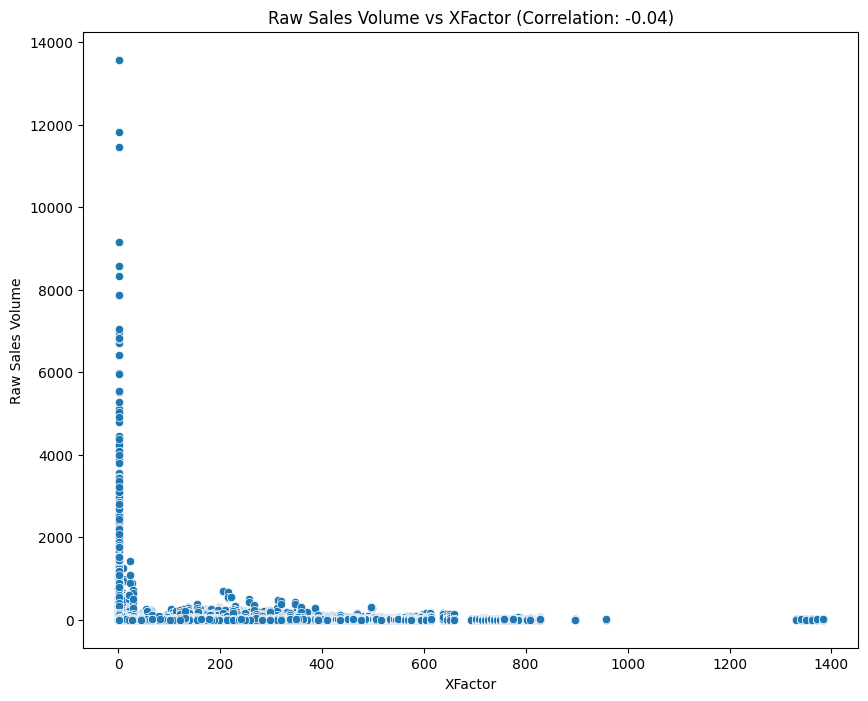

In [ ]:
corr_value = corr.loc['XFactor', 'Raw Sales Volume']

plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='XFactor', y='Raw Sales Volume')
plt.title(f'Raw Sales Volume vs XFactor (Correlation: {corr_value:.2f})')
plt.xlabel('XFactor')
plt.ylabel('Raw Sales Volume')
plt.show()

*   There are a few high raw sales volumes concentrated at lower XFactor values, and as XFactor increases, the raw sales volume tends to be lower and more dispersed.
*   This could suggest that stores with higher XFactors (possibly more stores or outlets) generally have lower individual raw sales volumes, or there might be other underlying factors influencing this trend.



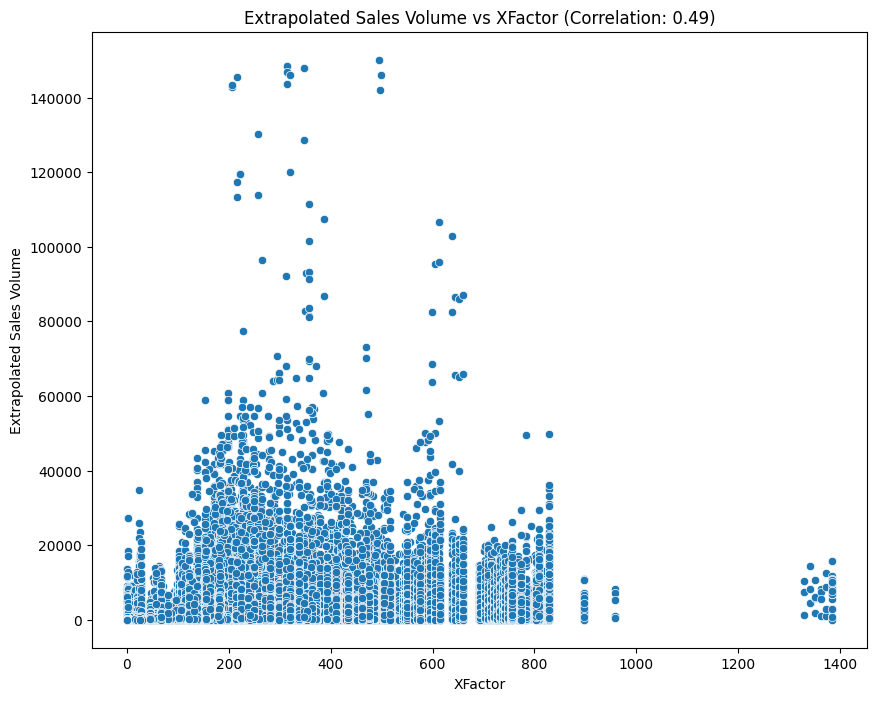

In [ ]:
corr_value = corr.loc['XFactor', 'Extrapolated Sales Volume']

plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='XFactor', y='Extrapolated Sales Volume')
plt.title(f'Extrapolated Sales Volume vs XFactor (Correlation: {corr_value:.2f})')
plt.xlabel('XFactor')
plt.ylabel('Extrapolated Sales Volume')
plt.show()

*   The scatter plot shows a more dispersed pattern, indicating a wider spread of extrapolated sales volumes across different XFactor values.
*   This means that as the number of stores or outlets (XFactor) increases, the extrapolated sales volume tends to increase.



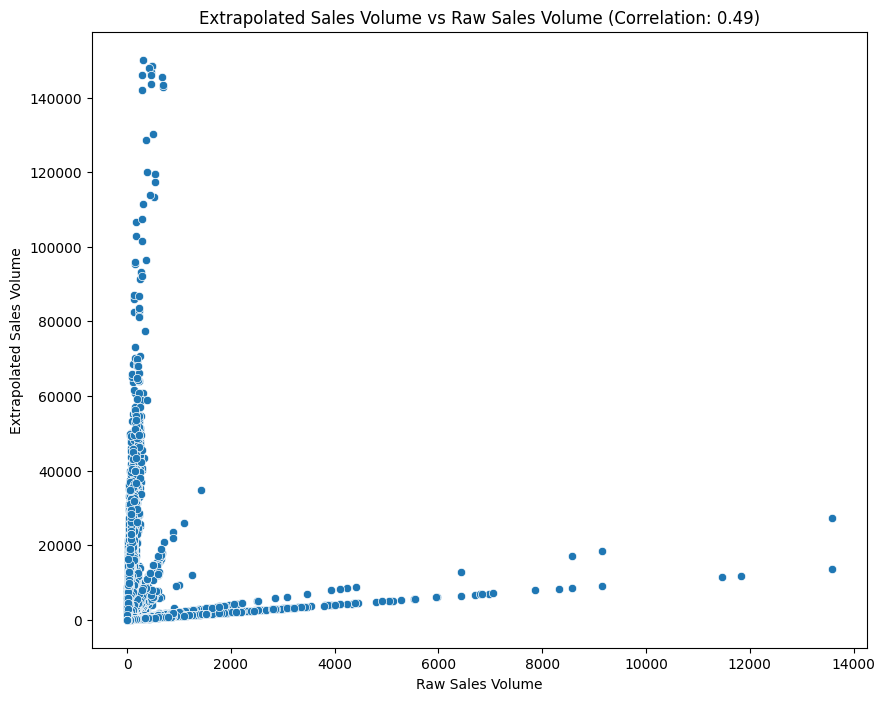

In [ ]:
corr_value = corr.loc['XFactor', 'Extrapolated Sales Volume']

plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Raw Sales Volume', y='Extrapolated Sales Volume')
plt.title(f'Extrapolated Sales Volume vs Raw Sales Volume (Correlation: {corr_value:.2f})')
plt.xlabel('Raw Sales Volume')
plt.ylabel('Extrapolated Sales Volume')
plt.show()

*   The plot suggests a positive correlation between extrapolated sales volume and raw sales volume, particularly at lower values.
*   However, as raw sales volume increases, the spread in extrapolated sales volume also increases, showing variability in extrapolation results.



# 1. Time Series Analysis

## Extrapolated Sales Volume Over Time

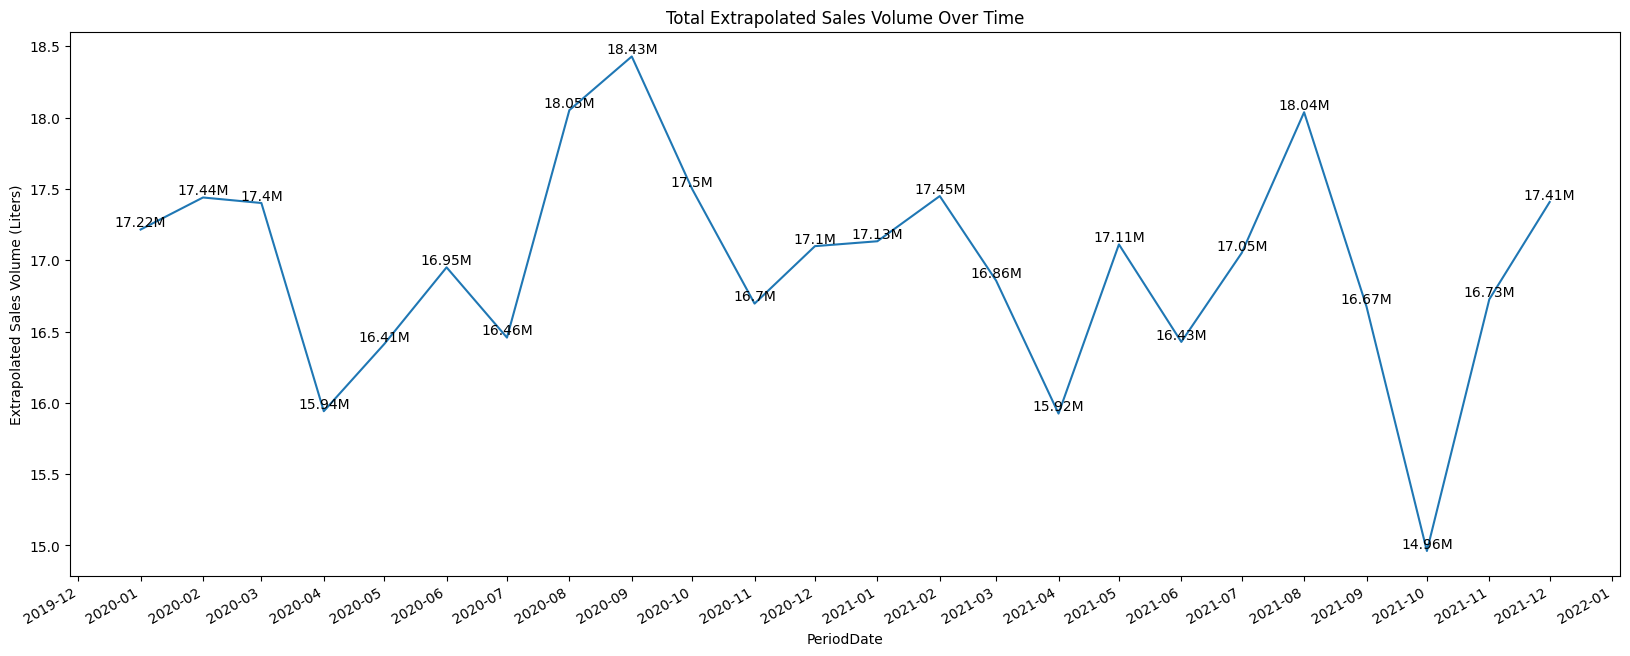

In [ ]:
import matplotlib.dates as mdates
from math import ceil

data_sum = data.groupby('PeriodDate', as_index=False)['Extrapolated Sales Volume'].sum()
data_sum['Extrapolated Sales Volume'] = data_sum['Extrapolated Sales Volume'] / 1e6

plt.figure(figsize=(20,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data_sum, ci=None)
plt.title('Total Extrapolated Sales Volume Over Time')

# adding data labels to the chart
for x, y in zip(data_sum['PeriodDate'], data_sum['Extrapolated Sales Volume']):
    plt.text(x, y, f'{round(y,2)}M', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set the interval for months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the dates

plt.ylabel('Extrapolated Sales Volume (Liters)')

# Automatically format the date labels to avoid overlapping
plt.gcf().autofmt_xdate()

plt.show()

### Trends

* The data exhibits fluctuations over the months, with noticeable peaks and troughs.
* In January 2020, the sales volume starts at approximately 17.2 million.
* The highest sales volume appears in September 2020 at about 18.4 million, followed by another peak in August 2021 at 18.0 million.
* Conversely, the lowest sales volume occurs in April 2021 at 15.9 million.
* **Conclusion:** While there are fluctuations, the data shows an overall gradual increase in sales volume from January 2020 through the end of 2021, suggesting a positive long-term trend despite some month-to-month variability.

### Seasonality

* There are peaks around the late summer (August and September) in both 2020 and 2021.
* Similarly, there are dips in April 2020 and April 2021, suggesting that spring months may see lower sales.
* **Conclusion:** The data appears to exhibit seasonal effects, with sales increasing in late summer and possibly decreasing in spring. This pattern can be attributed to various factors

## Annual Growth Rate (AGR)
 is a measure of the year-over-year growth of a particular value expressed as a percentage. It helps in understanding how a quantity has changed over time and is commonly used in finance and business to assess performance.

$$
AGR = \left( \frac{Ending \, Value}{Beginning \, Value} \right)^{\frac{1}{n}} - 1
$$


In [ ]:
data_sum = data.groupby('PeriodDate', as_index=False)['Extrapolated Sales Volume'].sum()
data_sum['Extrapolated Sales Volume'] = data_sum['Extrapolated Sales Volume'] / 1e6

In [ ]:
agr = ((np.power(data_sum['Extrapolated Sales Volume'].iloc[-1] / data_sum['Extrapolated Sales Volume'].iloc[0], 1/2)) - 1) * 100
print("Annual Growth Rate = ", round(agr, 2), "%")

Annual Growth Rate =  0.56 %


* The result of the annual growth rate (AGR) calculation is approximately 0.56%. This indicates a modest growth in the extrapolated sales volume from January 2020 to December 2021.

## Raw Sales Volume Over Time

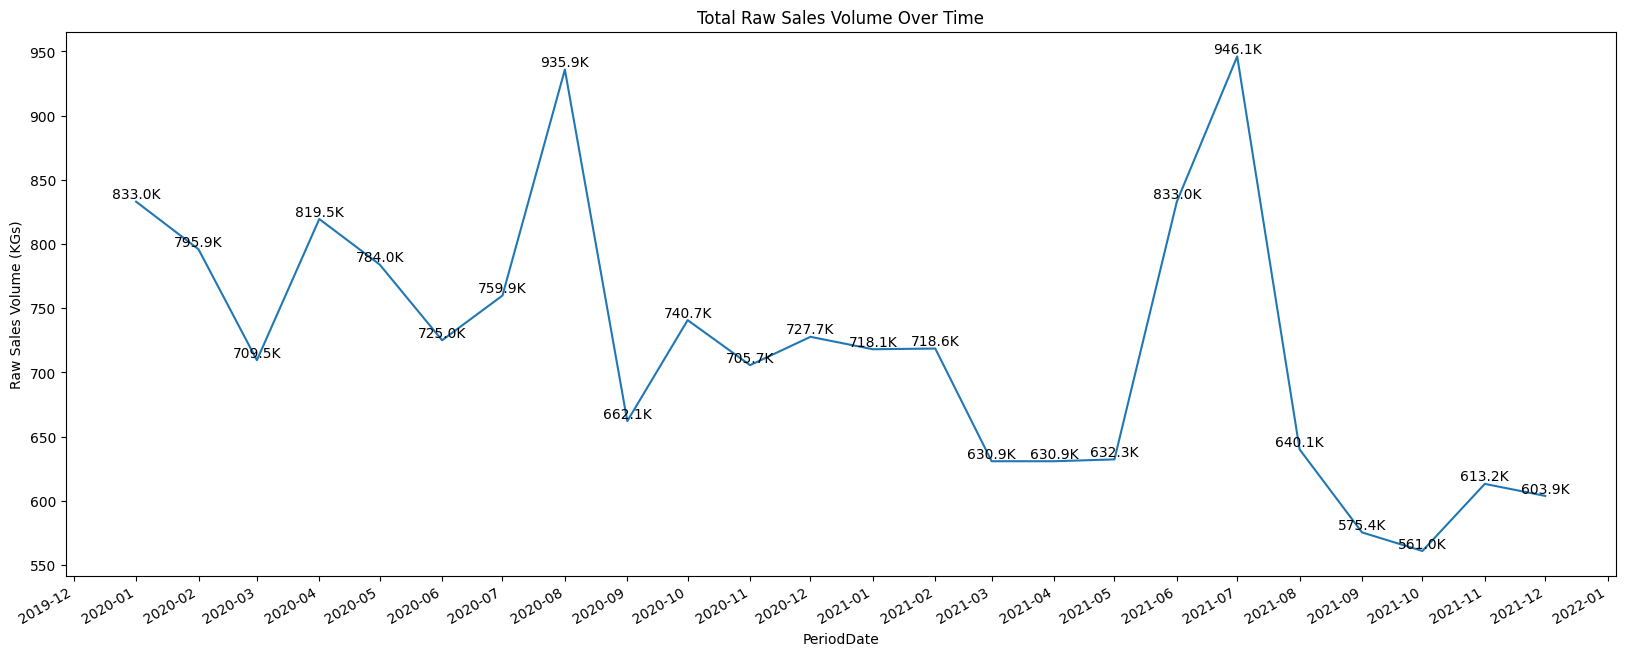

In [ ]:
data_sum = data.groupby('PeriodDate', as_index=False)['Raw Sales Volume'].sum()
data_sum['Raw Sales Volume'] = data_sum['Raw Sales Volume'] / 1000

plt.figure(figsize=(20,8))
ax = sns.lineplot(x='PeriodDate', y='Raw Sales Volume', data=data_sum, ci=None)
plt.title('Total Raw Sales Volume Over Time')

for x, y in zip(data_sum['PeriodDate'], data_sum['Raw Sales Volume']):
    plt.text(x, y, f'{round(y,1)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.ylabel('Raw Sales Volume (KGs)')

plt.gcf().autofmt_xdate()

plt.show()

### Trend

* The overall Trend in the **Raw Sales Volume** data appears to be downward over the specified period from January 2020 to December 2021.
* The data starts with a peak of 833K Liters in the stores in January 2020.
* After that, there is a decline in sales volume.
* In April 2020, the sales volume begins to recover, with a notable peak in August 2020.
* The sales volume appears to fluctuate in 2021, with another peak in July, but with generally lower values compared to the peak in August 2020.

### Seasonality

* The highest value is observed in July 2021 (946K KGs per Stores), which could indicate a seasonal spike during this month.
* The sales volumes dip noticeably in September and October, indicating potential seasonal lows.

## Extrapolated Sales Volume for each Category Over Time

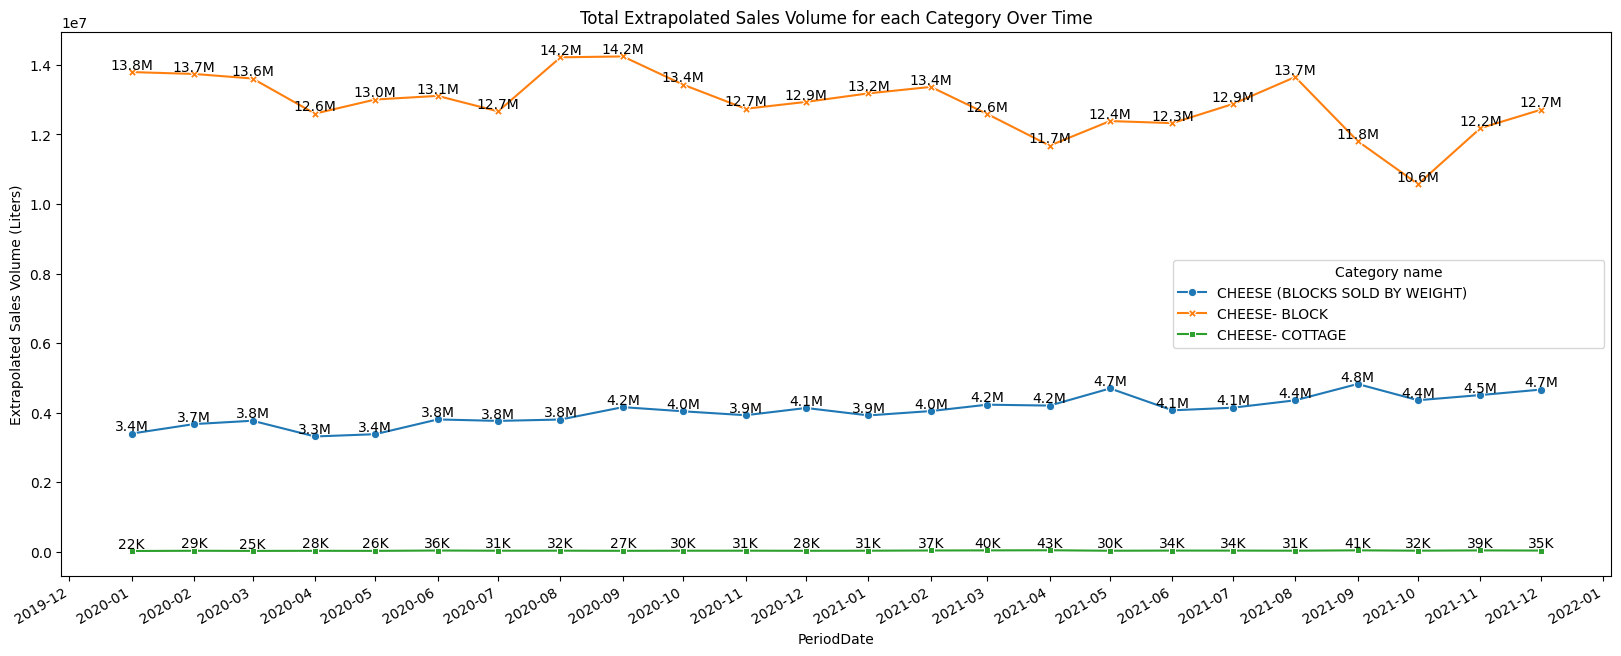

In [ ]:
data_sum = data.groupby(['PeriodDate', 'Category name'], as_index=False)['Extrapolated Sales Volume'].sum()

plt.figure(figsize=(20,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data_sum, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title('Total Extrapolated Sales Volume for each Category Over Time')

for x, y in zip(data_sum['PeriodDate'], data_sum['Extrapolated Sales Volume']):
  if y > 1e6:
    plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
  else:
    plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.ylabel('Extrapolated Sales Volume (Liters)')

plt.gcf().autofmt_xdate()
plt.show()

#### **CHEESE (BLOCKS SOLD BY WEIGHT)**

* **Trends:** From January 2020 to December 2021, the sales volume of this category shows an upward trend. Starting at around 3.39 million in January 2020, it rises to 4.66 million by December 2021. The values generally increase over time, despite small fluctuations.
* **Seasonality:** There's some seasonality noticeable, where sales volumes increase in the latter half of the year (peaks in August, September, and December in both 2020 and 2021). This could indicate that this type of cheese is more popular during certain times.

#### **CHEESE - BLOCK**

* **Trends:** The trend here is more flat with slight fluctuations. The sales start at around 13.79 million in January 2020 and end at 12.71 million in December 2021, showing a small decrease. The category remains relatively stable with slight drops in mid-2020 and mid-2021.
* **Seasonality:** There are slight peaks in August in both 2020 and 2021, indicating that sales might increase around certain periods. However, the seasonal pattern is not as strong as other categories.


#### **CHEESE - COTTAGE**

* **Trends:** The trend for cottage cheese shows a slight increase over time. The sales volume increases from around 21,938 in January 2020 to about 34,623 by December 2021. Although the trend is upward, the change is relatively small compared to other cheese categories.

In [ ]:
agg_data = data.groupby(['PeriodDate', 'Category name'])['Extrapolated Sales Volume'].sum().unstack()
agg_data

Category name  CHEESE (BLOCKS SOLD BY WEIGHT)                                \
PeriodDate                                                                    
2020-01-01                                                     3.399169e+06   
2020-02-01                                                     3.671428e+06   
2020-03-01                                                     3.767690e+06   
2020-04-01                                                     3.315432e+06   
2020-05-01                                                     3.380946e+06   
2020-06-01                                                     3.805329e+06   
2020-07-01                                                     3.763125e+06   
2020-08-01                                                     3.802443e+06   
2020-09-01                                                     4.158417e+06   
2020-10-01                                                     4.038790e+06   
2020-11-01                                                     3.926376e+06   
2020-12-01                                                     4.134553e+06   
2021-01-01                                                     3.920673e+06   
2021-02-01                                                     4.046155e+06   
2021-03-01                                                     4.229465e+06   
2021-04-01                                                     4.203194e+06   
2021-05-01                                                     4.696332e+06   
2021-06-01                                                     4.067287e+06   
2021-07-01                                                     4.142502e+06   
2021-08-01                                                     4.355084e+06   
2021-09-01                                                     4.824318e+06   
2021-10-01                                                     4.357884e+06   
2021-11-01                                                     4.506445e+06   
2021-12-01                                                     4.663060e+06   

Category name  CHEESE- BLOCK                                                 \
PeriodDate                                                                    
2020-01-01                                                     1.379409e+07   
2020-02-01                                                     1.374012e+07   
2020-03-01                                                     1.360889e+07   
2020-04-01                                                     1.259879e+07   
2020-05-01                                                     1.300506e+07   
2020-06-01                                                     1.310918e+07   
2020-07-01                                                     1.266418e+07   
2020-08-01                                                     1.421873e+07   
2020-09-01                                                     1.424342e+07   
2020-10-01                                                     1.343038e+07   
2020-11-01                                                     1.273878e+07   
2020-12-01                                                     1.293625e+07   
2021-01-01                                                     1.318209e+07   
2021-02-01                                                     1.336704e+07   
2021-03-01                                                     1.258791e+07   
2021-04-01                                                     1.167855e+07   
2021-05-01                                                     1.238528e+07   
2021-06-01                                                     1.232621e+07   
2021-07-01                                                     1.287510e+07   
2021-08-01                                                     1.365184e+07   
2021-09-01                                                     1.180993e+07   
2021-10-01                                                     1.057199e+07   
2021-11-01                                       

In [ ]:
agr_by_weight = (np.power(agg_data.iloc[-1,0] / agg_data.iloc[0,0], 1/2) -1 ) * 100
agr_block = (np.power(agg_data.iloc[-1,1] / agg_data.iloc[0,1], 1/2) -1 ) * 100
agr_cottage = (np.power(agg_data.iloc[-1,-1] / agg_data.iloc[0,-1], 1/2) -1 ) * 100

print('Annual Groth Rate for CHEESE (BLOCKS SOLD BY WEIGHT):', round(agr_by_weight, 2), '%')
print('Annual Groth Rate for CHEESE - BLOCK:', round(agr_block, 2), '%')
print('Annual Groth Rate for CHEESE - COTTAGE:', round(agr_cottage, 2), '%')

Annual Groth Rate for CHEESE (BLOCKS SOLD BY WEIGHT): 17.12 %
Annual Groth Rate for CHEESE - BLOCK: -4.01 %
Annual Groth Rate for CHEESE - COTTAGE: 25.63 %


**CHEESE (BLOCKS SOLD BY WEIGHT)**
* This category shows a healthy growth rate of over 17%, indicating a significant increase in demand for cheese blocks sold by weight. This upward trend suggests that this product is becoming increasingly popular with consumers, possibly due to preferences for bulk purchases or changing dietary trends.
* This category is likely a key driver of growth in the overall cheese market.

**CHEESE - BLOCK**
* The negative growth rate of -4.01% indicates that cheese blocks are losing some of their market share or popularity. This decline could be attributed to shifts in consumer preferences toward other cheese forms, price competition, or increased competition from similar products.
* The company may need to investigate potential reasons for this decline and consider strategies such as marketing, product innovation, or adjustments to pricing to address the downward trend.

**CHEESE - COTTAGE**
* With a strong 25.63% annual growth rate, cottage cheese is experiencing the fastest growth among the three categories. This surge may reflect growing consumer interest in cottage cheese.

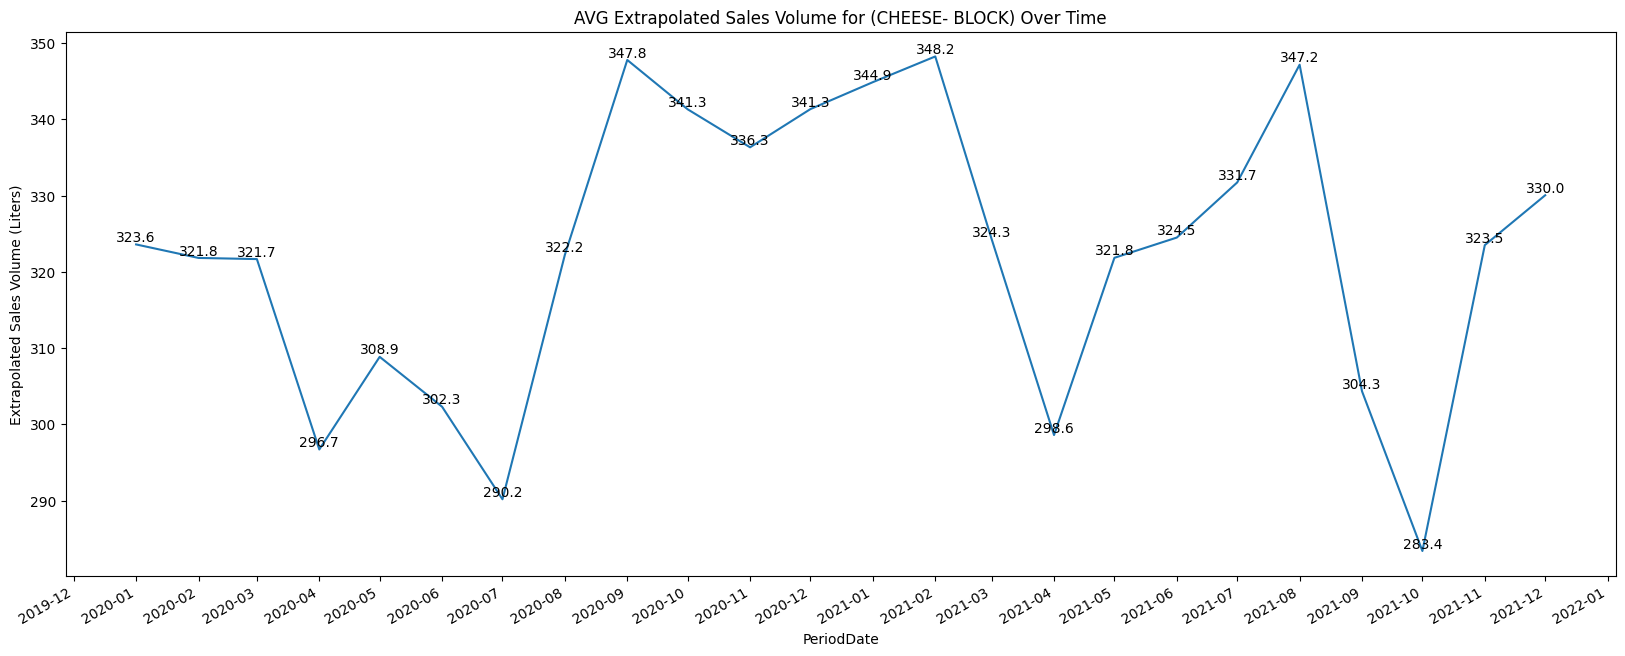

In [ ]:
category_name = 'CHEESE- BLOCK'
filtered_data = data[data['Category name'].str.strip() == category_name]
aggregated_data = filtered_data.groupby('PeriodDate', as_index=False)['Extrapolated Sales Volume'].mean()

plt.figure(figsize=(20, 8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=aggregated_data, ci=None, markers=True, dashes=False)
plt.title(f'AVG Extrapolated Sales Volume for ({category_name}) Over Time')
plt.xlabel('PeriodDate')
plt.ylabel('Extrapolated Sales Volume (Liters)')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

for x, y in zip(aggregated_data['PeriodDate'], aggregated_data['Extrapolated Sales Volume']):
    plt.text(x, y, f'{round(y,1)}', ha='center', va='bottom')

plt.gcf().autofmt_xdate()
plt.show()

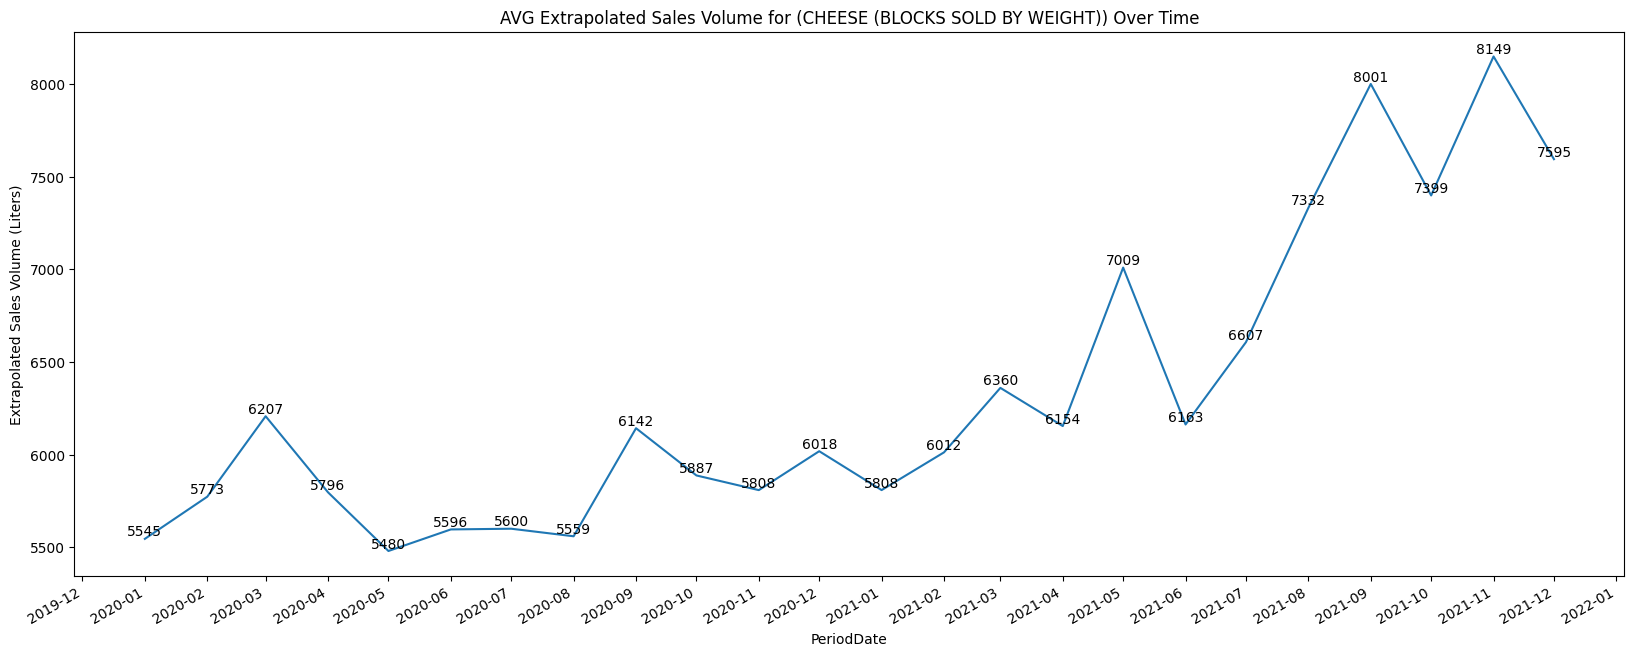

In [ ]:
category_name = 'CHEESE (BLOCKS SOLD BY WEIGHT)'
filtered_data = data[data['Category name'].str.strip() == category_name]
aggregated_data = filtered_data.groupby('PeriodDate', as_index=False)['Extrapolated Sales Volume'].mean()

plt.figure(figsize=(20, 8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=aggregated_data, ci=None, markers=True, dashes=False)
plt.title(f'AVG Extrapolated Sales Volume for ({category_name}) Over Time')
plt.xlabel('PeriodDate')
plt.ylabel('Extrapolated Sales Volume (Liters)')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

for x, y in zip(aggregated_data['PeriodDate'], aggregated_data['Extrapolated Sales Volume']):
    plt.text(x, y, f'{round(y)}', ha='center', va='bottom')

plt.gcf().autofmt_xdate()
plt.show()

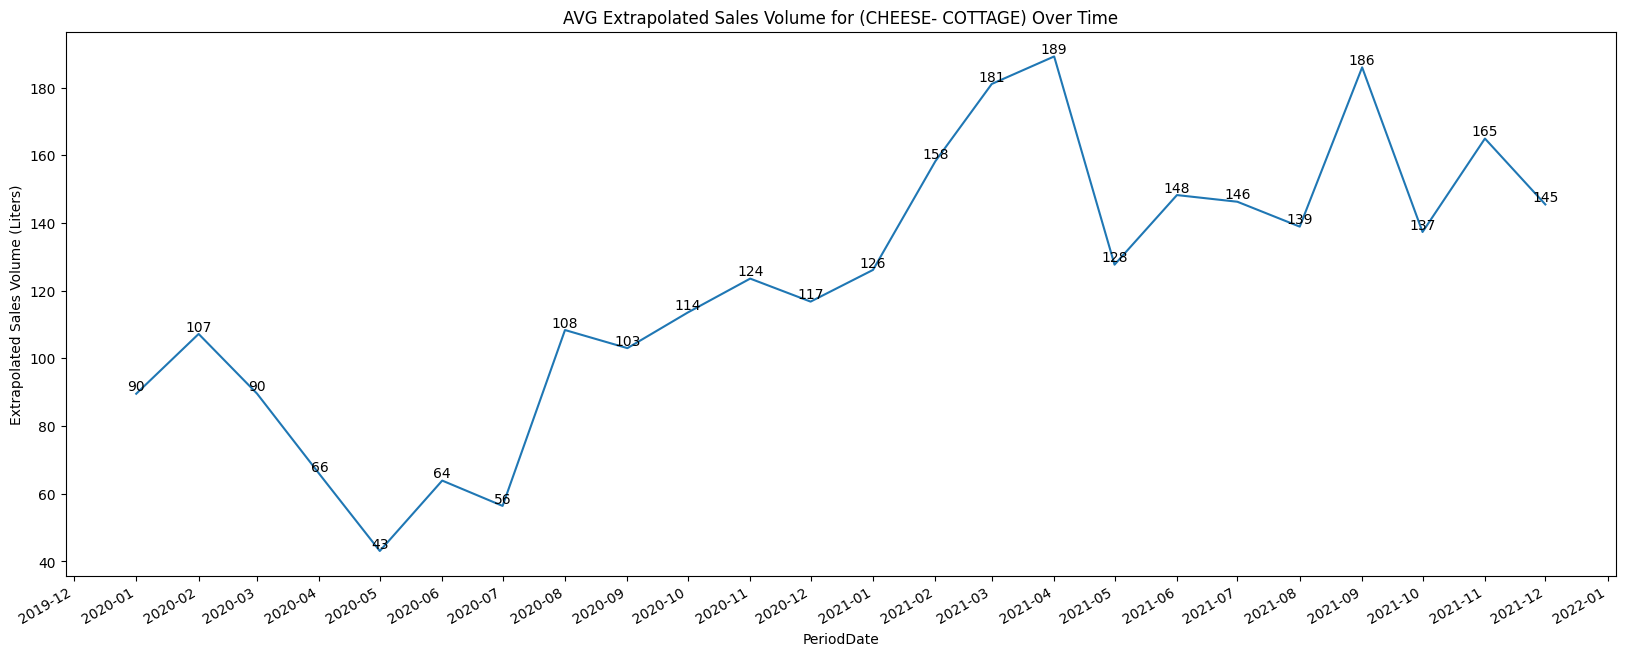

In [ ]:
category_name = 'CHEESE- COTTAGE'
filtered_data = data[data['Category name'].str.strip() == category_name]
aggregated_data = filtered_data.groupby('PeriodDate', as_index=False)['Extrapolated Sales Volume'].mean()

plt.figure(figsize=(20, 8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=aggregated_data, ci=None, markers=True, dashes=False)
plt.title(f'AVG Extrapolated Sales Volume for ({category_name}) Over Time')
plt.xlabel('PeriodDate')
plt.ylabel('Extrapolated Sales Volume (Liters)')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

for x, y in zip(aggregated_data['PeriodDate'], aggregated_data['Extrapolated Sales Volume']):
    plt.text(x, y, f'{round(y)}', ha='center', va='bottom')

plt.gcf().autofmt_xdate()
plt.show()

## Extrapolated Sales Volume for The Source of the data Over Time

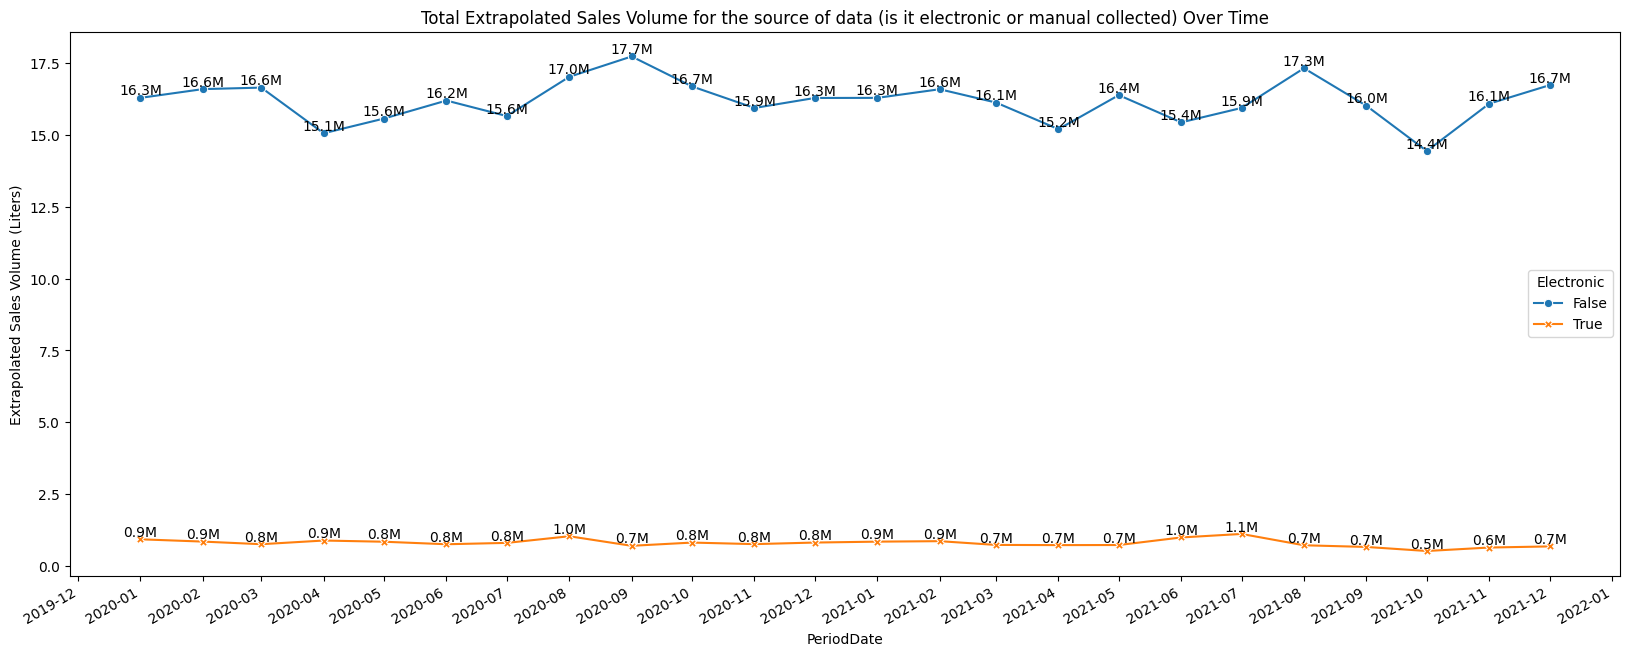

In [ ]:
# Electronic	Identifies the source of data. TRUE = electronic data received from retailer. FALSE = manual collected data by Nielsen Field team
agg_data = data.groupby(['PeriodDate', 'Electronic'], as_index=False)['Extrapolated Sales Volume'].sum()
agg_data['Extrapolated Sales Volume'] = agg_data['Extrapolated Sales Volume'] / 1e6

plt.figure(figsize=(20,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=agg_data, hue='Electronic', ci=None, style='Electronic', markers=True, dashes=False)
plt.title('Total Extrapolated Sales Volume for the source of data (is it electronic or manual collected) Over Time')
plt.ylabel('Extrapolated Sales Volume (Liters)')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

for x, y in zip(agg_data['PeriodDate'], agg_data['Extrapolated Sales Volume']):
    plt.text(x, y, f'{round(y,1)}M', ha='center', va='bottom')

plt.gcf().autofmt_xdate()
plt.show()

## Extrapolated Sales Volume for each Channel Over Time

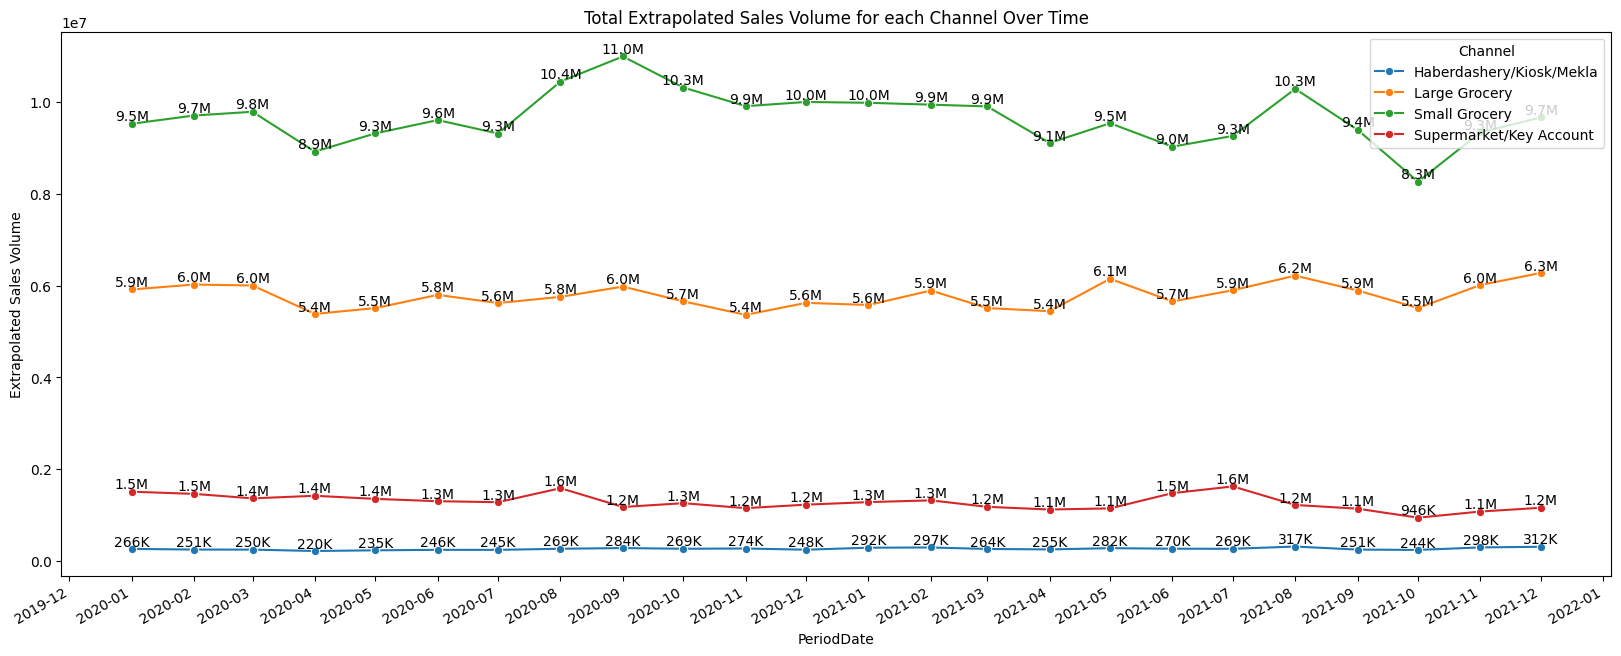

In [ ]:
agg_data = data.groupby(['PeriodDate', 'Channel'], as_index=False)['Extrapolated Sales Volume'].sum()

channels = data['Channel'].unique()
markers_dict = {channel: 'o' for channel in channels}

plt.figure(figsize=(20,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=agg_data, hue='Channel', ci=None, style='Channel', markers=markers_dict, dashes=False)
plt.title('Total Extrapolated Sales Volume for each Channel Over Time')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

for x, y in zip(agg_data['PeriodDate'], agg_data['Extrapolated Sales Volume']):
    if y > 1e6:
      plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
    else:
      plt.text(x, y, f'{round(y/1000)}K', ha='center', va='bottom')

plt.gcf().autofmt_xdate()
plt.show()

# 2. Regional Sales Analysis

In [ ]:
data['Region'].unique()

array(['UPPER EGYPT ', 'ALEXANDRIA', 'CAIRO ', 'DELTA ', 'CANAL ZONE '],
      dtype=object)

In [ ]:
data['Region'].value_counts()

Region
CAIRO           495169
DELTA           185319
ALEXANDRIA      160828
UPPER EGYPT     116223
CANAL ZONE       25634
Name: count, dtype: int64

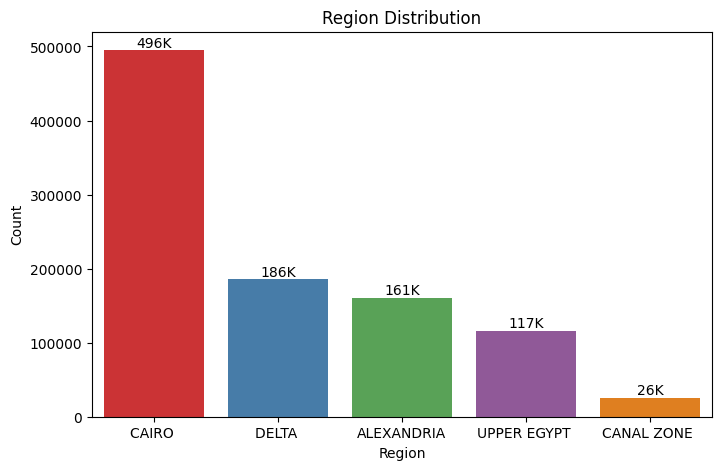

In [ ]:
region_counts = data['Region'].value_counts()
sorted_regions = region_counts.index

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Region', palette = "Set1", order=sorted_regions)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')

for i, count in enumerate(region_counts):
    plt.text(i, count, f'{ceil(count/1000)}K', ha='center', va='bottom')

plt.show()

### 1. Extrapolated Sales Volume
Extrapolated sales volume gives a broader picture of what total sales would look like if you consider all similar stores, not just the ones in your dataset. It allows you to make decisions based on the estimated total market size.


In [ ]:
data.groupby('Region')['Extrapolated Sales Volume'].sum().sort_values()

Region
CANAL ZONE      8.950260e+06
ALEXANDRIA      3.159240e+07
CAIRO           1.214433e+08
UPPER EGYPT     1.220755e+08
DELTA           1.232922e+08
Name: Extrapolated Sales Volume, dtype: float64

In [ ]:
data.groupby('Region')['Extrapolated Sales Volume'].mean().sort_values()

Region
ALEXANDRIA       196.435958
CAIRO            245.256226
CANAL ZONE       349.155824
DELTA            665.297326
UPPER EGYPT     1050.355439
Name: Extrapolated Sales Volume, dtype: float64

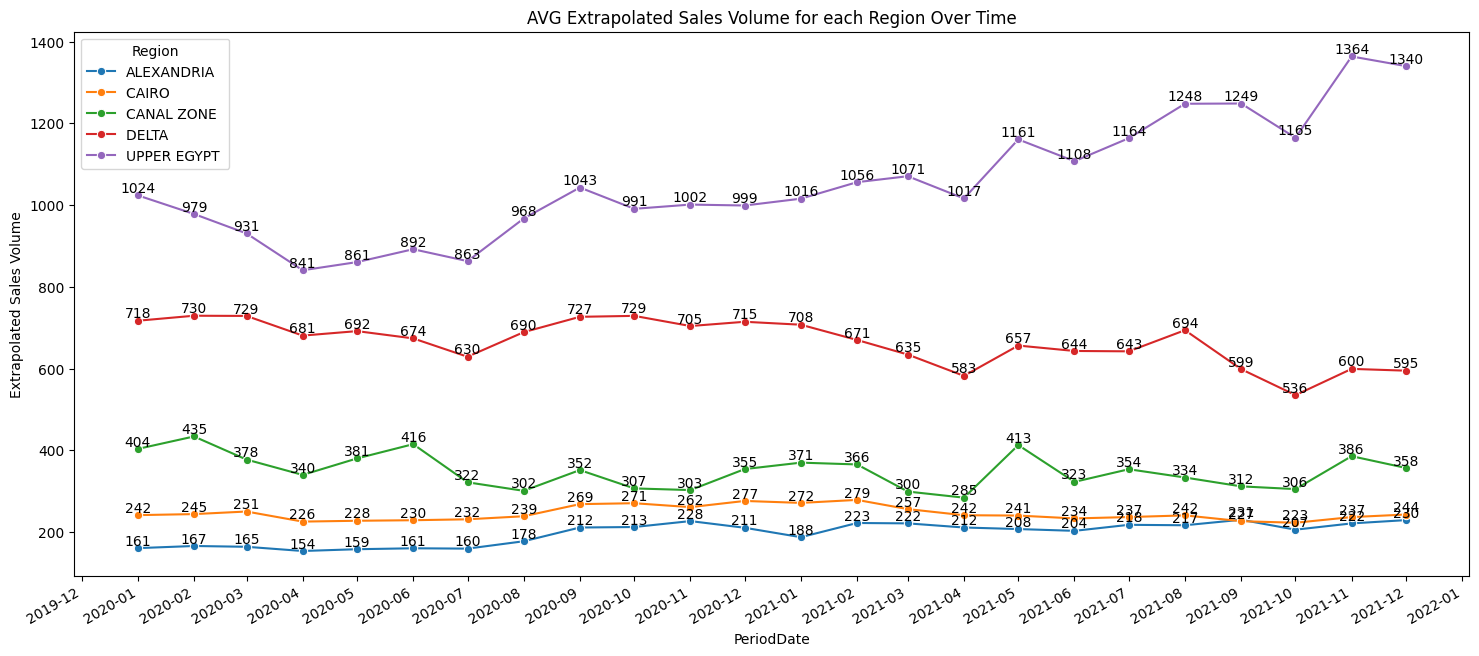

In [ ]:
Regions = data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

data_avg = data.groupby(['PeriodDate', 'Region'], as_index=False)['Extrapolated Sales Volume'].mean()
# data_avg['Extrapolated Sales Volume'] = data_avg['Extrapolated Sales Volume'] / 1000

plt.figure(figsize=(18,8))
ax =sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data_avg, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('AVG Extrapolated Sales Volume for each Region Over Time')

for x, y, label in zip(data_avg['PeriodDate'], data_avg['Extrapolated Sales Volume'], data_avg['Region']):
    plt.text(x, y, ceil(y), ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

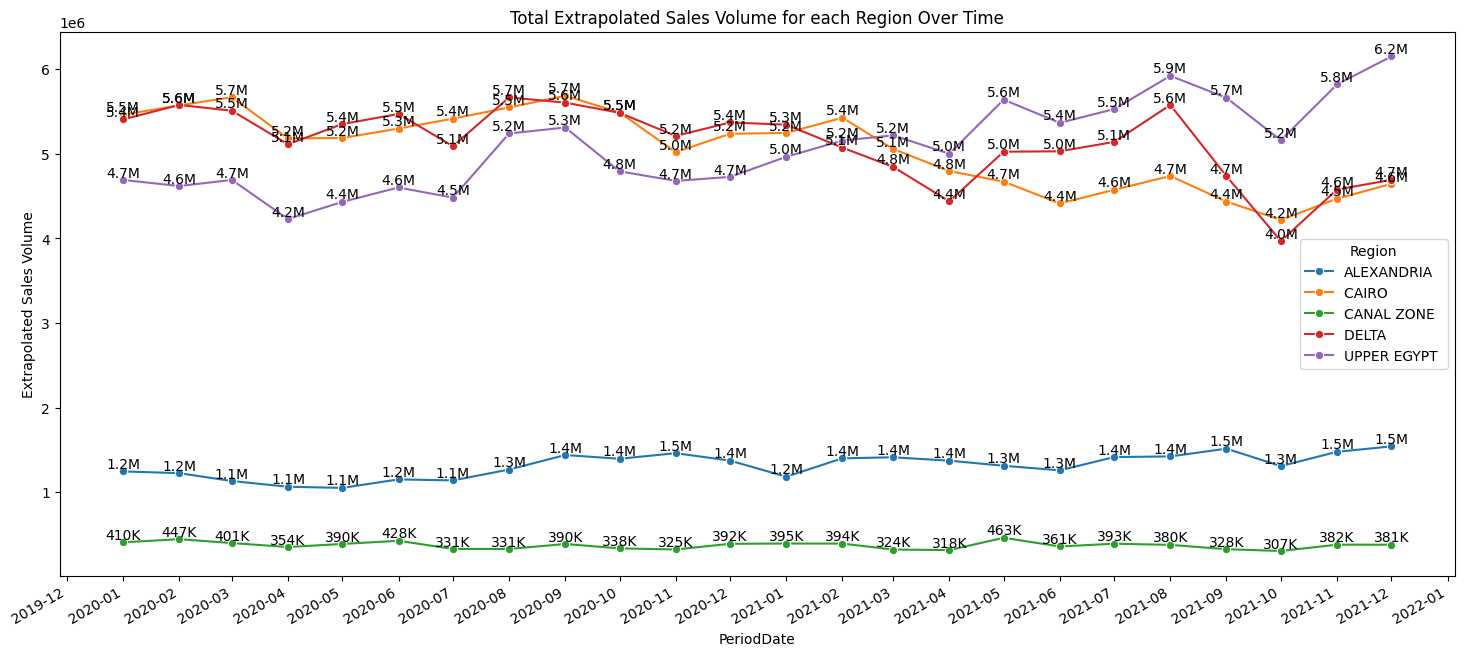

In [ ]:
aggregated_data = data.groupby(['PeriodDate', 'Region'], as_index=False)['Extrapolated Sales Volume'].sum()
# aggregated_data['Extrapolated Sales Volume'] = aggregated_data['Extrapolated Sales Volume'] / 1000

Regions = aggregated_data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=aggregated_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('Total Extrapolated Sales Volume for each Region Over Time')

for x, y, label in zip(aggregated_data['PeriodDate'], aggregated_data['Extrapolated Sales Volume'], aggregated_data['Region']):
    if y > 1e6:
      plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
    else:
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

* The Total Extrapolated Sales Volume for UPPER EGYPT showed a significant upward trend starting in July 2020.
* By the first quarter of 2021, UPPER EGYPT had surpassed both CAIRO and DELTA in terms of total sales volume, making it one of the highest-performing regions.
* This suggests that UPPER EGYPT experienced rapid growth during this period, potentially due to shifts in demand, market expansion, or successful strategic initiatives in the region.

* UPPER EGYPT is highly efficient in terms of sales performance, with relatively fewer records but a high average sales volume. This indicates a high transaction value per sale, making it a critical region for high-margin products or premium offerings.

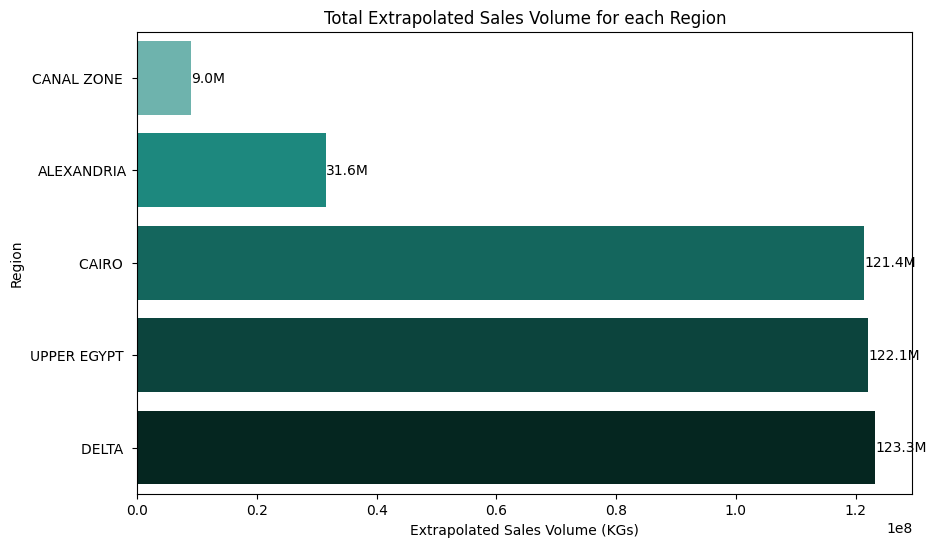

In [ ]:
colors = ["#62BEB6", "#0B9A8D", "#077368", "#034D44", "#002B24"]
agg_data = data.groupby('Region')['Extrapolated Sales Volume'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('Total Extrapolated Sales Volume for each Region')

for i, v in enumerate(agg_data):
    plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.xlabel('Extrapolated Sales Volume (KGs)')
plt.ylabel('Region')

plt.show()

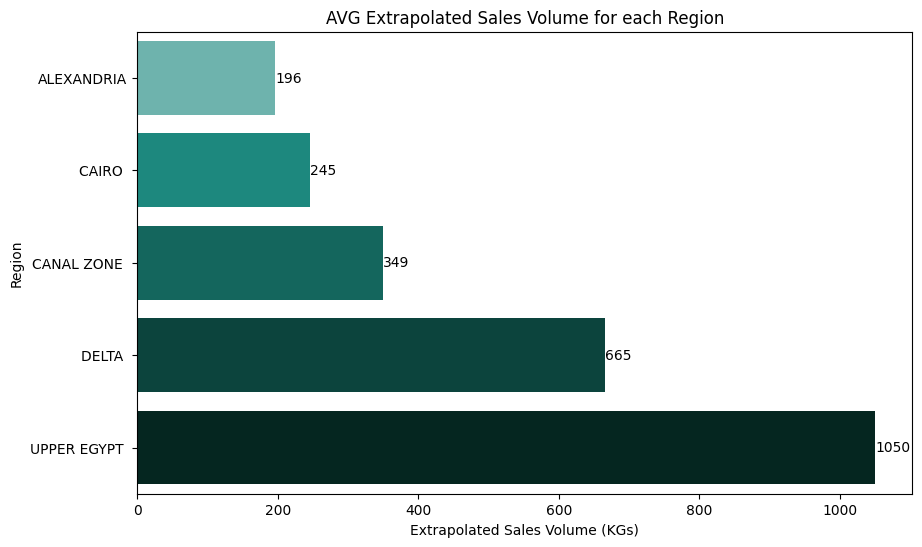

In [ ]:
agg_data = data.groupby('Region')['Extrapolated Sales Volume'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('AVG Extrapolated Sales Volume for each Region')

for i, v in enumerate(agg_data):
    plt.text(v, i, round(v), ha='left', va='center')


plt.xlabel('Extrapolated Sales Volume (KGs)')
plt.ylabel('Region')

plt.show()

## Conclusion
1. High Total Sales Regions: **DELTA**, **UPPER EGYPT**, and **CAIRO** have the highest total sales volumes. This suggests they are strong markets with substantial revenue generation.  

2. Despite having a lower total number of records for **UPPER EGYPT** in the data, it rivals **DELTA** and **CAIRO** in total sales. This indicates that **UPPER EGYPT** is a strong performer in terms of sales, suggesting that it may have high sales efficiency or a significant market impact despite a smaller presence in the dataset.

3. High Average Sales Volume Regions: **UPPER EGYPT** has the highest average sales volume per transaction, indicating that each transaction is relatively large compared to other regions.

4. Low Total Sales Regions: **CANAL ZONE** has the lowest total sales volume, indicating that it is the smallest market in terms of overall revenue. It also has a relatively low average sales volume compared to other regions, suggesting that both transaction size and total sales are lower in this region. and this because of its records in the data!


## Decision Making
*	DELTA, UPPER EGYPT and CAIRO should be prioritized for further investments and resource allocation due to their high total sales volumes. Since UPPER EGYPT also has the highest average sales volume, it could be worth exploring additional premium products or services in this region.
*	For region like ALEXANDRIA where total sales is moderate, consider strategies to increase the average transaction size. This might include targeted promotions, bundling products, or upselling higher-value items to boost the average sales per transaction.
*	CANAL ZONE should be analyzed to understand the reasons behind its low total sales and average sales volume. Possible actions include:
  1.	Reevaluating Product Offerings: Consider whether the products or services offered in CANAL ZONE meet local demand and preferences.
  2.	Enhanced Marketing: Implement targeted marketing campaigns to increase visibility and attract more customers.
  3.	Promotional Strategies: Offer special promotions or discounts to stimulate sales and increase the average transaction size.
*	UPPER EGYPT and DELTA: Given their high average sales volume, explore opportunities to introduce premium products or adjust pricing strategies to further maximize revenue.
*	Other Regions: Implement promotional pricing or bundle offers to boost average sales per transaction, particularly in regions with high total sales but lower average transaction values.


### 2. Raw Sales Volume

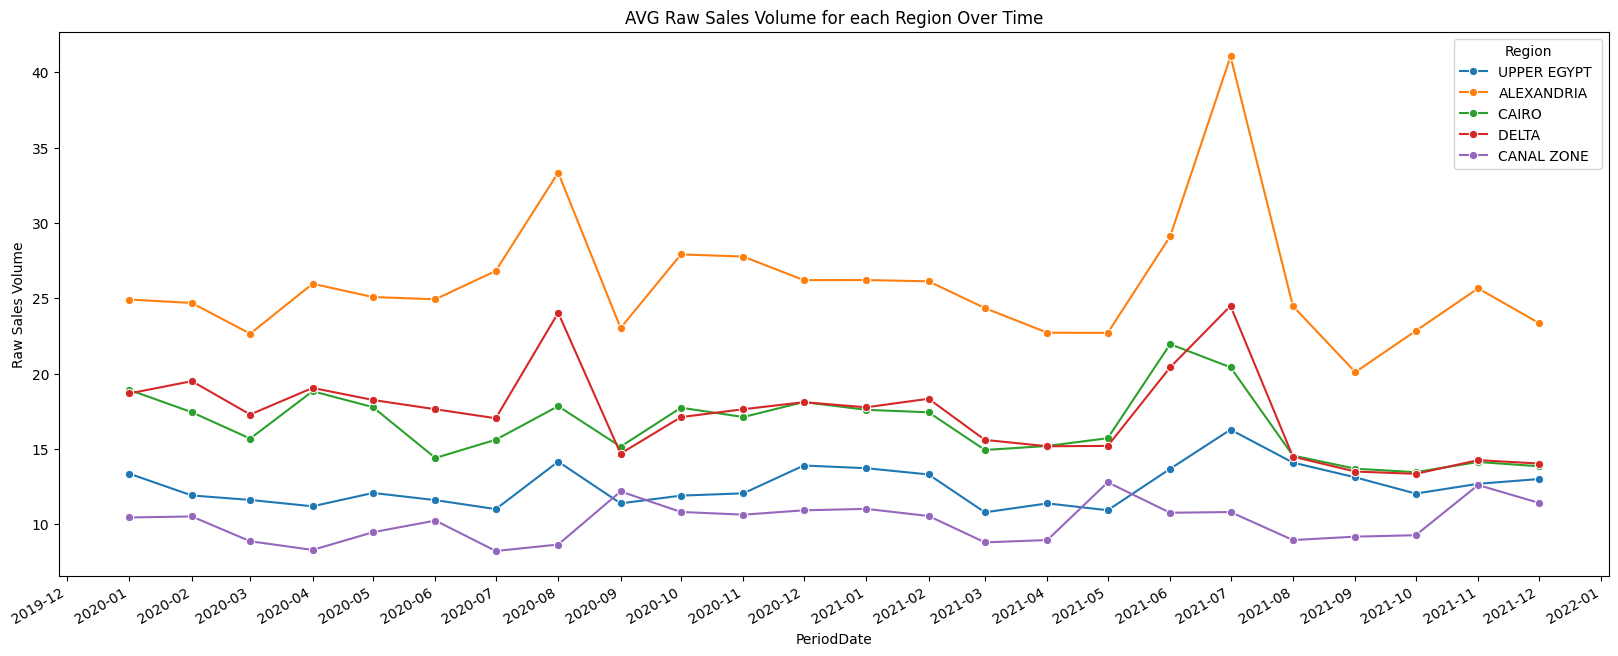

In [ ]:
Regions = data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(20,8))
ax = sns.lineplot(x='PeriodDate', y='Raw Sales Volume', data=data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('AVG Raw Sales Volume for each Region Over Time')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

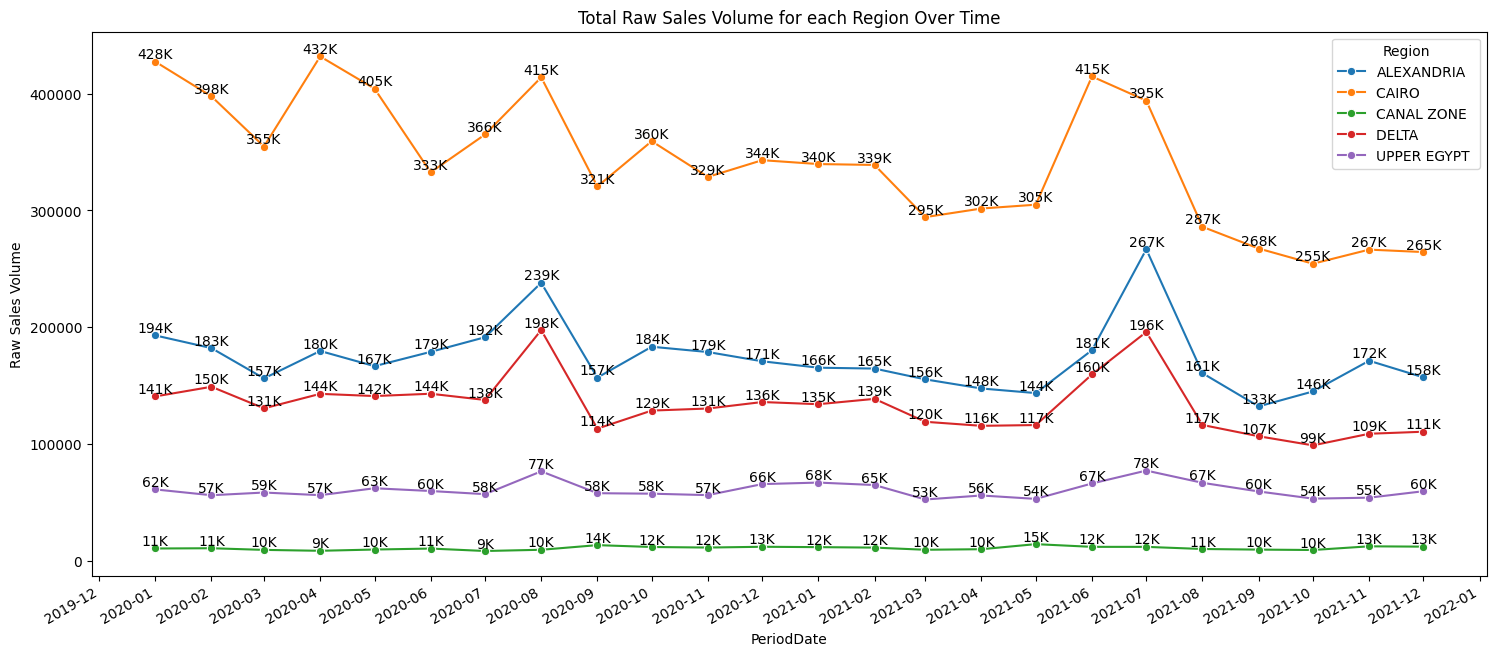

In [ ]:
aggregated_data = data.groupby(['PeriodDate', 'Region'])['Raw Sales Volume'].sum().reset_index()


Regions = aggregated_data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='Raw Sales Volume', data=aggregated_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('Total Raw Sales Volume for each Region Over Time')

for x, y, label in zip(aggregated_data['PeriodDate'], aggregated_data['Raw Sales Volume'], aggregated_data['Region']):
    if y > 1e6:
      plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
    else:
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
data.groupby('Region')['Raw Sales Volume'].sum().sort_values()

Region
CANAL ZONE      2.608967e+05
UPPER EGYPT     1.455635e+06
DELTA           3.212155e+06
ALEXANDRIA      4.166585e+06
CAIRO           8.207066e+06
Name: Raw Sales Volume, dtype: float64

In [ ]:
data.groupby('Region')['Raw Sales Volume'].mean().sort_values()

Region
CANAL ZONE      10.177761
UPPER EGYPT     12.524497
CAIRO           16.574272
DELTA           17.333114
ALEXANDRIA      25.907084
Name: Raw Sales Volume, dtype: float64

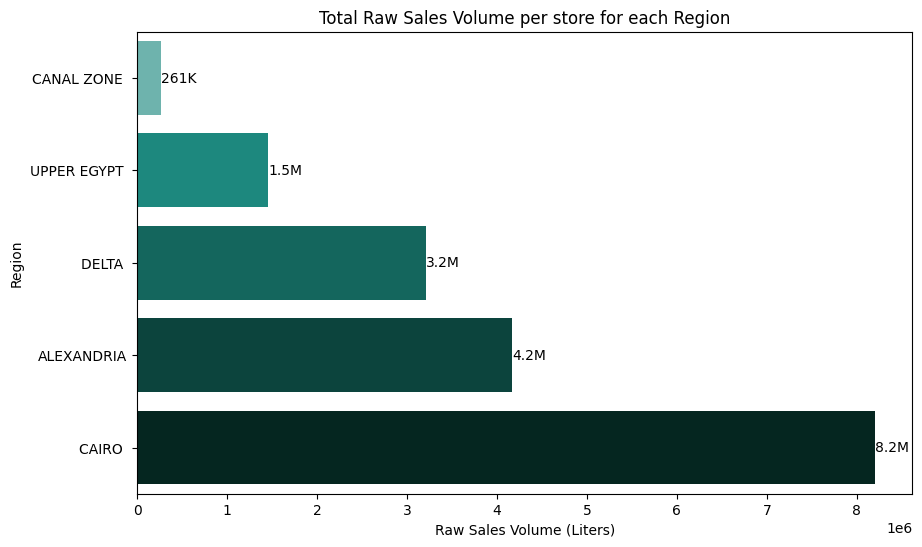

In [ ]:
agg_data = data.groupby('Region')['Raw Sales Volume'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('Total Raw Sales Volume per store for each Region')

for i, v in enumerate(agg_data):
    if v < 1e6:
      plt.text(v, i, f'{ceil(v/1000)}K', ha='left', va='center')
    else:
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.xlabel('Raw Sales Volume (Liters)')
plt.ylabel('Region')

plt.show()

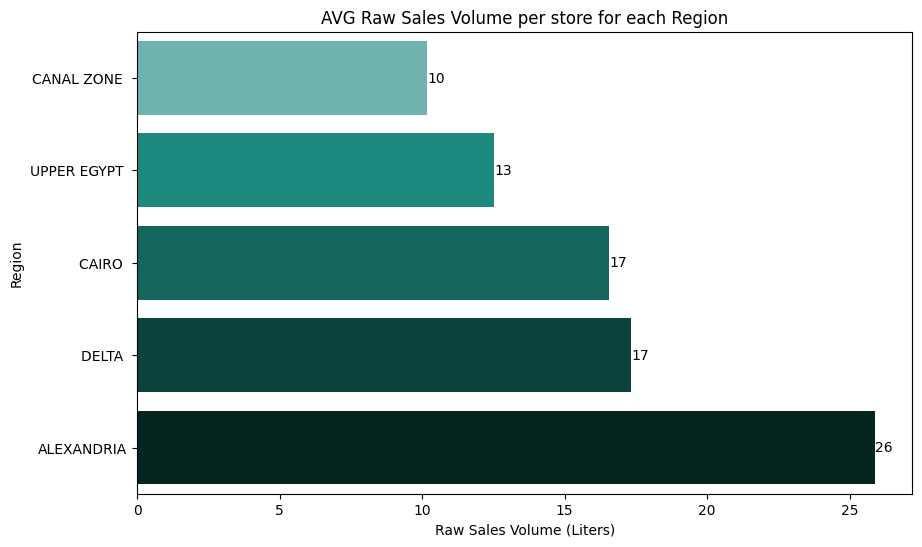

In [ ]:
agg_data = data.groupby('Region')['Raw Sales Volume'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('AVG Raw Sales Volume per store for each Region')

for i, v in enumerate(agg_data):
    plt.text(v, i, round(v), ha='left', va='center')

plt.xlabel('Raw Sales Volume (Liters)')
plt.ylabel('Region')

plt.show()

## Conclusion

1. Total Raw Sales Volume is greatly influenced by the number of records from each region in the dataset. So we can see:
  1.   **CAIRO** leads in raw sales volume with approximately 8.21 million kilograms, which indicates high actual sales in stores before any extrapolation.
  3.   **ALEXANDRIA** follows with 4.17 million kilograms, showing strong sales performance in this region as well.
  7. **CANAL ZONE** has the lowest total sales and lowest average per store. This region may need strategic adjustments to boost performance.
  8. **UPPER EGYPT** and **CANAL** have moderate total sales.

2. **CAIRO** has the highest total sales but its mean sales per store is moderate compared to **ALEXANDRIA** and **DELTA**. This suggests that while CAIRO has a large volume of sales overall, the performance per store is not as high as in other regions, likely because of a higher number of stores with smaller individual sales.

4. **ALEXANDRIA** has the highest mean sales per store at 25.91 KGs per store, meaning each store in this region, on average, sells more product compared to other regions.

5. **UPPER EGYPT** and **CANAL ZONE** have lower mean sales per store at 12.52 KGs and 10.18 KGs respectively.

6. **ALEXANDRIA** stands out with the highest average sales per store (25.91 KGs), indicating that stores in this region tend to have strong individual performance. Despite having a lower total than **CAIRO**, **ALEXANDRIA’s** stores are the most productive on a per-store basis.

8. **UPPER EGYPT** has moderate total sales but a relatively low average per store. It’s showing potential for growth if stores can increase their individual sales.


## Desicion Making

* Focus on optimizing store operations in **Cairo** by identifying underperforming stores and providing targeted support. This could involve training staff, optimizing product offerings, or improving marketing efforts in low-performing areas to raise the average sales per store.

* Invest more in **Alexandria** by expanding the number of stores or increasing stock and product variety to maximize the efficiency of existing stores

* Investigate the causes of lower sales per store in **Upper Egypt**. This might involve adjusting the product mix, improving supply chain efficiency, or boosting marketing efforts tailored to local preferences

* For **Canal Zone**, Consider promotional campaigns or product diversification to stimulate sales. Alternatively, assess whether reducing the number of stores or refocusing resources on more profitable regions might be a viable strategy.



### 3. XFactors

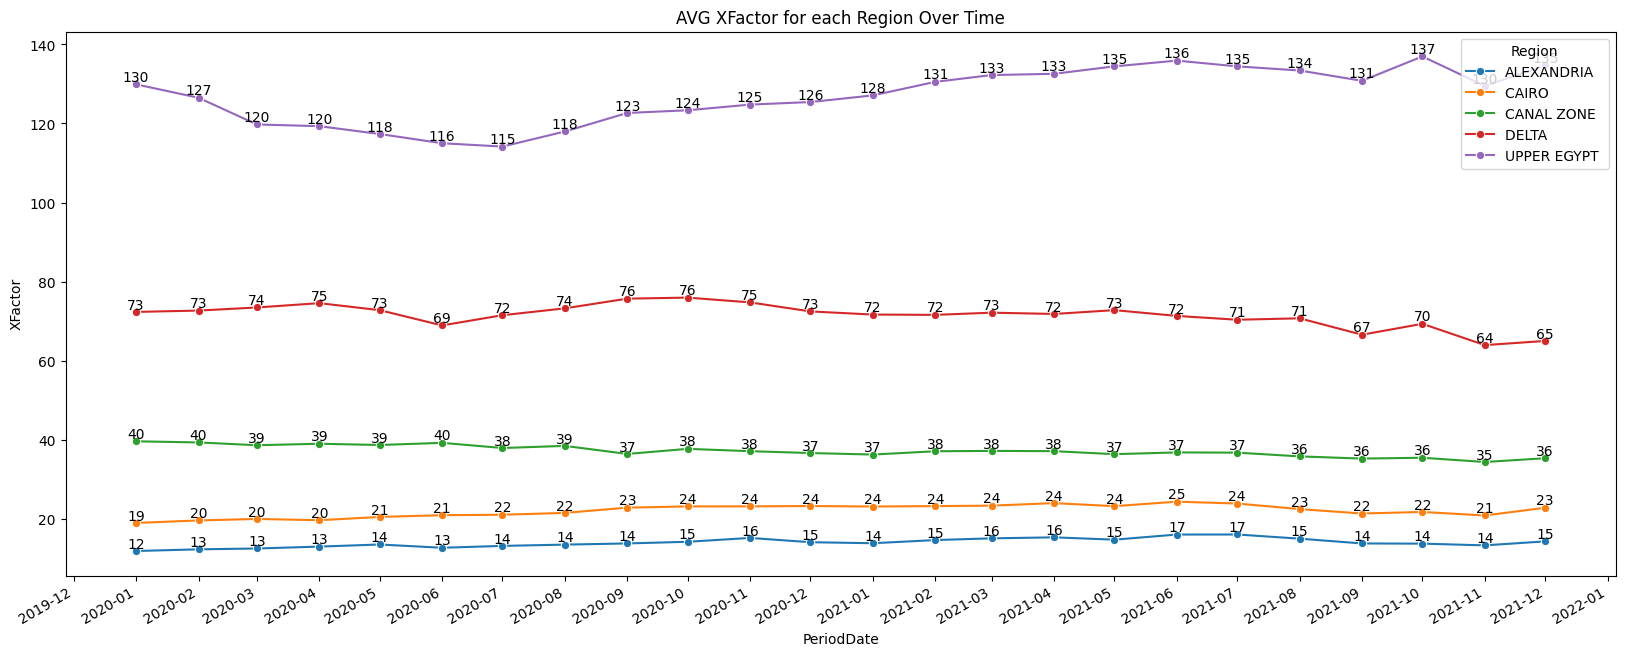

In [ ]:
agg_data = data.groupby(['PeriodDate', 'Region'])['XFactor'].mean().reset_index()

Regions = data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(20,8))
ax = sns.lineplot(x='PeriodDate', y='XFactor', data=agg_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('AVG XFactor for each Region Over Time')

for x, y in zip(agg_data['PeriodDate'], agg_data['XFactor']):
      plt.text(x, y, f'{ceil(y)}', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.show()

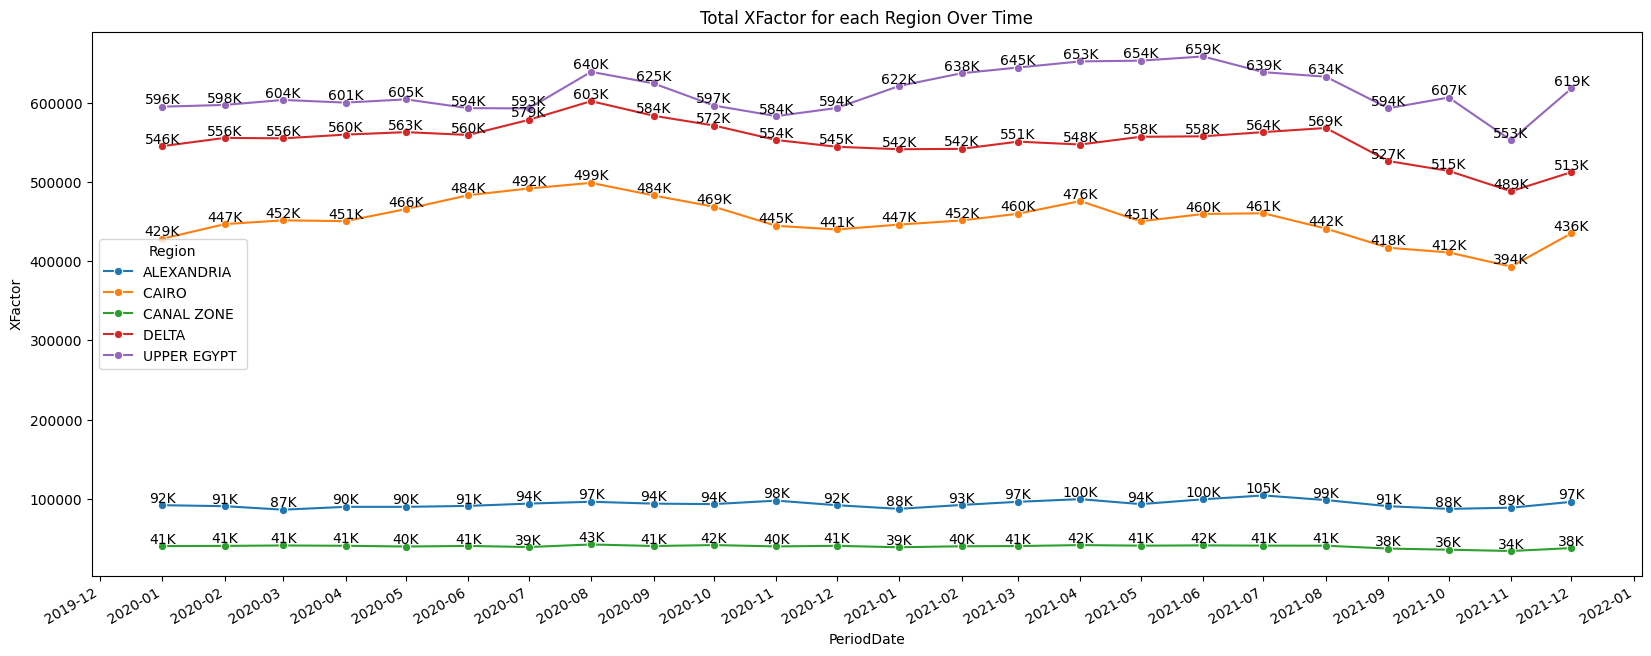

In [ ]:
aggregated_data = data.groupby(['PeriodDate', 'Region'])['XFactor'].sum().reset_index()

Regions = aggregated_data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(20,8))
ax = sns.lineplot(x='PeriodDate', y='XFactor', data=aggregated_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('Total XFactor for each Region Over Time')

for x, y, label in zip(aggregated_data['PeriodDate'], aggregated_data['XFactor'], aggregated_data['Region']):
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
data.groupby('Region')['XFactor'].mean()

Region
ALEXANDRIA       13.909396
CAIRO            21.922867
CANAL ZONE       37.161746
DELTA            71.448728
UPPER EGYPT     126.774343
Name: XFactor, dtype: float64

In [ ]:
data.groupby('Region')['XFactor'].sum()

Region
ALEXANDRIA      2.237020e+06
CAIRO           1.085552e+07
CANAL ZONE      9.526042e+05
DELTA           1.324081e+07
UPPER EGYPT     1.473409e+07
Name: XFactor, dtype: float64

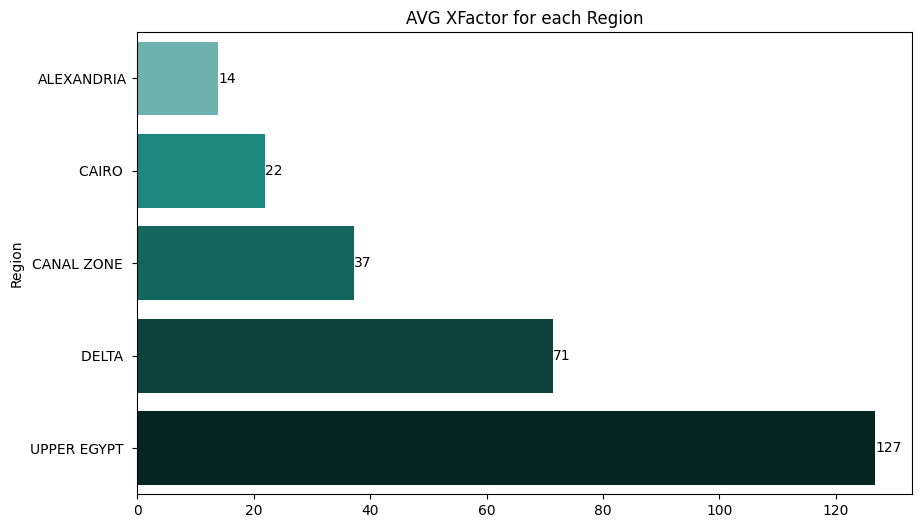

In [ ]:
agg_data = data.groupby('Region')['XFactor'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('AVG XFactor for each Region')

for i, v in enumerate(agg_data):
    plt.text(v, i, round(v), ha='left', va='center')

plt.show()

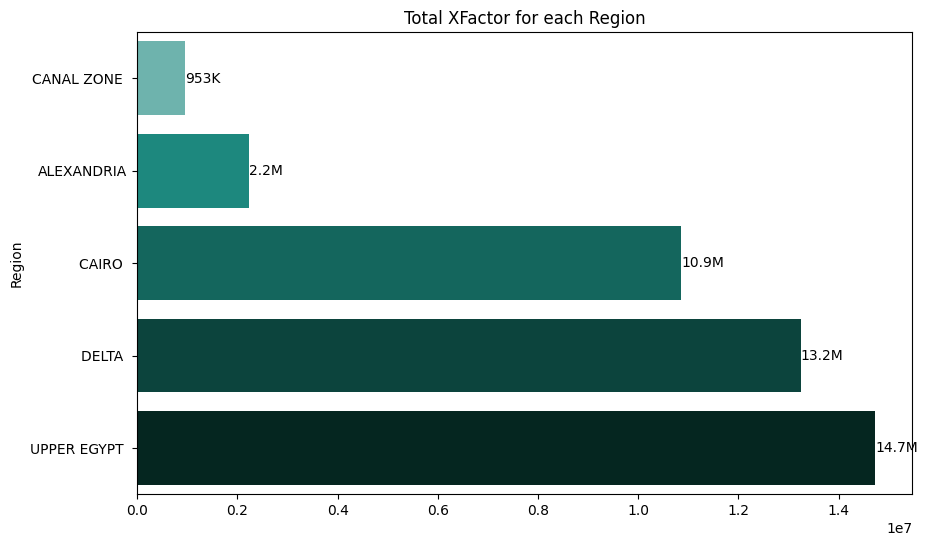

In [ ]:
agg_data = data.groupby('Region')['XFactor'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('Total XFactor for each Region')

for i, v in enumerate(agg_data):
    if v < 1e6:
      plt.text(v, i, f'{ceil(v/1000)}K', ha='left', va='center')
    else:
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.show()

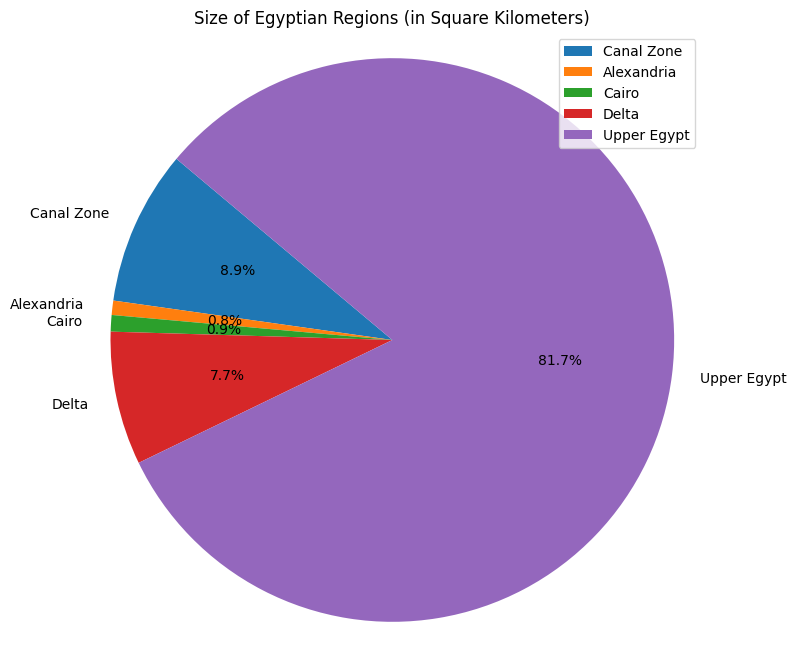

In [ ]:
regions = ['Canal Zone', 'Alexandria', 'Cairo', 'Delta', 'Upper Egypt']
sizes = [29000, 2679, 3085, 25000, 267000]  # Sizes in square kilometers

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=regions, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Size of Egyptian Regions (in Square Kilometers)')
plt.legend(loc='upper right')

plt.show()

In [ ]:
agg_data = data.groupby('Region')['XFactor'].mean().sort_values().reset_index()
agg_data['Size'] = sizes
agg_data

Region     XFactor    Size
0    ALEXANDRIA   13.909396   29000
1        CAIRO    21.922867    2679
2   CANAL ZONE    37.161746    3085
3        DELTA    71.448728   25000
4  UPPER EGYPT   126.774343  267000

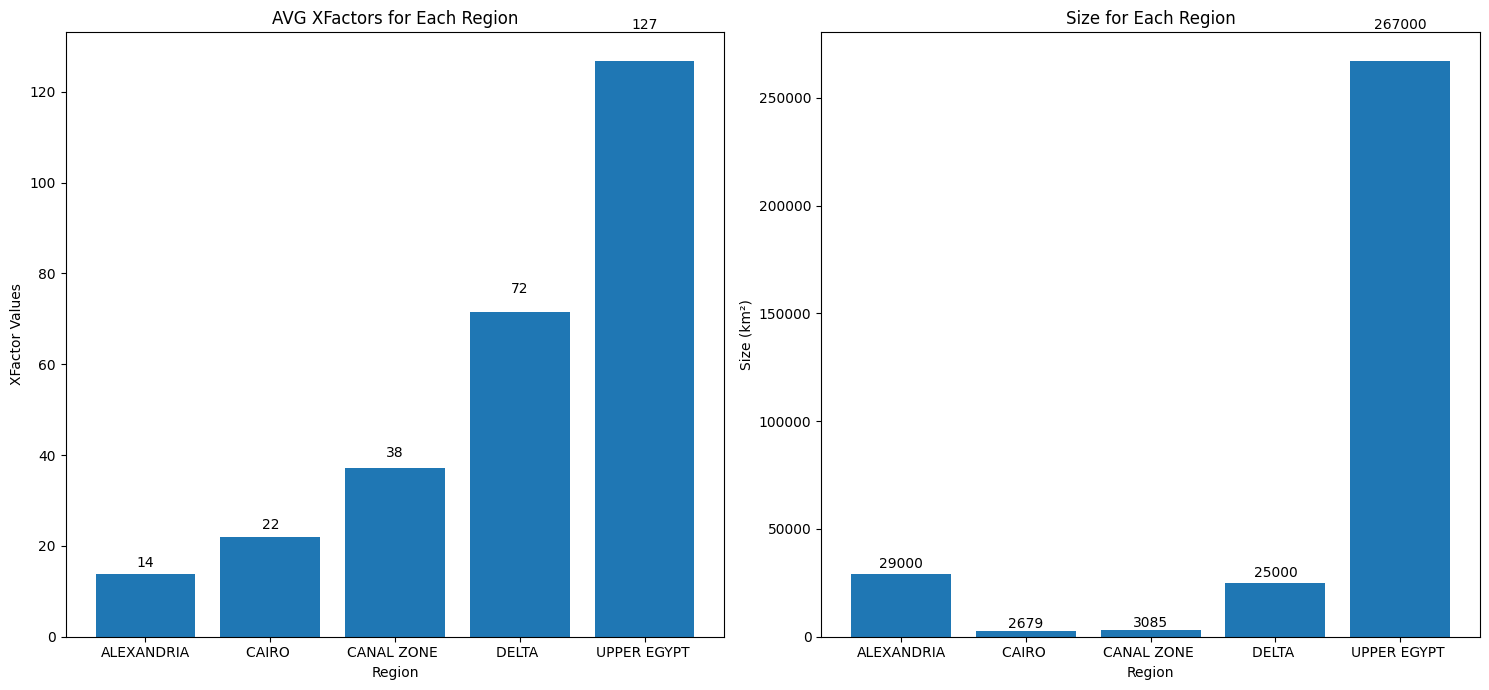

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

bar_positions = np.arange(len(agg_data['Region']))

axes[0].bar(bar_positions, agg_data['XFactor'])
axes[0].set_xticks(bar_positions)
axes[0].set_xticklabels(agg_data['Region'])
axes[0].set_title('AVG XFactors for Each Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('XFactor Values')

for i, v in enumerate(agg_data['XFactor']):
    axes[0].text(i, v + 0.05 * v, f'{ceil(v)}', ha='center', va='bottom', color='black')


axes[1].bar(bar_positions, agg_data['Size'])
axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(agg_data['Region'])
axes[1].set_title('Size for Each Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Size (km²)')

for i, v in enumerate(agg_data['Size']):
    axes[1].text(i, v + 0.05 * v, str(round(v, 2)), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

## Conclusion

*   **UPPER EGYPT** has the highest average XFactors over the two years, which is fitting considering its size. This contributes to its total and average sales, resulting in the highest sales figures over the two years.

* **ALEXANDRIA** is the second-largest region in terms of size but has the lowest number of XFactors. Despite this, it boasts the highest average sales per store at 25.91 KGs, indicating that each store in this region sells more products on average compared to stores in other regions. So we can:
    1. Open more stores in high-demand areas to increase overall sales volume while maintaining the high average sales per store.
    2. Investigate the product offerings in **ALEXANDRIA** to identify which products contribute to higher sales per store. Optimizing the product mix based on customer preferences could enhance sales further.
    3. The high average sales per store in **ALEXANDRIA** could provide insights into effective sales strategies and customer engagement practices that can be replicated in other regions, particularly those with lower average sales per store.
    4. While **ALEXANDRIA** has a low number of XFactors, efforts can be made to enhance them. This may include improving operational efficiencies, staff training, or enhancing the overall customer experience to drive sales.

* Compared to the size of **DELTA** and the number of XFactors, the number of stores is well-suited to its size, and both the average and total sales over the two years are strong.

* About **CANAL ZONE**, having 37 stores in 3085 km² can be considered a small number in terms of store density. Density of 0.012 stores/km²: This is relatively low. It suggests that, on average, there is only about 1 store for every 83.3 km². So that:
    1. This low density might indicate limited access to retail services for the population within that area. If **CANAL ZONE** has a small population or a less urbanized environment, then the number of stores may not be sufficient to meet consumer needs effectively.
    2. **CANAL ZONE** covers an area of 3085 km², which is relatively small. This limited size may restrict market reach and the number of potential customers, resulting in fewer retail locations and a constrained customer base compared to larger regions.

* The total population of the **Canal Zone** cities is approximately 1.4 million people, spread over an area of 3,085 square kilometers. This results in a population density of about 454 people per square kilometer.
   1. This population density indicates a relatively moderate level of urbanization, especially when considering the area includes both urban and rural regions. With 37 stores in such a large area, it suggests that the distribution of retail services may not be optimal, potentially indicating a lack of sufficient retail infrastructure to meet the needs of the local population.
   2. Moreover, the moderate density could imply that while there is a significant population, there may be challenges in accessibility to stores and services, which could impact consumer behavior and local economic activities.

* To enhance sales in the **Canal Zone**, several strategies can be implemented based on the current analysis of the region's demographics and market conditions:
   * Increase Store Density: This would allow more residents to reach stores conveniently, potentially leading to higher foot traffic and sales. Establishing new stores in underserved areas could meet the demand better.
   * Targeted Marketing Campaigns: Implementing localized marketing strategies can attract more customers. Understanding the demographics and preferences of the **Canal Zone**'s population can help tailor promotions and advertising to resonate with the community.

* Based on the calculated store density of 0.0082 stores per km² (or 1 store for every 121.5 km²) in Cairo,The low store density suggests that **CAIRO** may have fewer retail outlets compared to the available space, indicating an opportunity for expansion. With a population of around 10.2 million, there may be demand for more stores.

* The average XFactor of 22 indicates that the existing stores can potentially cater to a larger market by reflecting their presence in the retail universe. This factor suggests a moderate level of market saturation compared to other regions.

* Despite leading in total raw sales volume (approximately 8.21 million kilograms), the average sales volume per store is only moderate. This discrepancy suggests that while there is high demand, individual store performance could be enhanced through:
   * Increase Store Presence: Consider opening more stores in high-density population areas to improve accessibility and convenience for customers. This could enhance overall sales volumes by reaching more customers.
   * Analyze the product offerings to ensure they meet local preferences and demands. Introducing region-specific products may increase sales in stores.
   * Implement marketing strategies aimed at increasing awareness and driving traffic to existing stores. Highlight promotions, local events, or special offers to attract more customers.

* Cairo's low store density presents a significant opportunity for growth and expansion. By strategically increasing the number of stores and enhancing marketing efforts, it is possible to capitalize on the existing demand and improve overall sales performance in the region.

# 3. Channel Sales Analysis

In [ ]:
data['Channel'].unique()

array(['Large Grocery', 'Supermarket/Key Account', 'Small Grocery',
       'Haberdashery/Kiosk/Mekla'], dtype=object)

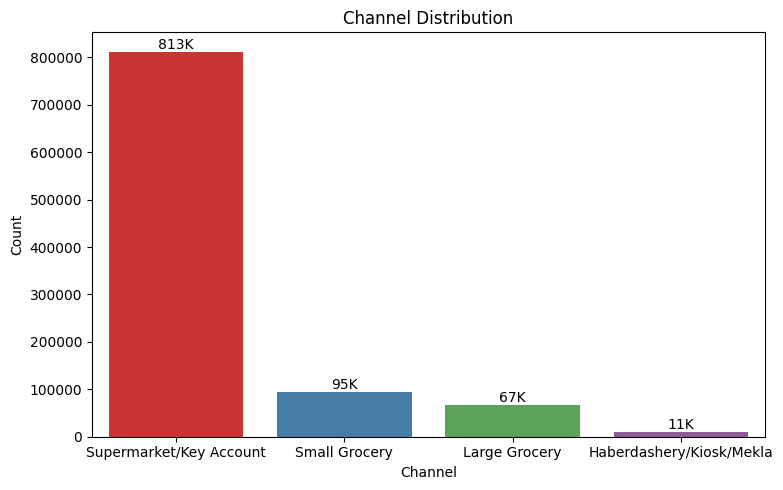

In [ ]:
channel_counts = data['Channel'].value_counts()
sorted_channels = channel_counts.index

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Channel', palette = "Set1", order=sorted_channels)
plt.title('Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Count')

for i, count in enumerate(channel_counts):
    plt.text(i, count, f'{ceil(count/1000)}K', ha='center', va='bottom')

plt.tight_layout()
plt.show()

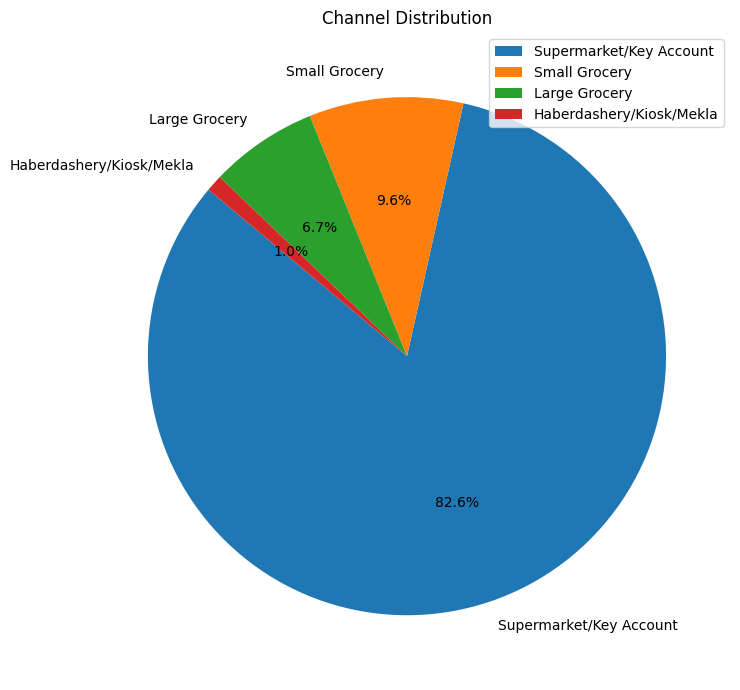

In [ ]:
channel_counts = data['Channel'].value_counts()

plt.figure(figsize=(10,7))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Channel Distribution')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

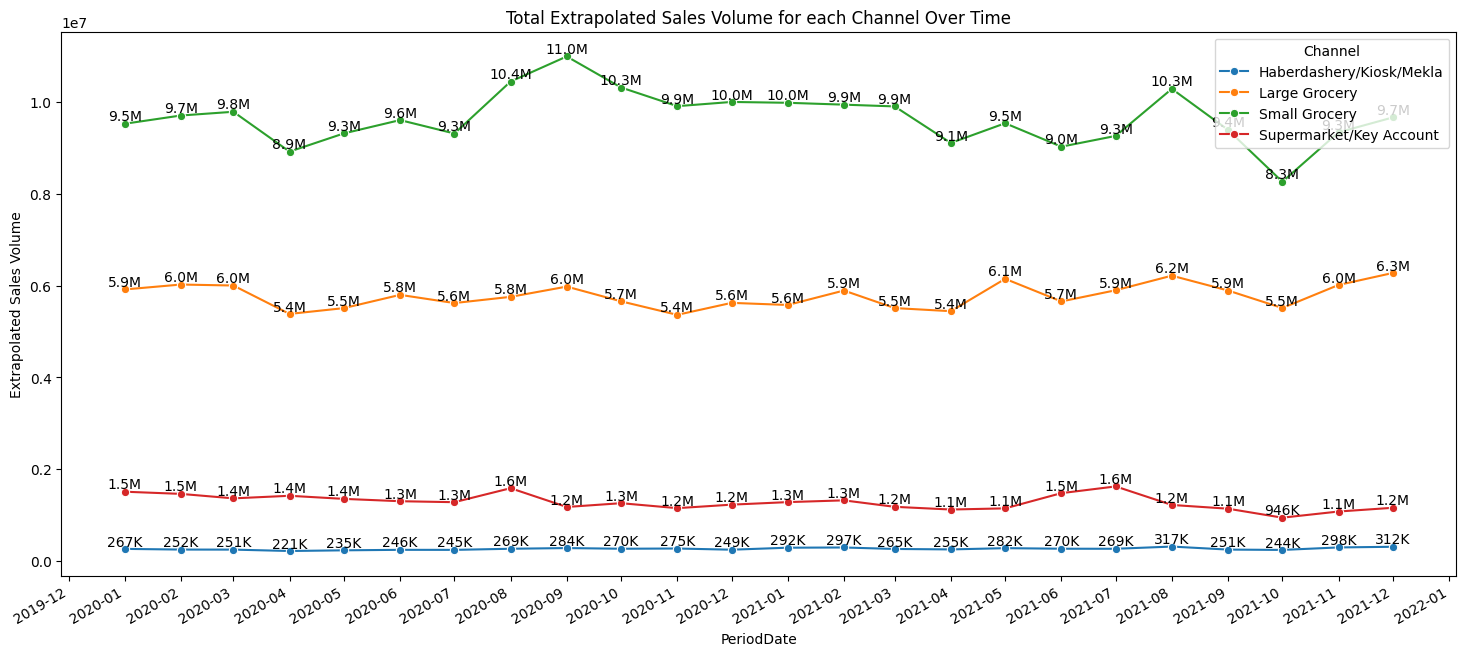

In [ ]:
agg_data = data.groupby(['PeriodDate', 'Channel'])['Extrapolated Sales Volume'].sum().reset_index()

Regions = agg_data['Channel'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=agg_data, hue='Channel', ci=None, style='Channel', dashes=None, markers=markers_dict)
plt.title('Total Extrapolated Sales Volume for each Channel Over Time')

for x, y, label in zip(agg_data['PeriodDate'], agg_data['Extrapolated Sales Volume'], agg_data['Channel']):
    if y > 1e6:
      plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
    else:
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

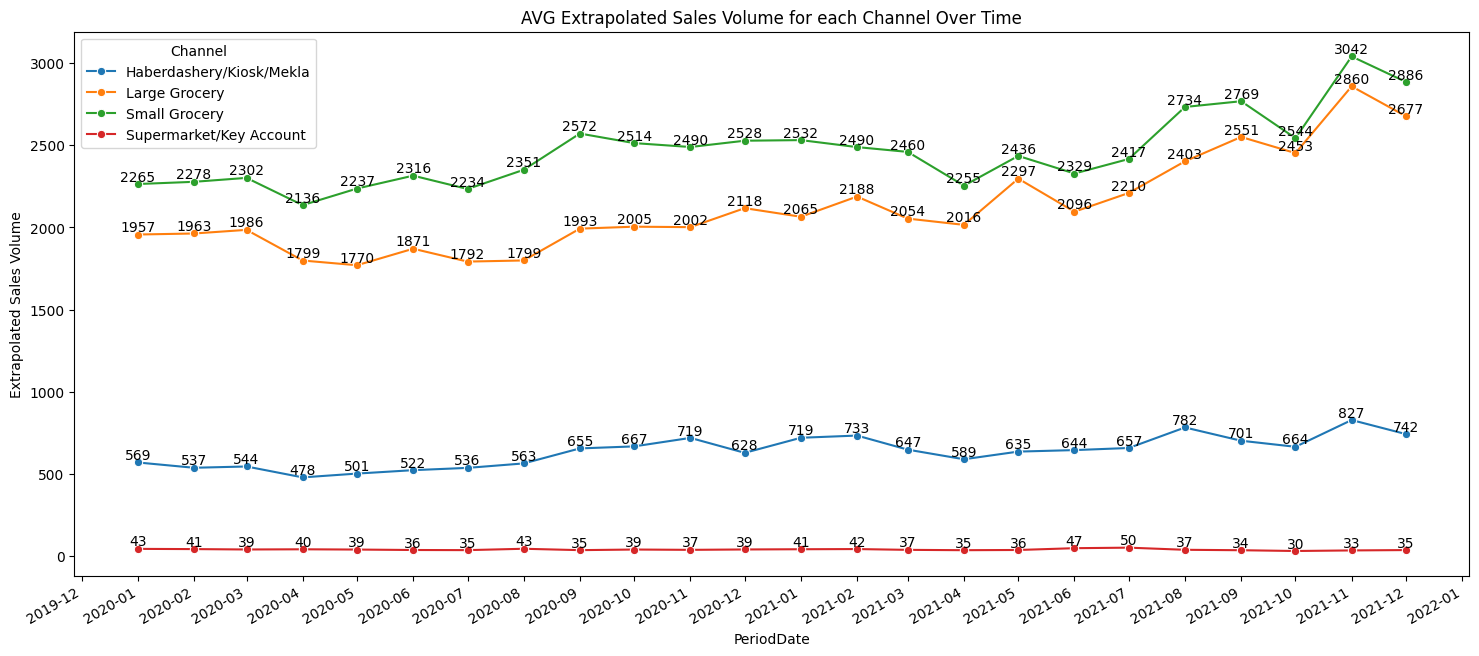

In [ ]:
agg_data = data.groupby(['PeriodDate', 'Channel'])['Extrapolated Sales Volume'].mean().reset_index()

Regions = agg_data['Channel'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=agg_data, hue='Channel', ci=None, style='Channel', dashes=None, markers=markers_dict)
plt.title('AVG Extrapolated Sales Volume for each Channel Over Time')

for x, y, label in zip(agg_data['PeriodDate'], agg_data['Extrapolated Sales Volume'], agg_data['Channel']):
      plt.text(x, y, f'{ceil(y)}', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
data.groupby('Channel')['Extrapolated Sales Volume'].sum()

Channel
Haberdashery/Kiosk/Mekla    6.406198e+06
Large Grocery               1.386424e+08
Small Grocery               2.314723e+08
Supermarket/Key Account     3.083276e+07
Name: Extrapolated Sales Volume, dtype: float64

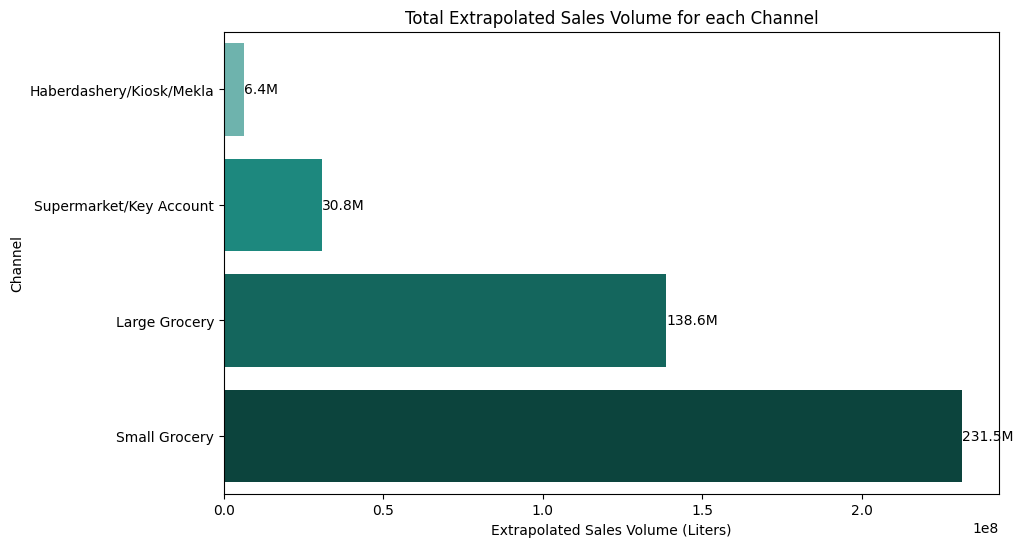

In [ ]:
colors = ["#62BEB6", "#0B9A8D", "#077368", "#034D44"]

agg_data = data.groupby('Channel')['Extrapolated Sales Volume'].sum().reset_index()
agg_data.sort_values(by='Extrapolated Sales Volume', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Extrapolated Sales Volume', y='Channel', data=agg_data, palette=colors)
plt.title('Total Extrapolated Sales Volume for each Channel')

for i, v in enumerate(agg_data['Extrapolated Sales Volume']):
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.xlabel('Extrapolated Sales Volume (Liters)')
plt.ylabel('Channel')

plt.show()

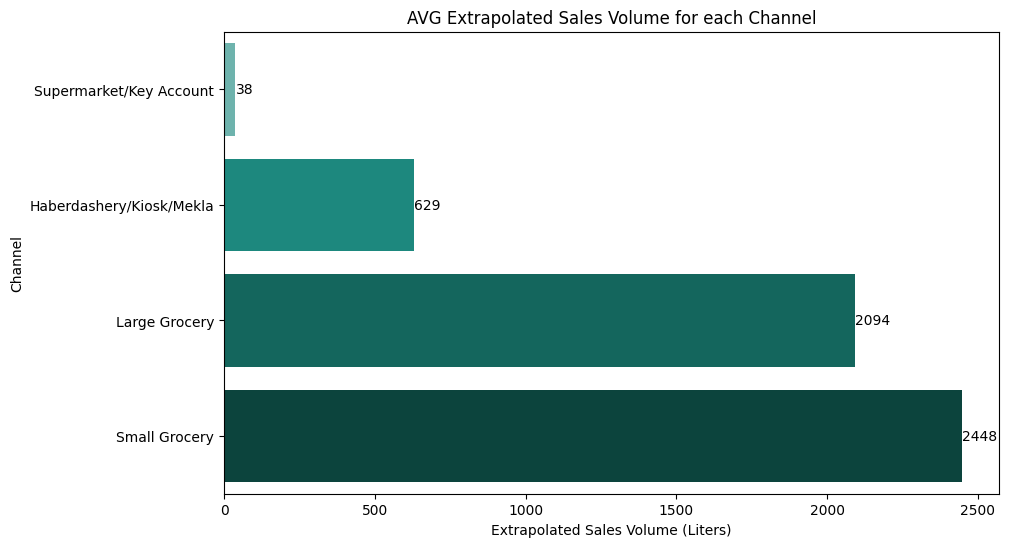

In [ ]:
agg_data = data.groupby('Channel')['Extrapolated Sales Volume'].mean().reset_index()
agg_data.sort_values(by='Extrapolated Sales Volume', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Extrapolated Sales Volume', y='Channel', data=agg_data, palette=colors)
plt.title('AVG Extrapolated Sales Volume for each Channel')

for i, v in enumerate(agg_data['Extrapolated Sales Volume']):
      plt.text(v, i, f'{round(v)}', ha='left', va='center')

plt.xlabel('Extrapolated Sales Volume (Liters)')
plt.ylabel('Channel')

plt.show()

In [ ]:
data.groupby('Channel')['Raw Sales Volume'].sum()

Channel
Haberdashery/Kiosk/Mekla    6.638890e+04
Large Grocery               8.124544e+05
Small Grocery               7.974301e+05
Supermarket/Key Account     1.562606e+07
Name: Raw Sales Volume, dtype: float64

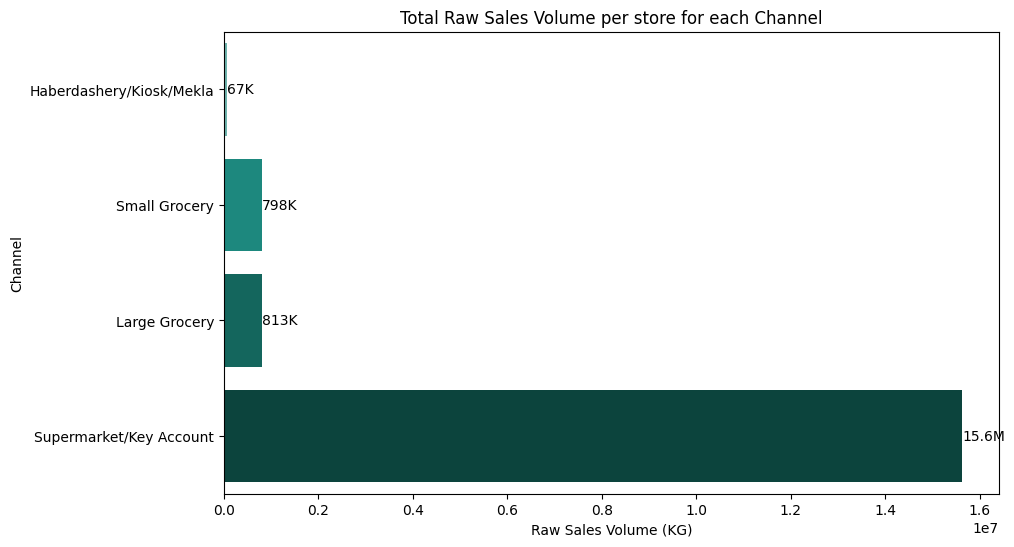

In [ ]:
agg_data = data.groupby('Channel')['Raw Sales Volume'].sum().reset_index()
agg_data.sort_values(by='Raw Sales Volume', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Raw Sales Volume', y='Channel', data=agg_data, palette=colors)
plt.title('Total Raw Sales Volume per store for each Channel')

for i, v in enumerate(agg_data['Raw Sales Volume']):
  if v > 1e6:
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')
  else:
      plt.text(v, i, f'{ceil(v/1000)}K', ha='left', va='center')

plt.xlabel('Raw Sales Volume (KG)')
plt.ylabel('Channel')

plt.show()

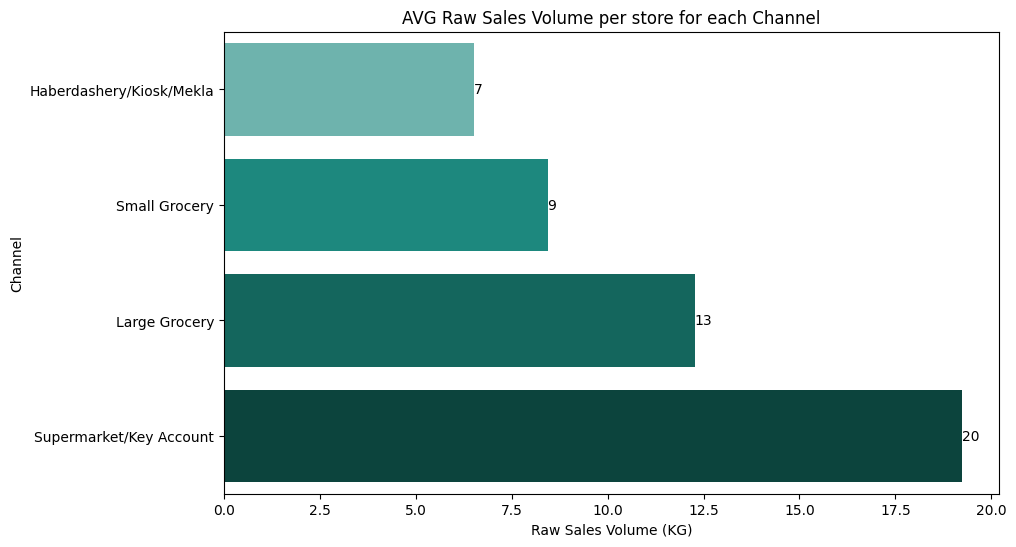

In [ ]:
agg_data = data.groupby('Channel')['Raw Sales Volume'].mean().reset_index()
agg_data.sort_values(by='Raw Sales Volume', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Raw Sales Volume', y='Channel', data=agg_data, palette=colors)
plt.title('AVG Raw Sales Volume per store for each Channel')

for i, v in enumerate(agg_data['Raw Sales Volume']):
      plt.text(v, i, f'{ceil(v)}', ha='left', va='center')

plt.xlabel('Raw Sales Volume (KG)')
plt.ylabel('Channel')

plt.show()

In [ ]:
data.groupby('Channel')['XFactor'].sum()

Channel
Haberdashery/Kiosk/Mekla    1.012657e+06
Large Grocery               1.151130e+07
Small Grocery               2.766097e+07
Supermarket/Key Account     1.835125e+06
Name: XFactor, dtype: float64

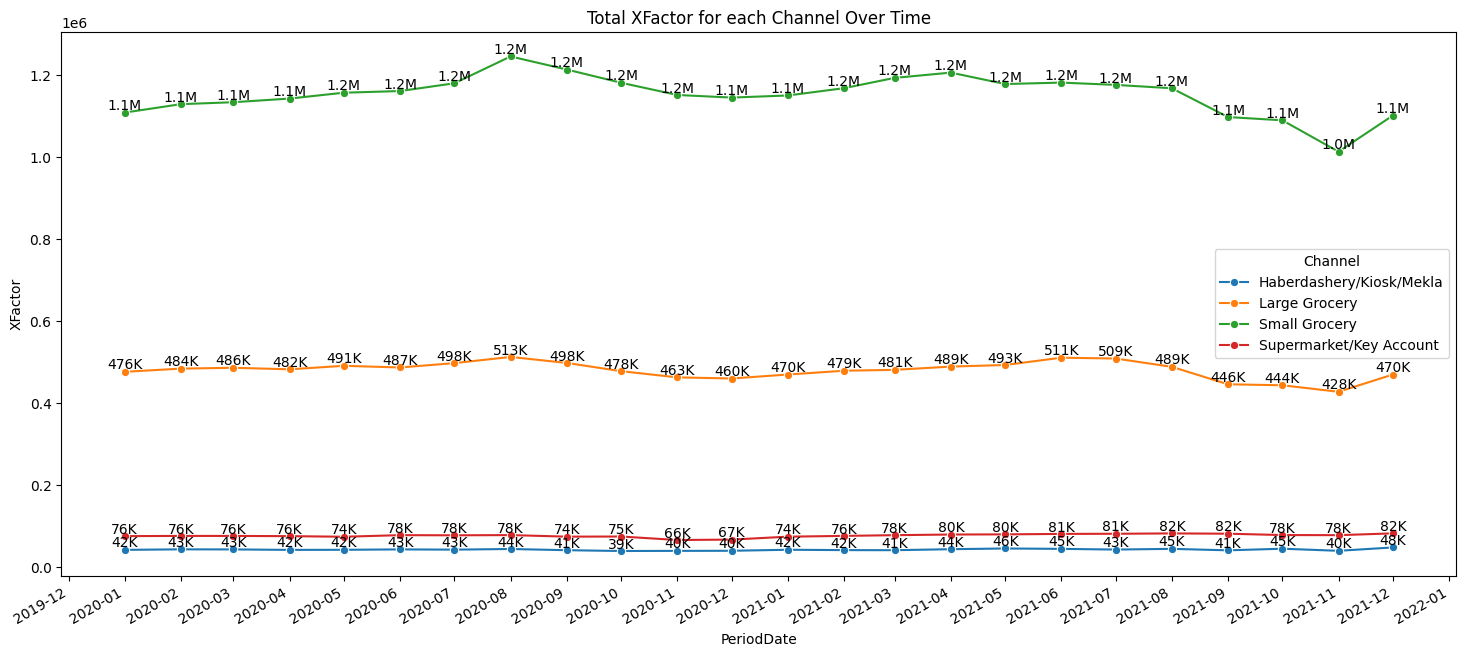

In [ ]:
agg_data = data.groupby(['PeriodDate', 'Channel'])['XFactor'].sum().reset_index()

Regions = agg_data['Channel'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='XFactor', data=agg_data, hue='Channel', ci=None, style='Channel', dashes=None, markers=markers_dict)
plt.title('Total XFactor for each Channel Over Time')

for x, y, label in zip(agg_data['PeriodDate'], agg_data['XFactor'], agg_data['Channel']):
    if y > 1e6:
      plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
    else:
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

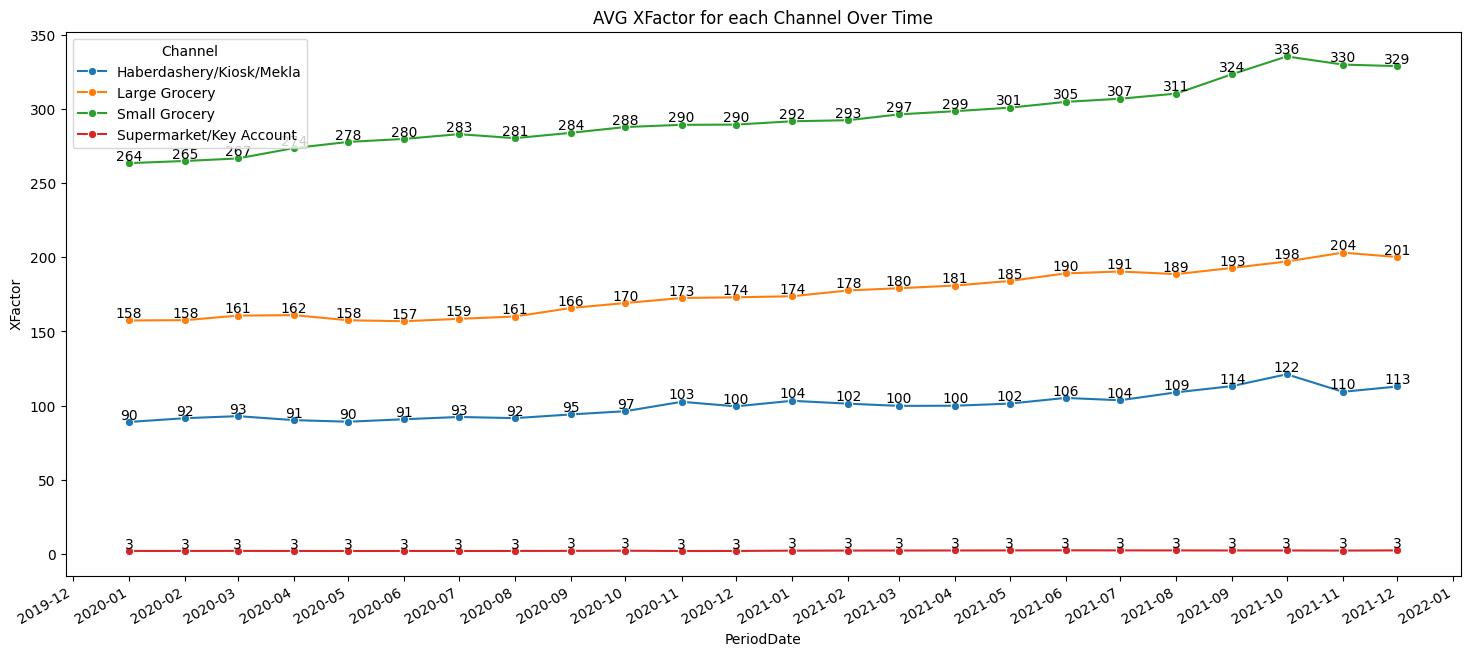

In [ ]:
agg_data = data.groupby(['PeriodDate', 'Channel'])['XFactor'].mean().reset_index()

Regions = agg_data['Channel'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='XFactor', data=agg_data, hue='Channel', ci=None, style='Channel', dashes=None, markers=markers_dict)
plt.title('AVG XFactor for each Channel Over Time')

for x, y, label in zip(agg_data['PeriodDate'], agg_data['XFactor'], agg_data['Channel']):
      plt.text(x, y, f'{ceil(y)}', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

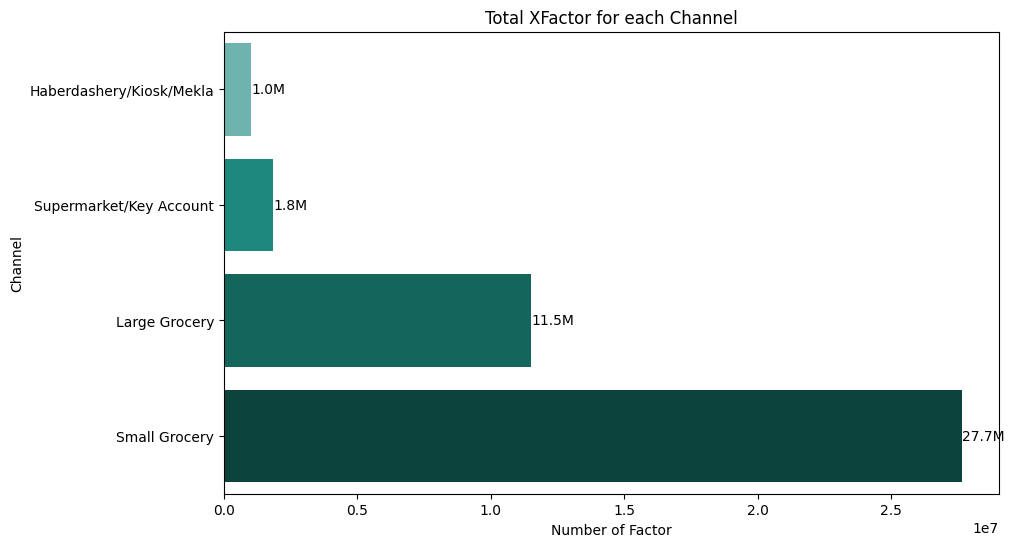

In [ ]:
agg_data = data.groupby('Channel')['XFactor'].sum().reset_index()
agg_data.sort_values(by='XFactor', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='XFactor', y='Channel', data=agg_data, palette=colors)
plt.title('Total XFactor for each Channel')

for i, v in enumerate(agg_data['XFactor']):
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.xlabel('Number of Factor')
plt.ylabel('Channel')

plt.show()

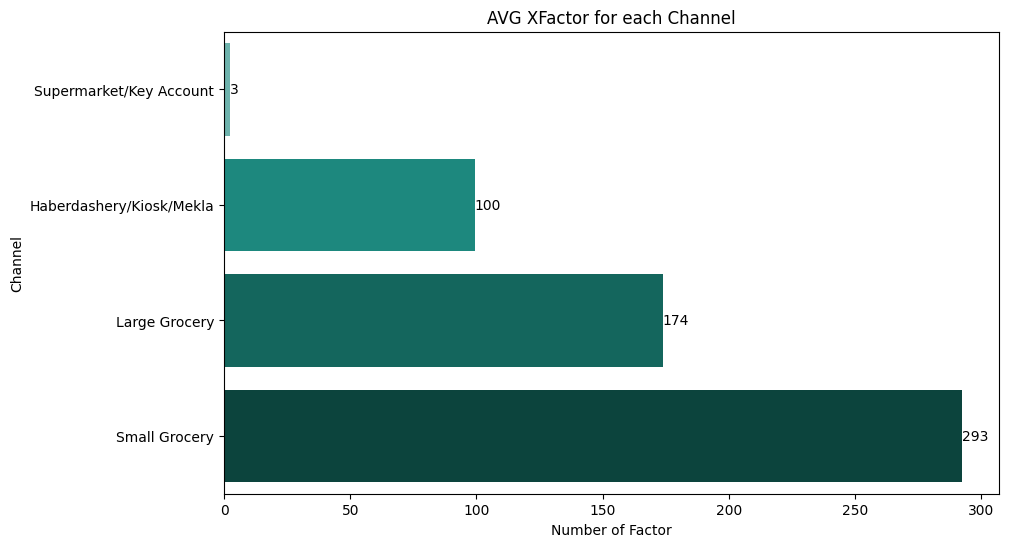

In [ ]:
agg_data = data.groupby('Channel')['XFactor'].mean().reset_index()
agg_data.sort_values(by='XFactor', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='XFactor', y='Channel', data=agg_data, palette=colors)
plt.title('AVG XFactor for each Channel')

for i, v in enumerate(agg_data['XFactor']):
      plt.text(v, i, f'{ceil(v)}', ha='left', va='center')

plt.xlabel('Number of Factor')
plt.ylabel('Channel')

plt.show()

## Conclusion

1. Despite the **SuperMarket** Channel having the highest number of records over the two years, the total and average extrapolated sales volume is highest in **Small Grocery**, followed by **Large Grocery**. Interestingly, the average extrapolated sales in **kiosks** exceed those of **Supermarket**.
2. The average raw sales are highest in **SuperMarket**, followed by **Large Grocery**, **Small Grocery**, and **kiosks**, which aligns with expectations based on the store sizes.
3. XFactors play a significant role in influencing extrapolated sales volume. The average XFactors rank highest in **Small Grocery**, followed by **Large Grocery**, **kiosks**, and then **SuperMarket**.
1. **Small Grocery** channels demonstrate the most significant difference between raw and extrapolated sales volumes, which can be attributed to their large number of similar stores (high XFactor). This suggests that while each store may not sell much individually, collectively, they represent a large market share.
2. **Large Grocery** stores also show a notable increase from raw to extrapolated sales due to a high XFactor, indicating a strong presence in the market.
3. **Supermarket/Key Account** channels, while having the highest raw sales, do not see as large an increase in extrapolated sales due to a lower XFactor, suggesting that these channels are more concentrated and have fewer similar stores.
4. **Haberdashery/Kiosk/Mekla** has minimal growth from raw to extrapolated sales, reflecting its limited market reach and smaller store network.


Regional Sales Performance by Channel

In [ ]:
data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].sum()

Region        Channel                 
ALEXANDRIA    Haberdashery/Kiosk/Mekla    9.871599e+04
              Large Grocery               1.264391e+07
              Small Grocery               1.403798e+07
              Supermarket/Key Account     4.811793e+06
CAIRO         Haberdashery/Kiosk/Mekla    1.463556e+06
              Large Grocery               5.315480e+07
              Small Grocery               5.334429e+07
              Supermarket/Key Account     1.348063e+07
CANAL ZONE    Haberdashery/Kiosk/Mekla    2.803483e+05
              Large Grocery               4.589235e+06
              Small Grocery               3.675531e+06
              Supermarket/Key Account     4.051457e+05
DELTA         Haberdashery/Kiosk/Mekla    1.051302e+06
              Large Grocery               3.778239e+07
              Small Grocery               7.614197e+07
              Supermarket/Key Account     8.316577e+06
UPPER EGYPT   Haberdashery/Kiosk/Mekla    3.512276e+06
              Large Grocery               3.047208e+07
              Small Grocery               8.427250e+07
              Supermarket/Key Account     3.818605e+06
Name: Extrapolated Sales Volume, dtype: float64

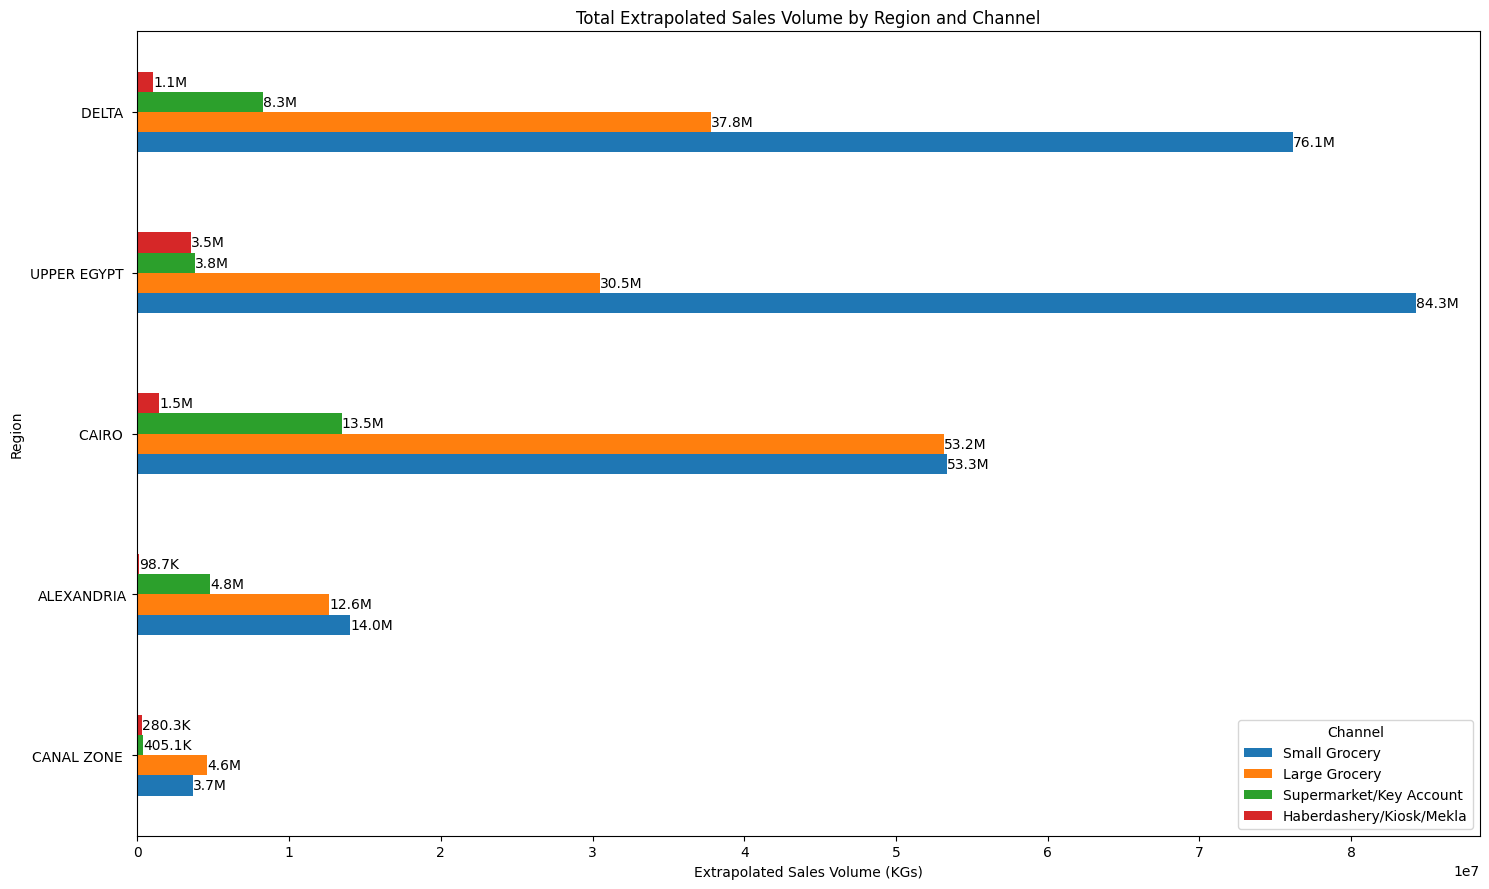

In [ ]:
grouped_data = data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].sum()

sorted_data = grouped_data.groupby(level=0).sum().sort_values().index
grouped_data = grouped_data.reindex(sorted_data, level=0)

sorted_data = grouped_data.groupby(level=1).sum().sort_values(ascending=False).index
grouped_data = grouped_data.reindex(sorted_data, level=1)

ax = grouped_data.unstack().plot(kind='barh', stacked=False, figsize=(15,9))

plt.title('Total Extrapolated Sales Volume by Region and Channel')
plt.xlabel('Extrapolated Sales Volume (KGs)')
plt.ylabel('Region')

def format_label(value):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'
    else:
        return f'{value:.1f}'

for container in ax.containers:
    labels = [format_label(v) for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].mean()

Region        Channel                 
ALEXANDRIA    Haberdashery/Kiosk/Mekla     483.901932
              Large Grocery               3072.639741
              Small Grocery               3194.079878
              Supermarket/Key Account       31.632806
CAIRO         Haberdashery/Kiosk/Mekla     607.284706
              Large Grocery               2885.711021
              Small Grocery               4265.837027
              Supermarket/Key Account       29.189351
CANAL ZONE    Haberdashery/Kiosk/Mekla     258.147616
              Large Grocery                530.977134
              Small Grocery                611.976522
              Supermarket/Key Account       40.927945
DELTA         Haberdashery/Kiosk/Mekla     523.035636
              Large Grocery               2270.030466
              Small Grocery               2463.981913
              Supermarket/Key Account       61.258056
UPPER EGYPT   Haberdashery/Kiosk/Mekla     784.866221
              Large Grocery               1656.001411
              Small Grocery               2067.681550
              Supermarket/Key Account       72.610858
Name: Extrapolated Sales Volume, dtype: float64

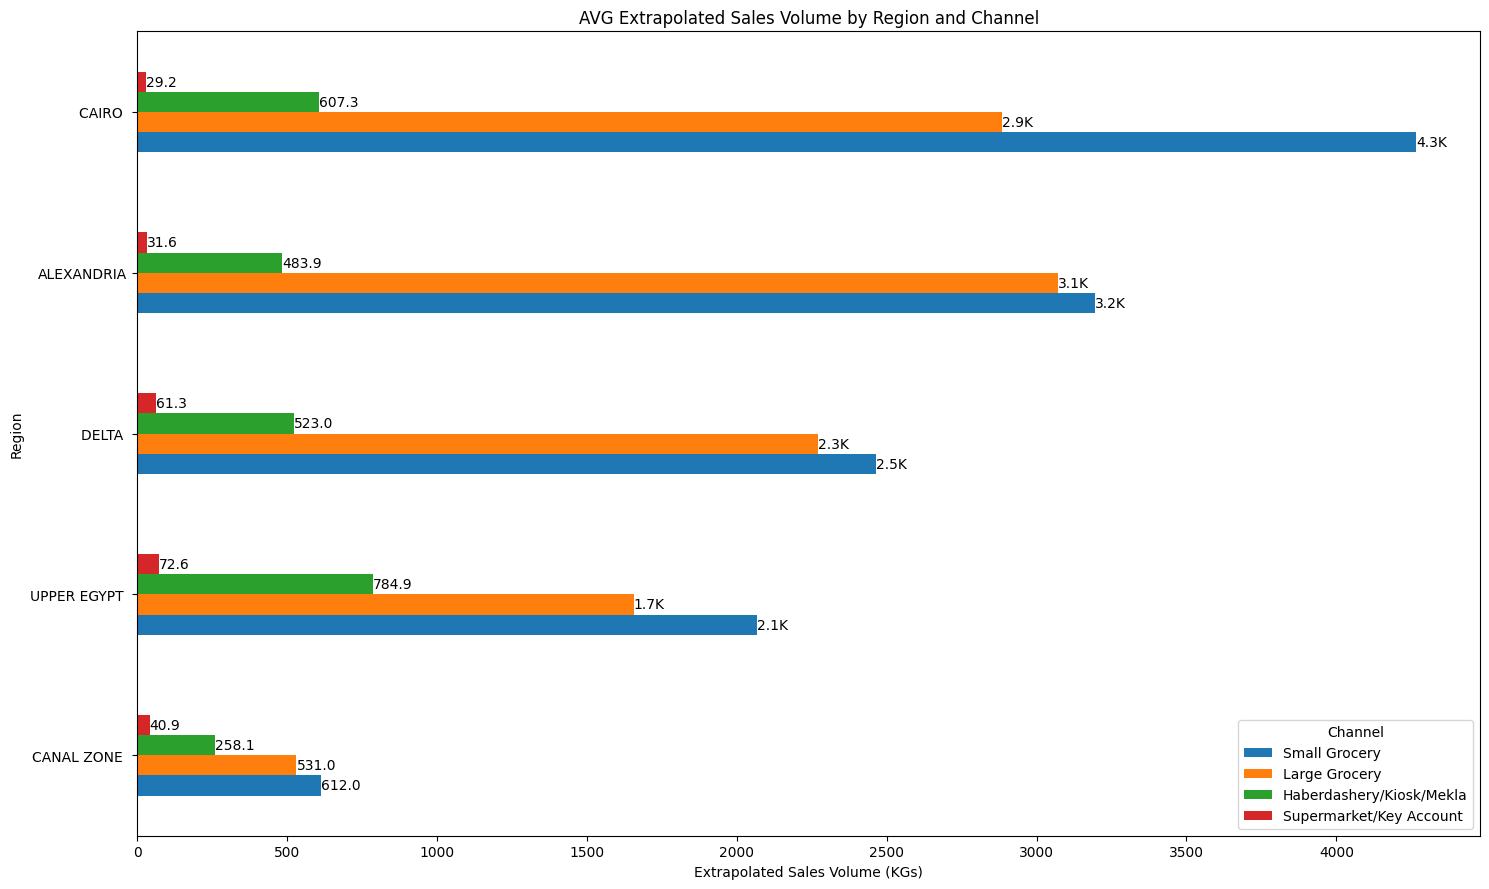

In [ ]:
grouped_data = data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].mean()

sorted_data = grouped_data.groupby(level=0).mean().sort_values().index
grouped_data = grouped_data.reindex(sorted_data, level=0)

sorted_data = grouped_data.groupby(level=1).mean().sort_values(ascending=False).index
grouped_data = grouped_data.reindex(sorted_data, level=1)

ax = grouped_data.unstack().plot(kind='barh', stacked=False, figsize=(15,9))

plt.title('AVG Extrapolated Sales Volume by Region and Channel')
plt.xlabel('Extrapolated Sales Volume (KGs)')
plt.ylabel('Region')

def format_label(value):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'
    else:
        return f'{value:.1f}'

for container in ax.containers:
    labels = [format_label(v) for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
data.groupby(['Region', 'Channel'])['XFactor'].mean()

Region        Channel                 
ALEXANDRIA    Haberdashery/Kiosk/Mekla    169.570089
              Large Grocery               214.145745
              Small Grocery               244.990663
              Supermarket/Key Account       1.607244
CAIRO         Haberdashery/Kiosk/Mekla     82.094355
              Large Grocery               258.907980
              Small Grocery               393.496420
              Supermarket/Key Account       2.095816
CANAL ZONE    Haberdashery/Kiosk/Mekla     52.452792
              Large Grocery                47.368849
              Small Grocery                71.697897
              Supermarket/Key Account       5.618136
DELTA         Haberdashery/Kiosk/Mekla     94.248568
              Large Grocery               160.158377
              Small Grocery               325.815418
              Supermarket/Key Account       2.337479
UPPER EGYPT   Haberdashery/Kiosk/Mekla    119.288099
              Large Grocery               151.400535
              Small Grocery               273.930724
              Supermarket/Key Account       4.749277
Name: XFactor, dtype: float64

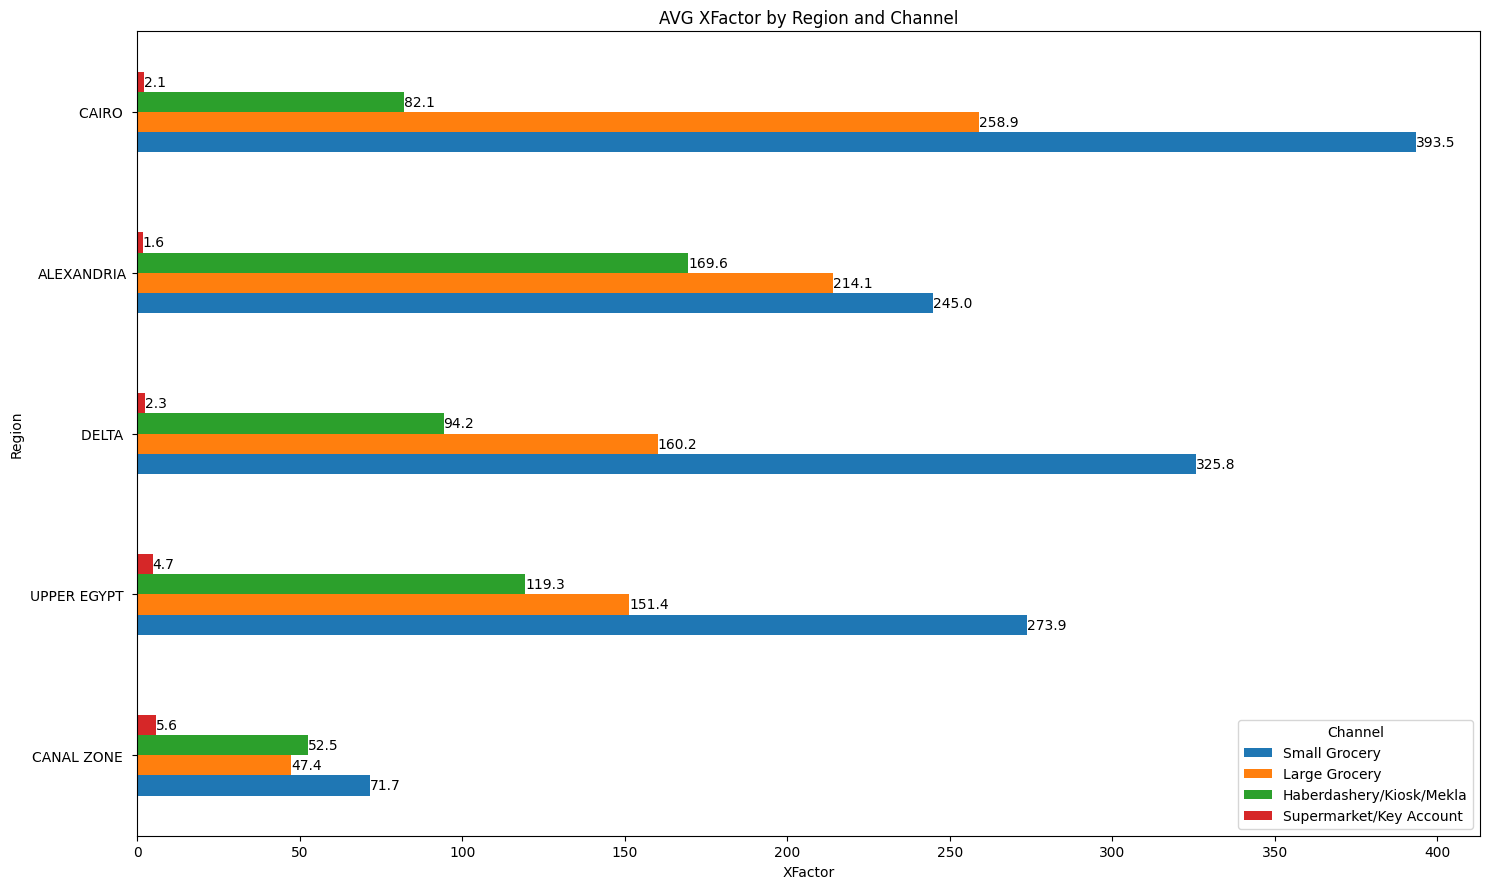

In [ ]:
grouped_data = data.groupby(['Region', 'Channel'])['XFactor'].mean()

sorted_data = grouped_data.groupby(level=0).mean().sort_values().index
grouped_data = grouped_data.reindex(sorted_data, level=0)

sorted_data = grouped_data.groupby(level=1).mean().sort_values(ascending=False).index
grouped_data = grouped_data.reindex(sorted_data, level=1)

ax = grouped_data.unstack().plot(kind='barh', stacked=False, figsize=(15,9))

plt.title('AVG XFactor by Region and Channel')
plt.xlabel('XFactor')
plt.ylabel('Region')

def format_label(value):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'
    else:
        return f'{value:.1f}'

for container in ax.containers:
    labels = [format_label(v) for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

## Conclusion

* **Small Grocery** stores consistently have the highest average extrapolated sales volume across most regions. This suggests that **Small Grocery** stores play a significant role in driving sales in all regions, particularly in **CAIRO** and **ALEXANDRIA** where their average sales are notably high.

* In contrast, **Supermarket/Key Account** accounts have the lowest average extrapolated sales volume in all regions. This is particularly noticeable in **Alexandria** and **Cairo**, where their sales figures are significantly lower compared to other channels, indicating that **supermarkets** are not the main driver of sales in these areas.

*  **UPPER EGYPT** shows a strong performance in the **Small Grocery** channel with a total extrapolated sales volume of 84.27 million, which is the highest among all regions and channels.

*  **DELTA** also performs well in the **Small Grocery** channel with total 76.14 million in extrapolated sales.

*  **CAIRO** has the highest total sales in the **Large Grocery** channel, contributing significantly to its total sales.

*  **Small Groceries** have consistently high sales because of high XFactors across all regions, making them a key channel to focus on for maximizing sales.

*  **Supermarket/Key Account** channels show significant total sales in **Cairo** and **Delta**, while regions like **Canal Zone** have much lower sales in this channel.

*  **Haberdashery/Kiosk/Mekla** channels generally show lower sales across all regions, with the highest being in Upper Egypt at 3.51 million. This channel contributes the least to the overall sales volume, indicating it might not be the primary focus for growth.


## Descision Making

1. **Focus on Small Grocery Stores:** Small grocery stores have consistently high average extrapolated sales volume across most regions, showing they are a key sales driver. So we can:
   * Increase product availability and variety in small grocery stores to maintain and boost their sales.
   * Implement targeted promotions and loyalty programs to encourage repeat purchases.
   * Strengthen partnerships with small grocery store chains to secure better shelf placement and visibility.
2. **Address the Impact of XFactors on Supermarket Extrapolated Sales:** Supermarkets have the highest raw sales per store, which indicates strong in-store performance. However, their extrapolated sales volume is lower due to the small number of similar stores (low XFactors). So to emphasize the supermarkets' strengths:
   * Increase store presence
   * Focus marketing efforts on emphasizing the reliability and higher product variety that supermarkets offer. Strengthening their competitive position may encourage more store openings and partnerships.
   * Collaborate with supermarket retailers to encourage expansion in underrepresented regions. More stores mean higher XFactors and a corresponding increase in extrapolated sales.
   * Given the higher raw sales, introduce product bundles and multi-buy offers to further enhance customer spending per store. This could also help justify expanding store networks.
3. **Optimize Distribution in Large Grocery Stores:** Large grocery stores perform well but typically trail behind small groceries. So it will be good to:
   * Ensure that popular and high-demand products are well-stocked in large grocery stores.
   * Negotiate better shelf space and placements in large grocery stores to improve visibility and sales.
   * Run cross-promotions between large and small grocery stores to boost sales in both channels.
4. **Leverage Kiosks for Niche Sales:** Kiosks show moderate performance, especially in **Upper Egypt**, indicating potential for growth. Se we can:
   * Use kiosks for localized, niche marketing strategies, offering products suited to quick, on-the-go purchases.
   * Increase the variety of products sold through kiosks, especially items that appeal to convenience-oriented customers.
5. **Increase XFactors for Supermarkets:** Since supermarkets have good raw sales, increasing the XFactors (i.e., the representation of similar stores in the market) could boost total extrapolated sales.


# 4. Electronic and non-Electronic Outlets Sales Analysis

In [ ]:
data['Electronic'].value_counts()

Electronic
True     786365
False    196808
Name: count, dtype: int64

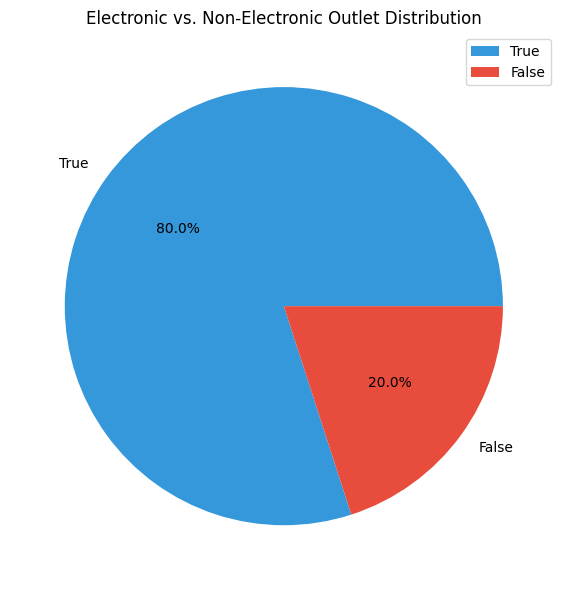

In [ ]:
plt.figure(figsize=(7,6))
plt.pie(data['Electronic'].value_counts(), labels=data['Electronic'].value_counts().index, autopct='%1.1f%%', colors=['#3498db', '#e74c3c'])
plt.title('Electronic vs. Non-Electronic Outlet Distribution')

plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

In [ ]:
data['Extrapolated Sales Volume'].groupby(data['Electronic']).sum()

Electronic
False    3.880298e+08
True     1.932382e+07
Name: Extrapolated Sales Volume, dtype: float64

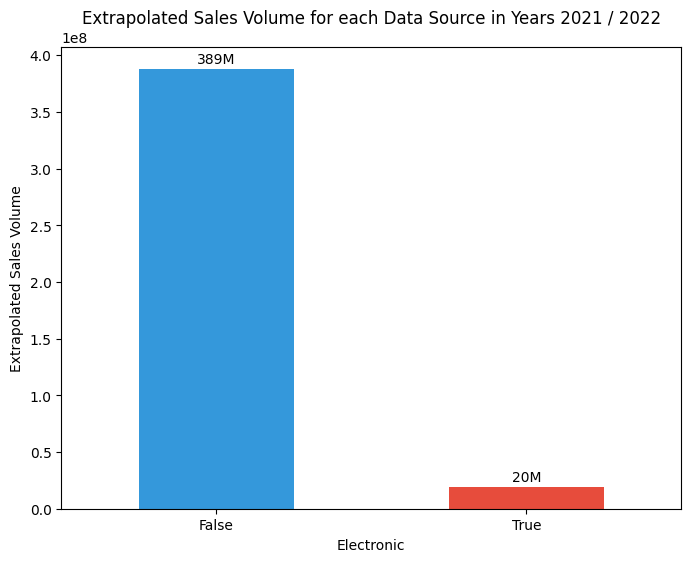

In [ ]:
plt.figure(figsize=(8,6))
ax = data['Extrapolated Sales Volume'].groupby(data['Electronic']).sum().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Extrapolated Sales Volume for each Data Source in Years 2021 / 2022')
plt.xlabel('Electronic')
plt.ylabel('Extrapolated Sales Volume')

plt.xticks(rotation=0)

for container in ax.containers:
    labels = [f'{ceil(v/1e6)}M' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', padding=2)

plt.show()

In [ ]:
data.groupby('Electronic').agg({
    'Extrapolated Sales Volume': 'sum',
    'Raw Sales Volume': 'sum',
    'XFactor': 'sum'
})

Extrapolated Sales Volume  Raw Sales Volume       XFactor
Electronic                                                           
False                    3.880298e+08      2.204315e+06  4.076672e+07
True                     1.932382e+07      1.509802e+07  1.253333e+06

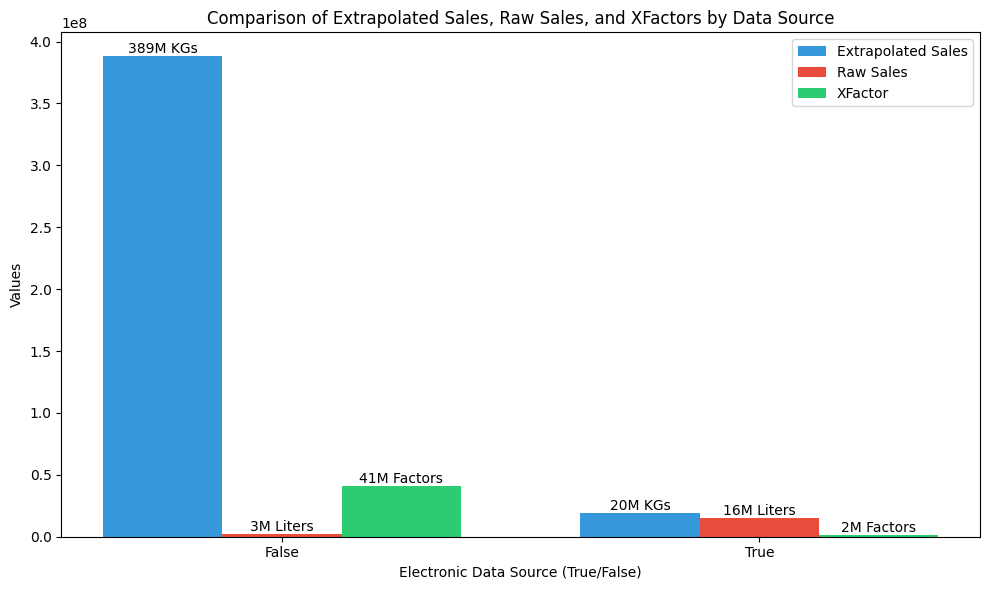

In [ ]:
grouped_data = data.groupby('Electronic').agg({
    'Extrapolated Sales Volume': 'sum',
    'Raw Sales Volume': 'sum',
    'XFactor': 'sum'
})

extrapolated_sales = grouped_data['Extrapolated Sales Volume']
raw_sales = grouped_data['Raw Sales Volume']
xfactors = grouped_data['XFactor']

x = np.arange(len(grouped_data.index))

bar_width = 0.25
plt.figure(figsize=(10,6))

plt.bar(x - bar_width, extrapolated_sales, width=bar_width, label='Extrapolated Sales', color='#3498db')
plt.bar(x, raw_sales, width=bar_width, label='Raw Sales', color='#e74c3c')
plt.bar(x + bar_width, xfactors, width=bar_width, label='XFactor', color='#2ecc71')

plt.title('Comparison of Extrapolated Sales, Raw Sales, and XFactors by Data Source')
plt.xlabel('Electronic Data Source (True/False)')
plt.ylabel('Values')
plt.xticks(x, grouped_data.index)

for i in range(len(extrapolated_sales)):
    plt.text(i - bar_width, extrapolated_sales[i], f'{ceil(extrapolated_sales[i]/1e6)}M KGs', ha='center', va='bottom')
    plt.text(i, raw_sales[i], f'{ceil(raw_sales[i]/1e6)}M Liters', ha='center', va='bottom')
    plt.text(i + bar_width, xfactors[i], f'{ceil(xfactors[i]/1e6)}M Factors', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

* There is a significantly larger volume of electronic data compared to manual data. This suggests that most of the data collected is from electronic sources, indicating that a substantial number of sales records come from retailers using electronic reporting methods.

* While the Electronic data that received from retailers, is more prevalent in terms of count, the Non-Electronic, which represents manually collected data, is significantly more impactful in terms of total sales volume.  
This suggests that the data collected manually may involve higher-value items or bulk sales, leading to a greater overall contribution to the Extrapolated Sales Volume.

* Even though electronic data has a lower extrapolated sales volume compared to manual data, its higher raw sales volume (15.09 million KGs) indicates that the stores using electronic reporting may be contributing significantly to sales but are not extrapolated as heavily due to a smaller XFactor.

* The XFactor for electronic data is lower (1.25 million) compared to manual data (40.77 million). This disparity might be influenced by:
   * **Sampling Methods:** The electronic data may be from a narrower selection of stores or geographic areas, affecting its extrapolation.
   * **Quality of Data:** Electronic data could be more precise, leading to a lower extrapolation factor compared to potentially broader but less precise manual data.

## Decisions

1. Reassess the XFactor methodology this might help improve the reliability of extrapolated sales from electronic data. If electronic data provides higher raw sales but lower extrapolated values, exploring reasons behind this discrepancy could yield insights for better modeling.

2. Understand why electronic data has high raw sales but low extrapolated sales this could guide marketing strategies and operational improvements for retailers relying on electronic reporting.


In [ ]:
data.groupby(['Electronic', 'Channel'])['Extrapolated Sales Volume'].sum()

Electronic  Channel                 
False       Haberdashery/Kiosk/Mekla    6.406198e+06
            Large Grocery               1.386424e+08
            Small Grocery               2.314723e+08
            Supermarket/Key Account     1.150894e+07
True        Supermarket/Key Account     1.932382e+07
Name: Extrapolated Sales Volume, dtype: float64

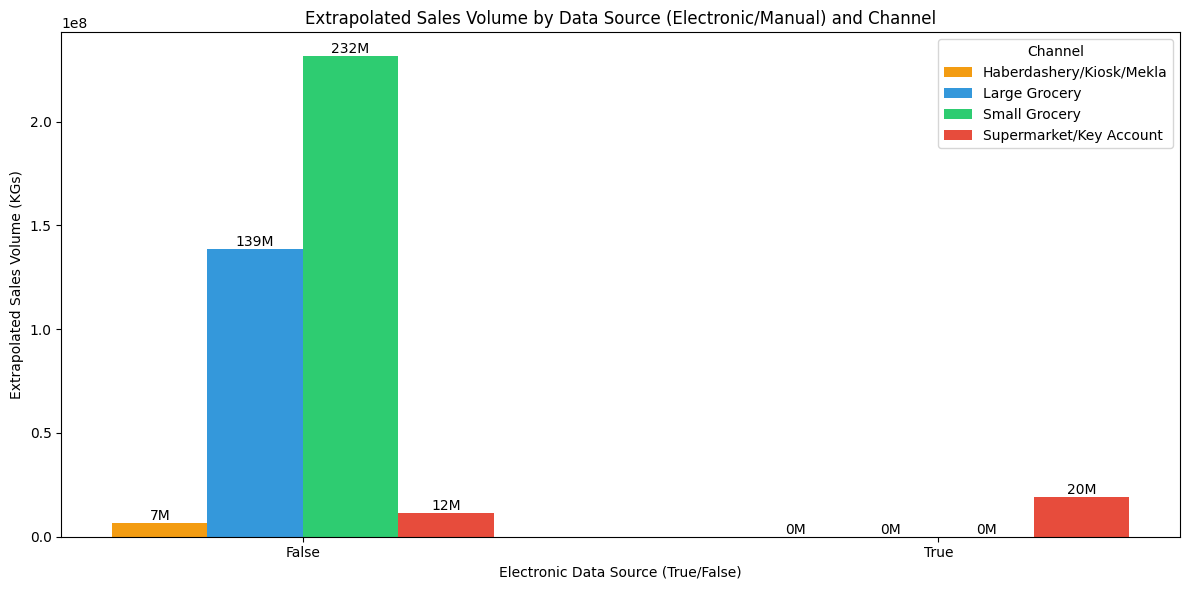

In [ ]:
grouped_data = data.groupby(['Electronic', 'Channel'])['Extrapolated Sales Volume'].sum().unstack()
grouped_data = grouped_data.fillna(0)

x = np.arange(len(grouped_data.index))

bar_width = 0.15
channels = grouped_data.columns
colors = ['#f39c12', '#3498db', '#2ecc71', '#e74c3c']

plt.figure(figsize=(12,6))

for i, (channel, color) in enumerate(zip(channels, colors)):
    plt.bar(x + i*bar_width, grouped_data[channel], width=bar_width, label=channel, color=color)

plt.title('Extrapolated Sales Volume by Data Source (Electronic/Manual) and Channel')
plt.xlabel('Electronic Data Source (True/False)')
plt.ylabel('Extrapolated Sales Volume (KGs)')
plt.xticks(x + bar_width * (len(channels) - 1) / 2, grouped_data.index)

for i, channel in enumerate(channels):
    for j in range(len(grouped_data.index)):
        plt.text(j + i*bar_width, grouped_data[channel][j],
                 f'{ceil(grouped_data[channel][j]/1e6)}M',
                 ha='center', va='bottom')

plt.legend(title='Channel')

plt.tight_layout()
plt.show()


* The data collected electronically comes exclusively from Supermarket/Key Account channels, with a total extrapolated sales volume of approximately 19.3 million KGs.
* This highlights that electronic data collection is more focused on Supermarkets, potentially showing an opportunity to extend electronic data collection to other channels, particularly Small and Large Groceries, which contribute the most when collected manually.
* Supermarkets have slightly higher sales volume under electronic data collection compared to manual data (19.3M vs. 11.5M). This could suggest that electronic collection is more accurate or that there is more consistency in these stores.
* The sales performance in supermarkets that collect data electronically might be influenced by store size. Larger supermarkets, equipped with machines for electronic data collection, tend to have more structured and accurate data, while smaller supermarkets may rely on manual data collection, which could result in lower sales volume visibility or reporting. This difference in data collection methods between large and small supermarkets may be a key factor affecting their extrapolated sales performance.

In [ ]:
data.groupby(['Electronic', 'Channel'])['XFactor'].sum()

Electronic  Channel                 
False       Haberdashery/Kiosk/Mekla    1.012657e+06
            Large Grocery               1.151130e+07
            Small Grocery               2.766097e+07
            Supermarket/Key Account     5.817925e+05
True        Supermarket/Key Account     1.253333e+06
Name: XFactor, dtype: float64

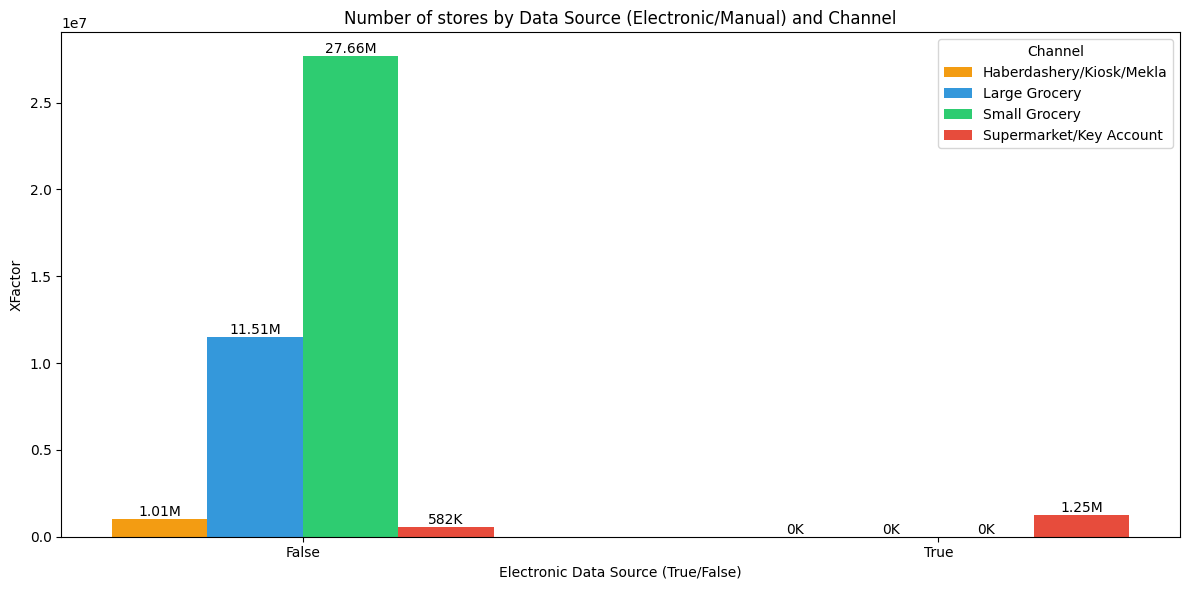

In [ ]:
grouped_data = data.groupby(['Electronic', 'Channel'])['XFactor'].sum().unstack()
grouped_data = grouped_data.fillna(0)

x = np.arange(len(grouped_data.index))

bar_width = 0.15
channels = grouped_data.columns

plt.figure(figsize=(12,6))

for i, (channel, color) in enumerate(zip(channels, colors)):
    plt.bar(x + i*bar_width, grouped_data[channel], width=bar_width, label=channel, color=color)

plt.title('Number of stores by Data Source (Electronic/Manual) and Channel')
plt.xlabel('Electronic Data Source (True/False)')
plt.ylabel('XFactor')
plt.xticks(x + bar_width * (len(channels) - 1) / 2, grouped_data.index)

for i, channel in enumerate(channels):
    for j in range(len(grouped_data.index)):
        if grouped_data[channel][j] >= 1e6:
          plt.text(j + i*bar_width, grouped_data[channel][j],
                  f'{round(grouped_data[channel][j]/1e6,2)}M',
                  ha='center', va='bottom')
        else:
          plt.text(j + i*bar_width, grouped_data[channel][j],
                  f'{ceil(grouped_data[channel][j]/1e3)}K',
                  ha='center', va='bottom')

plt.legend(title='Channel')

plt.tight_layout()
plt.show()


## Conclusion

* The XFactor for supermarkets under electronic data collection (1.25 million) is more than double that of supermarkets relying on manual collection (581.7 thousand). This large discrepancy suggests that electronic data collection in supermarkets leads to more accurate scaling of raw sales, providing a more reliable representation of actual sales performance.

* Supermarkets with electronic data collection report higher extrapolated sales volumes (19.3M KGs) compared to those using manual data collection (11.5M KGs). The difference in XFactors indicates that electronic systems in larger supermarkets capture a more complete picture of sales activity.

* Among all the sales channels, only supermarkets utilize electronic data collection methods, highlighting a technological gap between supermarkets and other channels such as small and large groceries, as well as kiosks. This creates a potential opportunity to extend electronic data collection systems to these other channels to improve the accuracy of their sales data.

* Supermarkets using electronic data collection report higher extrapolated sales volumes (19.3M KGs) compared to those relying on manual methods (11.5M KGs). The larger XFactor (1.25 million) further suggests that supermarkets using electronic systems have better visibility and more consistent data collection practices.

* Given that electronic data collection is currently limited to supermarkets, there is an opportunity to extend these systems to other channels like small and large groceries, which contribute significantly to sales when data is collected manually. This expansion could improve the accuracy and reliability of sales data across all channels.

# 5. Products and Brands Sales Analysis

#### Identify top-selling Products and Brands based on Raw Sales Volume and Extrapolated Sales Volume.

In [ ]:
data['Product name'].nunique()

1749

In [5]:
from re import sub
def format_label(label):
    label = sub(r'[\(\)]', '', label)
    label = sub('-', ' ', label)
    return '\n'.join(label.strip().split())


def format_millions(value):
    return f'{value / 1e6:.1f}M'

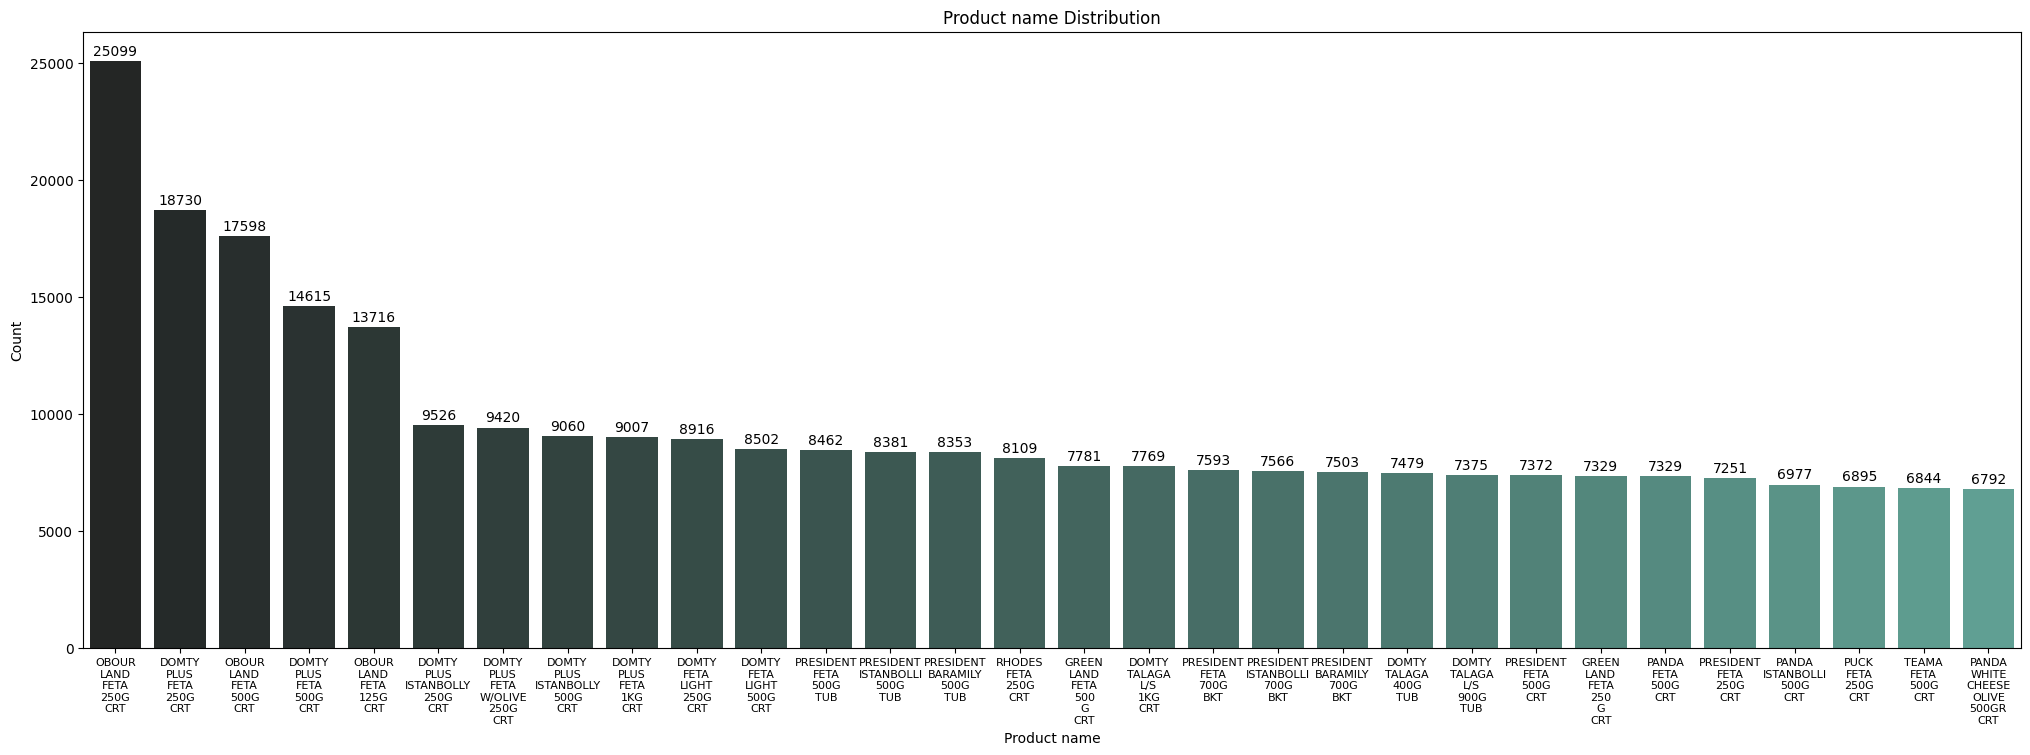

In [ ]:
product_counts = data['Product name'].value_counts()
top_30_products = product_counts.head(30)
top_30_data = data[data['Product name'].isin(top_30_products.index)]

top_30_labels = [format_label(label) for label in top_30_products.index]

plt.figure(figsize=(25,8))
ax = sns.countplot(data=top_30_data, x='Product name', order=top_30_products.index, palette="dark:#5A9")
plt.title('Product name Distribution')
plt.xlabel('Product name')
plt.ylabel('Count')
plt.xticks(fontsize=8)

ax.set_xticks(np.arange(len(top_30_labels)))
ax.set_xticklabels(top_30_labels)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

plt.show()


In [ ]:
product_sales = data.groupby('Product name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30)

product_sales.values

array([58026732.29679775, 33644398.769221  , 22075603.509839  ,
       17767640.1685981 , 15781479.6212795 ,  7466986.2875235 ,
        5654574.4719245 ,  5412035.3765965 ,  5405734.63664437,
        5056522.04765825,  4753024.17328625,  3995435.214105  ,
        3474776.87589425,  3349668.49824   ,  3118303.371908  ,
        2846419.66832575,  2787665.881323  ,  2749137.64829575,
        2657322.33555025,  2588729.0505885 ,  2496819.3081185 ,
        2093747.53604575,  1934060.01949575,  1873019.1730405 ,
        1768914.7421155 ,  1687516.95118375,  1583567.64461   ,
        1578001.570938  ,  1457780.5103315 ,  1416279.0273665 ])

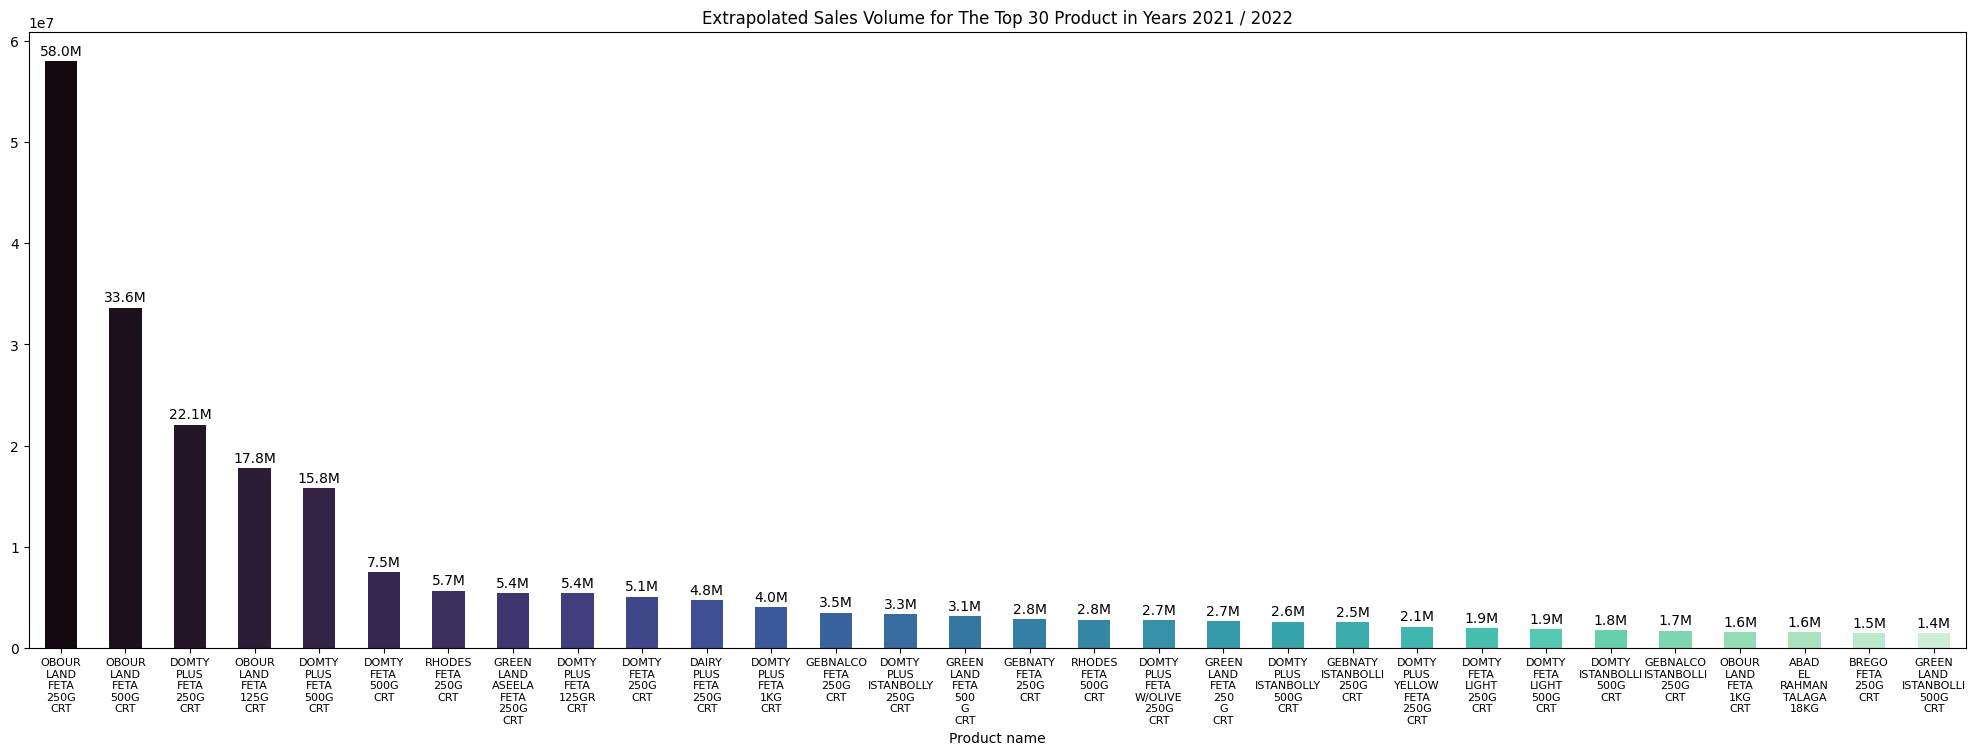

In [ ]:
top_30_labels = [format_label(label) for label in product_sales.index]

palette = sns.color_palette('mako', len(product_sales))
plt.figure(figsize=(25,8))

ax = data.groupby('Product name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color=palette)
plt.title('Extrapolated Sales Volume for The Top 30 Product in Years 2021 / 2022')
ax.set_xticklabels(top_30_labels)
plt.xticks(rotation=0, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, labels=[format_millions(val) for val in container.datavalues], label_type='edge', padding=2)

plt.show()

In [ ]:
data['Brand name'].nunique()

815

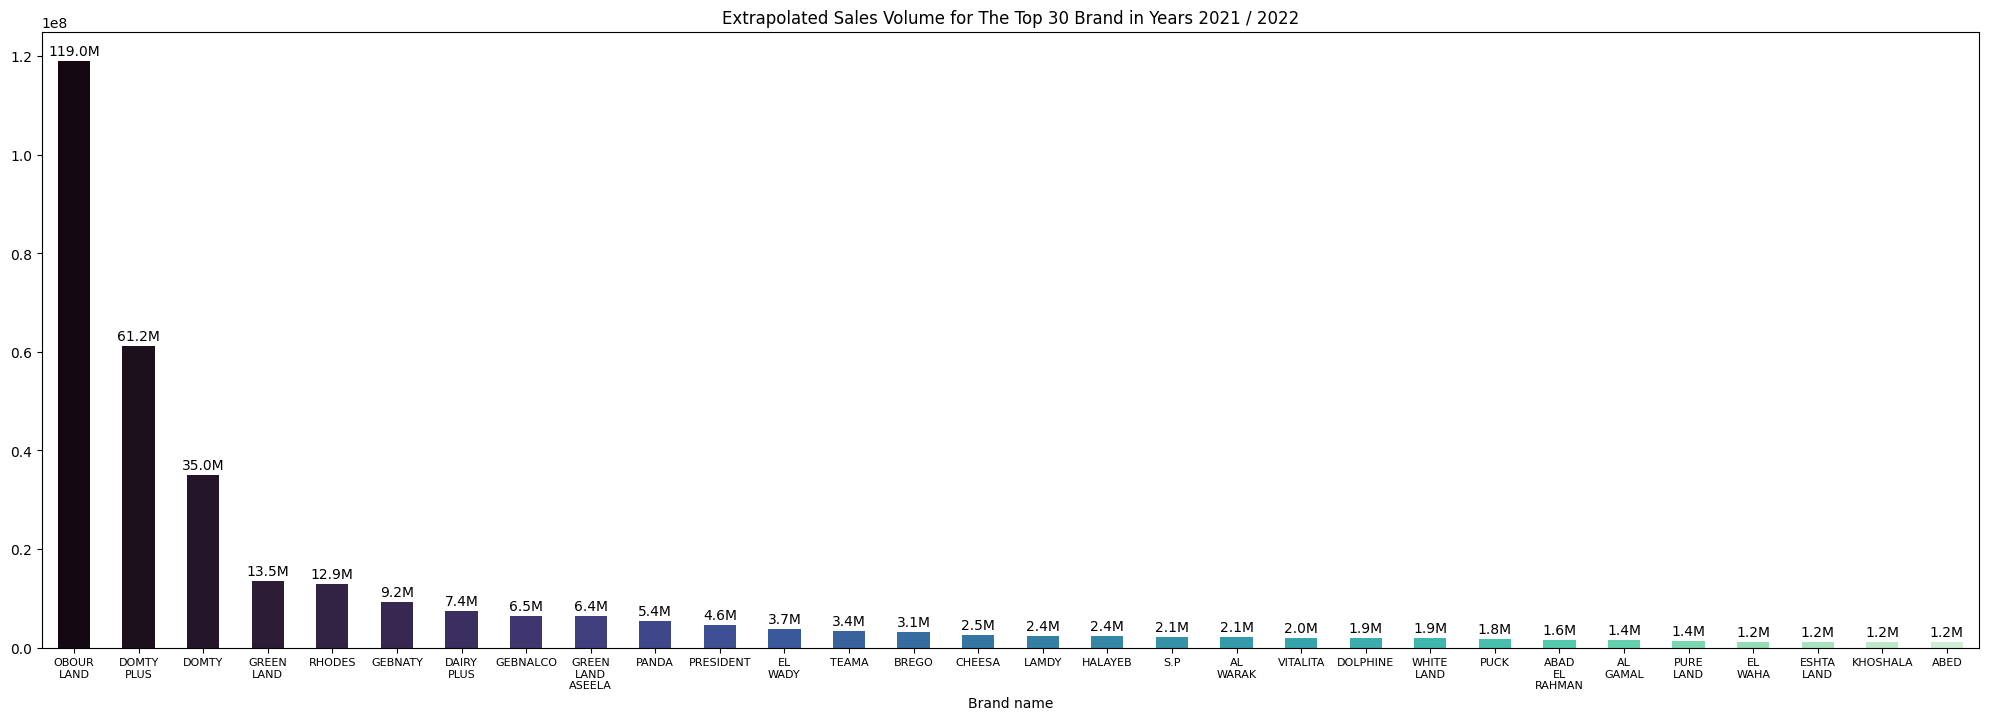

In [ ]:
brands_sales = data.groupby('Brand name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30)
top_30_labels = [format_label(label) for label in brands_sales.index]

palette = sns.color_palette('mako', len(brands_sales))
plt.figure(figsize=(25,8))

ax = data.groupby('Brand name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color=palette)
plt.title('Extrapolated Sales Volume for The Top 30 Brand in Years 2021 / 2022')
ax.set_xticklabels(top_30_labels)
plt.xticks(rotation=0, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, labels=[format_millions(val) for val in container.datavalues], label_type='edge', padding=2)

plt.show()

# 6. Manufacturer Sales Analysis

In [ ]:
data['Manufacturer name'].nunique()

712

In [ ]:
data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).index

Index(['OBOUR LAND CO', 'DOMTY - ARABIAN FOOD INDUSTRIES CO',
       'LACTALIS-HALAWA', 'THE ARAB DAIRY PRODUCTS CO.', 'NOT AVAILABLE',
       'AL BOROUJ CO', 'GREEN FIELD CO', 'DAIRY INTER.CO', 'RIYADA S.A.E.',
       'BREGO FOR FOOD INDUSTRIES ( S.A.E )', 'AM GROUP CO',
       'KHALED KHOSHALA CO', 'TAHTA FACTORY FOR CHEESE & BUTTER',
       'AL WARAK CO', 'HALAYEB CO', 'EGYPTION CO', 'FAFECO', 'ABAD CO',
       'EL FAYOUM CO.', 'ABD EL RAHEEM CO', 'ABED CO', 'MALEKA CO', 'TIBA CO',
       'AL FATH CO.', 'AWLAD NOUR CO', 'EL WAHA', 'SARA CO.', 'NADA CO',
       'MISR OCTOBER CO.', 'AL COMANDA CO'],
      dtype='object', name='Manufacturer name')

In [68]:
len(data[data['Manufacturer name'] == 'NOT AVAILABLE'])

2236

In [69]:
data[data['Manufacturer name'] == 'NOT AVAILABLE']['Brand name'].unique()

array(['TIBA ELTAYBA', 'ABO KAREM', 'AL RADWAN', 'REFAAT', 'ABD AL FATAH',
       'ENGY', 'AL SHAFIE', 'BENT EL RIEF', 'KHAIR BALADNA',
       'EL HARAMAIN', 'NEAMA', 'TIBA', 'MOHAMED EL HALAWANY', 'DALAH',
       'AL SHAFEY', 'AL MANAR', 'MAZROOAA', 'EL SHEEK ZAYED', 'TEBA',
       'ABO NOUR', 'AL SHAHD', 'ABO HEWIDY', 'AWLAD NASSAR', 'HABEBA',
       'ABO EL KHER', 'EL BADAWIYA', 'ABO ISMAIEL', 'AL SAIED',
       'EL AMER TAHA', 'FRESH', 'EL MADINA EL MONAWARA', 'EL BADR',
       'OUDY & SARA', 'GHAZY', 'RADWAN', 'EL SHEREF', 'AL KEMA',
       'REYAD EL SALHEN', 'NOUR', 'NAGHAM', 'AWLAD SOBH', 'EL FAKHAMA',
       'MAKA EL ZAHABIA', 'AL MARWA', 'KHAIR EL MENOUFIA', 'EL NEWIRY',
       'AL BARKA AL DOMYATY', 'EL HEGAZ', 'SALLAH EL DEEN', 'AL SAFYAA',
       'EL GHAZWEY', 'SALAH', 'EBN EL MONOFIYA', 'GEHAD', 'EL RABEEA',
       'AWLAD ABO SLEMAN', 'EL DOMIATE', 'EL DALAH', 'EL BORGE',
       'EL MOSTAKBL', 'AL TAKWA', 'KARMET EL MENOUFIA', 'EL SOULTAN',
       'RANDA EL SUPER', 'AWLAD 

In [70]:
brands_not_available_only = data[data['Manufacturer name'] == 'NOT AVAILABLE']['Brand name'].unique()

result = data[
    (data['Brand name'].isin(brands_not_available_only)) &
    (data['Manufacturer name'] != 'NOT AVAILABLE')
][['Manufacturer name', 'Brand name']]


In [71]:
unique_result = result.drop_duplicates()
unique_result.reset_index(drop=True, inplace=True)

In [72]:
len(unique_result)

39

In [73]:
unique_result.groupby('Brand name')['Manufacturer name'].value_counts()

Brand name      Manufacturer name                  
ABO KAREM       ALSEDEK CO                             1
AL AMIR         AL AMIR CO                             1
                DANA CO                                1
AL HAYA         AL HAYA CO.                            1
AL KHAIR        AL KHAIR CO.                           1
AL MARZOKY      AL MARZOKY CO.                         1
AL RADWAN       EL RADWAN CO                           1
AL RAHMA        ALBAN ALRAHMA CO                       1
                AWLAD ABO ISMAIL                       1
AL SAIED        AL SAIED CO                            1
AL SHAFEY       AL SHAFEY & SONS CO                    1
AZZA            AZZA CO.                               1
EBAD EL RAHMAN  AL TAYSEER CO                          1
EL BORGE        AL BORG CO                             1
EL ESSLAMIA     EL ESLAMIA                             1
EL HASNAA       EL HASNAA                              1
EL WADY         EL FAYOM CO.                           1
                EL FAYOUM CO.                          1
                EL WADY CO                             1
                FAFECO                                 1
                FAFICO                                 1
FRESH           AL RAMY CO                             1
GEHAD           GEHAD CO                               1
                RAHMANA CO                             1
HANA            AL HANA CO.                            1
                DOMYAT EL SHOARAA CO                   1
                HANA CO                                1
HASSAN SAIF     EL ZAHRAA FACTORY                      1
                HASSAN SAIF CO                         1
KHAIR BALADNA   KHAIR BALADNA CO                       1
MILKY           BREGO FOR FOOD INDUSTRIES ( S.A.E )    1
NEAMA           NEAMA                                  1
RADWAN          RADWAN CO                              1
SUPER WADINA    TIBA CO                                1
TAREK           AL DAHRA CO.                           1
                ALBAN TAREK                            1
TEBA            TEBA CO.                               1
TIBA            TIBA CO                                1
ZAMZAM          ZAMZAM CO                              1
Name: count, dtype: int64

In [74]:
brand_counts = unique_result['Brand name'].value_counts()
brands_with_count_1 = brand_counts[brand_counts == 1].index
brands_with_count_1

Index(['EL HASNAA', 'AL HAYA', 'FRESH', 'AL SHAFEY', 'RADWAN', 'SUPER WADINA',
       'AL KHAIR', 'KHAIR BALADNA', 'AZZA', 'EL BORGE', 'TIBA', 'EL ESSLAMIA',
       'ZAMZAM', 'AL RADWAN', 'AL SAIED', 'ABO KAREM', 'EBAD EL RAHMAN',
       'TEBA', 'MILKY', 'NEAMA', 'AL MARZOKY'],
      dtype='object', name='Brand name')

In [75]:
unique_result[unique_result['Brand name'].isin(brands_with_count_1)]

Manufacturer name      Brand name
0                               TIBA CO            TIBA
2                                 NEAMA           NEAMA
3   BREGO FOR FOOD INDUSTRIES ( S.A.E )           MILKY
4                              TEBA CO.            TEBA
13                        AL TAYSEER CO  EBAD EL RAHMAN
14                           ALSEDEK CO       ABO KAREM
16                          AL SAIED CO        AL SAIED
18                         EL RADWAN CO       AL RADWAN
21                            ZAMZAM CO          ZAMZAM
22                           EL ESLAMIA     EL ESSLAMIA
24                          AL HAYA CO.         AL HAYA
25                           AL BORG CO        EL BORGE
27                             AZZA CO.            AZZA
28                         AL KHAIR CO.        AL KHAIR
29                              TIBA CO    SUPER WADINA
32                  AL SHAFEY & SONS CO       AL SHAFEY
34                           AL RAMY CO           FRESH
35                            EL HASNAA       EL HASNAA
36                            RADWAN CO          RADWAN
37                     KHAIR BALADNA CO   KHAIR BALADNA
38                       AL MARZOKY CO.      AL MARZOKY

In [76]:
brand_manufacturer = unique_result[unique_result['Brand name'].isin(brands_with_count_1)]
brand_manufacturer = brand_manufacturer.set_index('Brand name')['Manufacturer name'].to_dict()
brand_manufacturer

{'TIBA': 'TIBA CO',
 'NEAMA': 'NEAMA',
 'MILKY': 'BREGO FOR FOOD INDUSTRIES ( S.A.E )',
 'TEBA': 'TEBA CO.',
 'EBAD EL RAHMAN': 'AL TAYSEER CO',
 'ABO KAREM': 'ALSEDEK CO',
 'AL SAIED': 'AL SAIED CO',
 'AL RADWAN': 'EL RADWAN CO',
 'ZAMZAM': 'ZAMZAM CO',
 'EL ESSLAMIA': 'EL ESLAMIA',
 'AL HAYA': 'AL HAYA CO.',
 'EL BORGE': 'AL BORG CO',
 'AZZA': 'AZZA CO.',
 'AL KHAIR': 'AL KHAIR CO.',
 'SUPER WADINA': 'TIBA CO',
 'AL SHAFEY': 'AL SHAFEY & SONS CO',
 'FRESH': 'AL RAMY CO',
 'EL HASNAA': 'EL HASNAA',
 'RADWAN': 'RADWAN CO',
 'KHAIR BALADNA': 'KHAIR BALADNA CO',
 'AL MARZOKY': 'AL MARZOKY CO.'}

In [77]:
# Update Manufacturer name in the original data where it is 'NOT AVAILABLE'
# data.loc[data['Manufacturer name'] == 'NOT AVAILABLE', 'Manufacturer name'] = data['Brand name'].map(brand_manufacturer)
# Another way
data.loc[(data['Manufacturer name'] == 'NOT AVAILABLE') & (data['Brand name'].isin(list(brand_manufacturer.keys()))), 'Manufacturer name'] = data['Brand name'].map(brand_manufacturer)

In [78]:
data[data['Manufacturer name'] == 'NOT AVAILABLE']['Brand name'].unique()

array(['TIBA ELTAYBA', 'REFAAT', 'ABD AL FATAH', 'ENGY', 'AL SHAFIE',
       'BENT EL RIEF', 'EL HARAMAIN', 'MOHAMED EL HALAWANY', 'DALAH',
       'AL MANAR', 'MAZROOAA', 'EL SHEEK ZAYED', 'ABO NOUR', 'AL SHAHD',
       'ABO HEWIDY', 'AWLAD NASSAR', 'HABEBA', 'ABO EL KHER',
       'EL BADAWIYA', 'ABO ISMAIEL', 'EL AMER TAHA',
       'EL MADINA EL MONAWARA', 'EL BADR', 'OUDY & SARA', 'GHAZY',
       'EL SHEREF', 'AL KEMA', 'REYAD EL SALHEN', 'NOUR', 'NAGHAM',
       'AWLAD SOBH', 'EL FAKHAMA', 'MAKA EL ZAHABIA', 'AL MARWA',
       'KHAIR EL MENOUFIA', 'EL NEWIRY', 'AL BARKA AL DOMYATY',
       'EL HEGAZ', 'SALLAH EL DEEN', 'AL SAFYAA', 'EL GHAZWEY', 'SALAH',
       'EBN EL MONOFIYA', 'GEHAD', 'EL RABEEA', 'AWLAD ABO SLEMAN',
       'EL DOMIATE', 'EL DALAH', 'EL MOSTAKBL', 'AL TAKWA',
       'KARMET EL MENOUFIA', 'EL SOULTAN', 'RANDA EL SUPER',
       'AWLAD BELAL', 'ABO SAEED', 'EL TAWHEED WEL NOUR',
       'ANSAR AL ESLAM', 'EL WADY', 'YOUSEF', 'AAL SHRABEYA',
       'ARD EL KHEIR', 'A

In [79]:
data[data['Brand name'] == 'HANA']['Manufacturer name'].unique()

array(['AL HANA CO.', 'DOMYAT EL SHOARAA CO', 'HANA CO', 'NOT AVAILABLE'],
      dtype=object)

In [80]:
unique_result[~unique_result['Brand name'].isin(brands_with_count_1)].groupby('Brand name')['Manufacturer name'].value_counts()

Brand name   Manufacturer name   
AL AMIR      AL AMIR CO              1
             DANA CO                 1
AL RAHMA     ALBAN ALRAHMA CO        1
             AWLAD ABO ISMAIL        1
EL WADY      EL FAYOM CO.            1
             EL FAYOUM CO.           1
             EL WADY CO              1
             FAFECO                  1
             FAFICO                  1
GEHAD        GEHAD CO                1
             RAHMANA CO              1
HANA         AL HANA CO.             1
             DOMYAT EL SHOARAA CO    1
             HANA CO                 1
HASSAN SAIF  EL ZAHRAA FACTORY       1
             HASSAN SAIF CO          1
TAREK        AL DAHRA CO.            1
             ALBAN TAREK             1
Name: count, dtype: int64

In [81]:
specific_manufacturer = data[data['Manufacturer name'] == 'EL FAYOM CO.']
specific_manufacturer.groupby('Manufacturer name')['Brand name'].value_counts()

Manufacturer name  Brand name
EL FAYOM CO.       EL WADY       490
                   EL WAHA        37
Name: count, dtype: int64

In [82]:
specific_manufacturer = data[data['Manufacturer name'] == 'EL FAYOUM CO.']
specific_manufacturer.groupby('Manufacturer name')['Brand name'].value_counts()

Manufacturer name  Brand name
EL FAYOUM CO.      EL WADY       261
                   AL WADY        75
Name: count, dtype: int64

The correct name of the Brand is El Wady Not Al Wady https://www.elwady-cheese.com/

In [83]:
data['Brand name'] = data['Brand name'].replace('AL WADY', 'EL WADY')

The correct manufacturer name for El Wady cheese in Egypt is "El Fayoum For Food Industries." This company produces a wide variety of cheese products, including white cheese, feta, Domiati, and others, and distributes them across Egypt and internationally. The company has been expanding its production facilities and uses advanced aseptic packaging for its products. https://yellowpages.com.eg/en/profile/El-Fayoum-For-Food-Industries-_-El-Wady/501481

In [84]:
data['Manufacturer name'] = data['Manufacturer name'].replace('EL FAYOM CO.', 'EL FAYOUM CO.')

In [85]:
specific_manufacturer = data[data['Manufacturer name'] == 'FAFECO']
specific_manufacturer.groupby('Manufacturer name')['Brand name'].value_counts()

Manufacturer name  Brand name
FAFECO             EL WADY       466
Name: count, dtype: int64

In [86]:
specific_manufacturer = data[data['Manufacturer name'] == 'FAFICO']
specific_manufacturer.groupby('Manufacturer name')['Brand name'].value_counts()

Manufacturer name  Brand name
FAFICO             EL WADY       298
Name: count, dtype: int64

For the company names FAFECO and FAFICO, it appears that FAFICO is the correct name based on the context of cheese manufacturers in Egypt, though neither seems directly tied to El Wady cheese.

In [87]:
data['Manufacturer name'] = data['Manufacturer name'].replace('FAFECO', 'FAFICO')

In [88]:
specific_manufacturer = data[data['Manufacturer name'] == 'AL HANA CO.']
specific_manufacturer.groupby('Manufacturer name')['Brand name'].value_counts()

Manufacturer name  Brand name
AL HANA CO.        HANA          48
Name: count, dtype: int64

In [89]:
specific_manufacturer = data[data['Manufacturer name'] == 'HANA CO']
specific_manufacturer.groupby('Manufacturer name')['Brand name'].value_counts()

Manufacturer name  Brand name
HANA CO            HANA          52
Name: count, dtype: int64

The Company is Al Hana : https://al-hanaunited.com/

In [90]:
data['Manufacturer name'] = data['Manufacturer name'].replace('HANA CO', 'AL HANA CO.')

In [91]:
data[data['Manufacturer name'] == 'NOT AVAILABLE']['Brand name'].unique()

array(['TIBA ELTAYBA', 'REFAAT', 'ABD AL FATAH', 'ENGY', 'AL SHAFIE',
       'BENT EL RIEF', 'EL HARAMAIN', 'MOHAMED EL HALAWANY', 'DALAH',
       'AL MANAR', 'MAZROOAA', 'EL SHEEK ZAYED', 'ABO NOUR', 'AL SHAHD',
       'ABO HEWIDY', 'AWLAD NASSAR', 'HABEBA', 'ABO EL KHER',
       'EL BADAWIYA', 'ABO ISMAIEL', 'EL AMER TAHA',
       'EL MADINA EL MONAWARA', 'EL BADR', 'OUDY & SARA', 'GHAZY',
       'EL SHEREF', 'AL KEMA', 'REYAD EL SALHEN', 'NOUR', 'NAGHAM',
       'AWLAD SOBH', 'EL FAKHAMA', 'MAKA EL ZAHABIA', 'AL MARWA',
       'KHAIR EL MENOUFIA', 'EL NEWIRY', 'AL BARKA AL DOMYATY',
       'EL HEGAZ', 'SALLAH EL DEEN', 'AL SAFYAA', 'EL GHAZWEY', 'SALAH',
       'EBN EL MONOFIYA', 'GEHAD', 'EL RABEEA', 'AWLAD ABO SLEMAN',
       'EL DOMIATE', 'EL DALAH', 'EL MOSTAKBL', 'AL TAKWA',
       'KARMET EL MENOUFIA', 'EL SOULTAN', 'RANDA EL SUPER',
       'AWLAD BELAL', 'ABO SAEED', 'EL TAWHEED WEL NOUR',
       'ANSAR AL ESLAM', 'EL WADY', 'YOUSEF', 'AAL SHRABEYA',
       'ARD EL KHEIR', 'A

In [92]:
# Save The Data into csv file

# data.to_csv('data.csv', index=False)

In [98]:
# data = pd.read_csv('data.csv')

In [99]:
brands = data[data['Manufacturer name'] == 'NOT AVAILABLE']['Brand name'].unique()

data.loc[data['Brand name'].isin(brands)].groupby('Brand name')['Manufacturer name'].value_counts()

Brand name             Manufacturer name   
AAL SHRABEYA           NOT AVAILABLE            18
ABD AL FATAH           NOT AVAILABLE            63
ABNAA EL MANSORA       NOT AVAILABLE            17
ABO EL KHER            NOT AVAILABLE            13
ABO EL KHER LAND       NOT AVAILABLE             2
ABO GAMAL              NOT AVAILABLE             5
ABO HEWIDY             NOT AVAILABLE             3
ABO ISMAIEL            NOT AVAILABLE            58
ABO NOUR               NOT AVAILABLE             7
ABO OSAMA              NOT AVAILABLE             8
ABO SAEED              NOT AVAILABLE             2
AL AMIR                AL AMIR CO               61
                       DANA CO                  17
                       NOT AVAILABLE            15
AL BARKA AL DOMYATY    NOT AVAILABLE            21
AL BATTA LAND          NOT AVAILABLE             2
AL KEMA                NOT AVAILABLE            24
AL KHALIL              NOT AVAILABLE             2
AL MALEKA              NOT AVAILABLE             4
AL MANAR               NOT AVAILABLE           101
AL MARWA               NOT AVAILABLE            14
AL MASRIA              NOT AVAILABLE             2
AL RAHMA               ALBAN ALRAHMA CO          9
                       AWLAD ABO ISMAIL          6
                       NOT AVAILABLE             4
AL SAFYAA              NOT AVAILABLE             3
AL SERRI               NOT AVAILABLE             3
AL SHAFIE              NOT AVAILABLE            14
AL SHAHD               NOT AVAILABLE             4
AL SHAHNA              NOT AVAILABLE            11
AL SHEHAB LAND         NOT AVAILABLE            13
AL TAKWA               NOT AVAILABLE             2
AL WAKIEL              NOT AVAILABLE             7
AL WARAA               NOT AVAILABLE             2
ALAM AL AGBAN          NOT AVAILABLE             7
ANSAR AL ESLAM         NOT AVAILABLE             7
AOWLAD AL KEENANY      NOT AVAILABLE             2
ARD EL KHEIR           NOT AVAILABLE             3
AWLAD ABO SLEMAN       NOT AVAILABLE            23
AWLAD BELAL            NOT AVAILABLE            13
AWLAD MEGAHED          NOT AVAILABLE            12
AWLAD NASSAR           NOT AVAILABLE            25
AWLAD SOBH             NOT AVAILABLE            14
BENT EL RIEF           NOT AVAILABLE             1
BOSHRA                 NOT AVAILABLE             2
CINDERELIA             NOT AVAILABLE             6
DALAH                  NOT AVAILABLE            40
EBN EL MONOFIYA        NOT AVAILABLE             2
EL AMER TAHA           NOT AVAILABLE             3
EL BADAWIYA            NOT AVAILABLE            27
EL BADR                NOT AVAILABLE            19
EL DALAH               NOT AVAILABLE            25
EL DOMIATE             NOT AVAILABLE             6
EL FAKHAMA             NOT AVAILABLE            15
EL GHANAM              NOT AVAILABLE             9
EL GHAZWEY             NOT AVAILABLE            37
EL HARAMAIN            NOT AVAILABLE            45
EL HEGAZ               NOT AVAILABLE            41
EL KASS                NOT AVAILABLE             8
EL MADINA EL MONAWARA  NOT AVAILABLE            34
EL MOSTAKBL            NOT AVAILABLE             3
EL NEWIRY              NOT AVAILABLE            12
EL RABEEA              NOT AVAILABLE            27
EL SAKR WEL HOOFY      NOT AVAILABLE            17
EL SHAHIED             NOT AVAILABLE             6
EL SHEEK ZAYED         NOT AVAILABLE            30
EL SHEREF              NOT AVAILABLE            34
EL SOULTAN             NOT AVAILABLE             6
EL TAHONA              NOT AVAILABLE             2
EL TAWHEED WEL NOUR    NOT AVAILABLE             2
EL WADY                EL FAYOUM CO.           826
                       FAFICO                  764
                       EL WADY CO               11
                       NOT AVAILABLE            10
ENGY                   NOT AVAILABLE            11
GEHAD                  GEHAD CO                 70
                       RAHMANA CO               30
                       NOT AV

In [100]:
manufacturer_counts = data[data['Brand name'].isin(brands)].groupby('Brand name')['Manufacturer name'].nunique()
brands_with_multiple_manufacturers = manufacturer_counts[manufacturer_counts > 1].index
brands_with_multiple_manufacturers

Index(['AL AMIR', 'AL RAHMA', 'EL WADY', 'GEHAD', 'HANA', 'HASSAN SAIF',
       'TAREK'],
      dtype='object', name='Brand name')

In [101]:
data.loc[(data['Brand name'] == 'TAREK') & (data['Manufacturer name'] == 'NOT AVAILABLE'), 'Manufacturer name'] = 'AL DAHRA CO.'
data.loc[(data['Brand name'] == 'HASSAN SAIF') & (data['Manufacturer name'] == 'NOT AVAILABLE'), 'Manufacturer name'] = 'HASSAN SAIF CO'
data.loc[(data['Brand name'] == 'EL WADY') & (data['Manufacturer name'] == 'NOT AVAILABLE'), 'Manufacturer name'] = 'EL FAYOUM CO.'
data.loc[(data['Brand name'] == 'HANA') & (data['Manufacturer name'] == 'NOT AVAILABLE'), 'Manufacturer name'] = 'AL HANA CO.'
data.loc[(data['Brand name'] == 'GEHAD') & (data['Manufacturer name'] == 'NOT AVAILABLE'), 'Manufacturer name'] = 'GEHAD CO'
data.loc[(data['Brand name'] == 'AL RAHMA') & (data['Manufacturer name'] == 'NOT AVAILABLE'), 'Manufacturer name'] = 'ALBAN ALRAHMA CO'
data.loc[(data['Brand name'] == 'AL AMIR') & (data['Manufacturer name'] == 'NOT AVAILABLE'), 'Manufacturer name'] = 'AL AMIR CO'

In [102]:
brands = data[data['Manufacturer name'] == 'NOT AVAILABLE']['Brand name'].unique()

data.loc[data['Brand name'].isin(brands)].groupby('Brand name')['Manufacturer name'].value_counts()

Brand name             Manufacturer name
AAL SHRABEYA           NOT AVAILABLE         18
ABD AL FATAH           NOT AVAILABLE         63
ABNAA EL MANSORA       NOT AVAILABLE         17
ABO EL KHER            NOT AVAILABLE         13
ABO EL KHER LAND       NOT AVAILABLE          2
ABO GAMAL              NOT AVAILABLE          5
ABO HEWIDY             NOT AVAILABLE          3
ABO ISMAIEL            NOT AVAILABLE         58
ABO NOUR               NOT AVAILABLE          7
ABO OSAMA              NOT AVAILABLE          8
ABO SAEED              NOT AVAILABLE          2
AL BARKA AL DOMYATY    NOT AVAILABLE         21
AL BATTA LAND          NOT AVAILABLE          2
AL KEMA                NOT AVAILABLE         24
AL KHALIL              NOT AVAILABLE          2
AL MALEKA              NOT AVAILABLE          4
AL MANAR               NOT AVAILABLE        101
AL MARWA               NOT AVAILABLE         14
AL MASRIA              NOT AVAILABLE          2
AL SAFYAA              NOT AVAILABLE          3
AL SERRI               NOT AVAILABLE          3
AL SHAFIE              NOT AVAILABLE         14
AL SHAHD               NOT AVAILABLE          4
AL SHAHNA              NOT AVAILABLE         11
AL SHEHAB LAND         NOT AVAILABLE         13
AL TAKWA               NOT AVAILABLE          2
AL WAKIEL              NOT AVAILABLE          7
AL WARAA               NOT AVAILABLE          2
ALAM AL AGBAN          NOT AVAILABLE          7
ANSAR AL ESLAM         NOT AVAILABLE          7
AOWLAD AL KEENANY      NOT AVAILABLE          2
ARD EL KHEIR           NOT AVAILABLE          3
AWLAD ABO SLEMAN       NOT AVAILABLE         23
AWLAD BELAL            NOT AVAILABLE         13
AWLAD MEGAHED          NOT AVAILABLE         12
AWLAD NASSAR           NOT AVAILABLE         25
AWLAD SOBH             NOT AVAILABLE         14
BENT EL RIEF           NOT AVAILABLE          1
BOSHRA                 NOT AVAILABLE          2
CINDERELIA             NOT AVAILABLE          6
DALAH                  NOT AVAILABLE         40
EBN EL MONOFIYA        NOT AVAILABLE          2
EL AMER TAHA           NOT AVAILABLE          3
EL BADAWIYA            NOT AVAILABLE         27
EL BADR                NOT AVAILABLE         19
EL DALAH               NOT AVAILABLE         25
EL DOMIATE             NOT AVAILABLE          6
EL FAKHAMA             NOT AVAILABLE         15
EL GHANAM              NOT AVAILABLE          9
EL GHAZWEY             NOT AVAILABLE         37
EL HARAMAIN            NOT AVAILABLE         45
EL HEGAZ               NOT AVAILABLE         41
EL KASS                NOT AVAILABLE          8
EL MADINA EL MONAWARA  NOT AVAILABLE         34
EL MOSTAKBL            NOT AVAILABLE          3
EL NEWIRY              NOT AVAILABLE         12
EL RABEEA              NOT AVAILABLE         27
EL SAKR WEL HOOFY      NOT AVAILABLE         17
EL SHAHIED             NOT AVAILABLE          6
EL SHEEK ZAYED         NOT AVAILABLE         30
EL SHEREF              NOT AVAILABLE         34
EL SOULTAN             NOT AVAILABLE          6
EL TAHONA              NOT AVAILABLE          2
EL TAWHEED WEL NOUR    NOT AVAILABLE          2
ENGY                   NOT AVAILABLE         11
GHAZY                  NOT AVAILABLE          1
GRAND MACA             NOT AVAILABLE          3
HABEBA                 NOT AVAILABLE         13
HANA&YASMINA           NOT AVAILABLE         17
HASSAN & ABDALLA       NOT AVAILABLE         13
KARMET EL MENOUFIA     NOT AVAILABLE          2
KHAIR EL MENOUFIA      NOT AVAILABLE          3
MAKA EL ZAHABIA        NOT AVAILABLE         30
MAWADA                 NOT AVAILABLE         11
MAZROOAA               NOT AVAILABLE          4
MOHAMED EL HALAWANY    NOT AVAILABLE         15
NAGHAM                 NOT AVAILABLE         12
NOUR                   NOT AVAILABLE         22
NOURIHAN               NOT AVAILABLE          2
OUDY & SARA            NOT AVAILABLE         42
RANDA EL SUPER         NOT AVAILABLE         19
REFAAT                 NOT AVAILABLE         74
REYAD EL SALHEN        

The Manufacturer of Viotros Brand is Viotros S.A. https://www.alfega.co.za/viotros-dairy

In [114]:
data.loc[(data['Brand name'] == 'VIOTROS') & (data['Manufacturer name'] == 'NOT AVAILABLE'), 'Manufacturer name'] = 'Viotros S.A.'

In [115]:
len(data[data['Manufacturer name'] == 'NOT AVAILABLE'])

1379

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [3]:
# Save The Data into csv file

# data.to_csv('data_after_Manufacturer.csv', index=False)
# data = pd.read_csv('data_after_Manufacturer.csv')

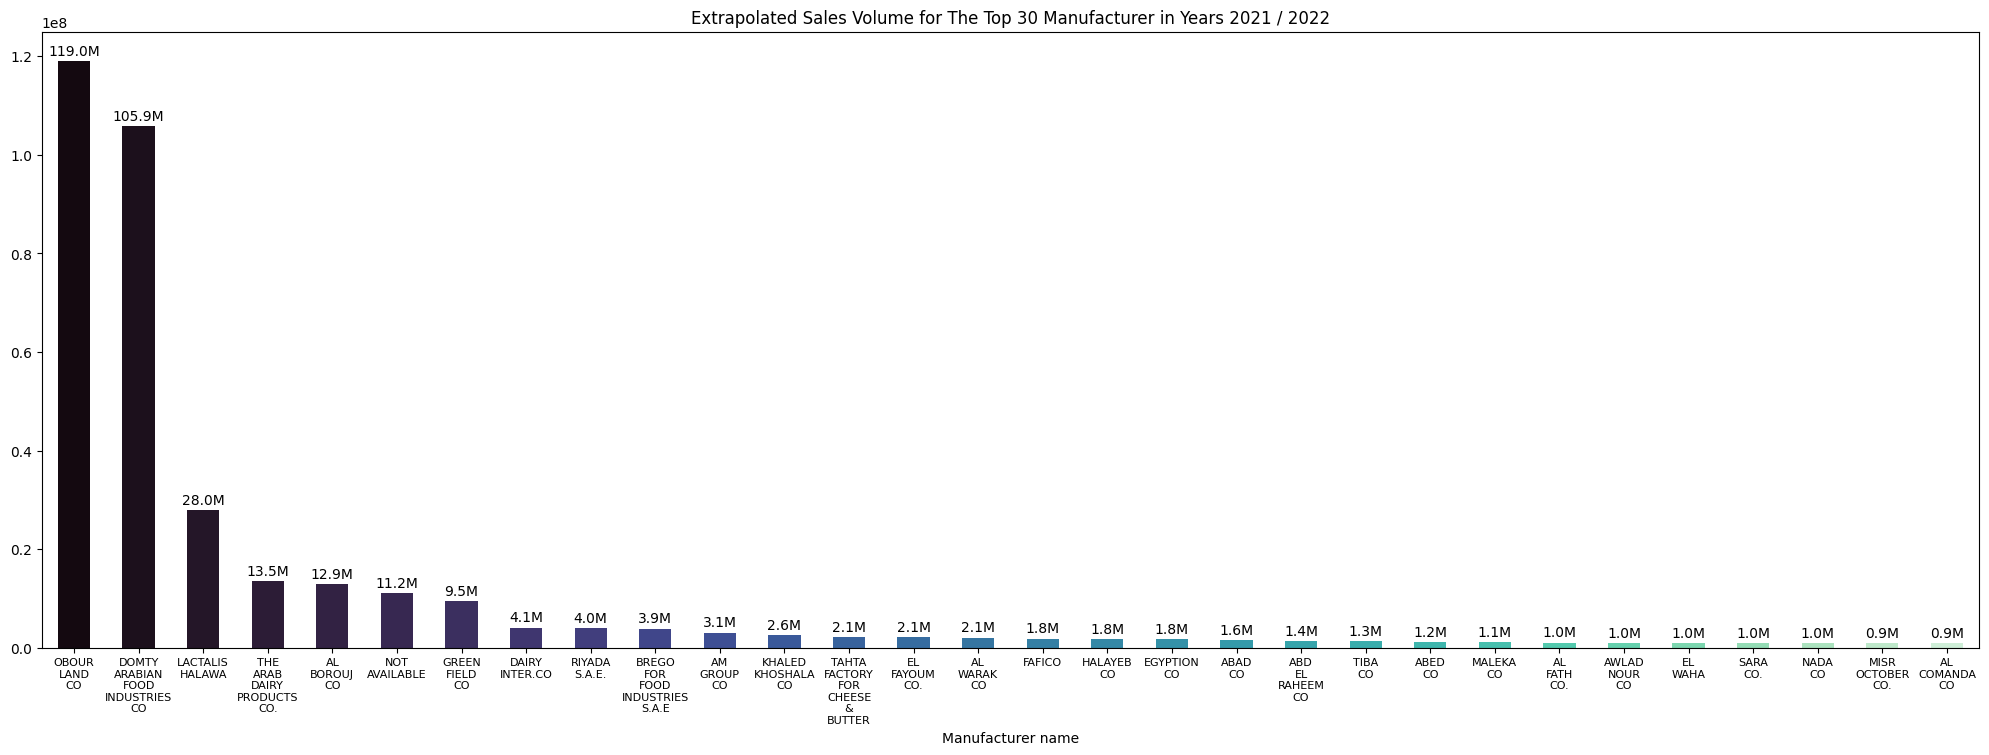

In [6]:
manufacturer_sales = data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30)
top_30_labels = [format_label(label) for label in manufacturer_sales.index]

palette = sns.color_palette('mako', len(manufacturer_sales))
plt.figure(figsize=(25,8))

ax = data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color=palette)
plt.title('Extrapolated Sales Volume for The Top 30 Manufacturer in Years 2021 / 2022')
ax.set_xticklabels(top_30_labels)
plt.xticks(rotation=0, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, labels=[format_millions(val) for val in container.datavalues], label_type='edge', padding=2)

plt.show()

In [10]:
manufacturer_sales = data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(10)
manufacturer_sales.index

Index(['OBOUR LAND CO', 'DOMTY - ARABIAN FOOD INDUSTRIES CO',
       'LACTALIS-HALAWA', 'THE ARAB DAIRY PRODUCTS CO.', 'AL BOROUJ CO',
       'NOT AVAILABLE', 'GREEN FIELD CO', 'DAIRY INTER.CO', 'RIYADA S.A.E.',
       'BREGO FOR FOOD INDUSTRIES ( S.A.E )'],
      dtype='object', name='Manufacturer name')

In [11]:
manufacturer_sales = round((manufacturer_sales / data['Extrapolated Sales Volume'].sum()) * 100, 2)
manufacturer_sales

Manufacturer name
OBOUR LAND CO                          29.22
DOMTY - ARABIAN FOOD INDUSTRIES CO     25.99
LACTALIS-HALAWA                         6.87
THE ARAB DAIRY PRODUCTS CO.             3.31
AL BOROUJ CO                            3.17
NOT AVAILABLE                           2.74
GREEN FIELD CO                          2.33
DAIRY INTER.CO                          1.00
RIYADA S.A.E.                           0.98
BREGO FOR FOOD INDUSTRIES ( S.A.E )     0.96
Name: Extrapolated Sales Volume, dtype: float64

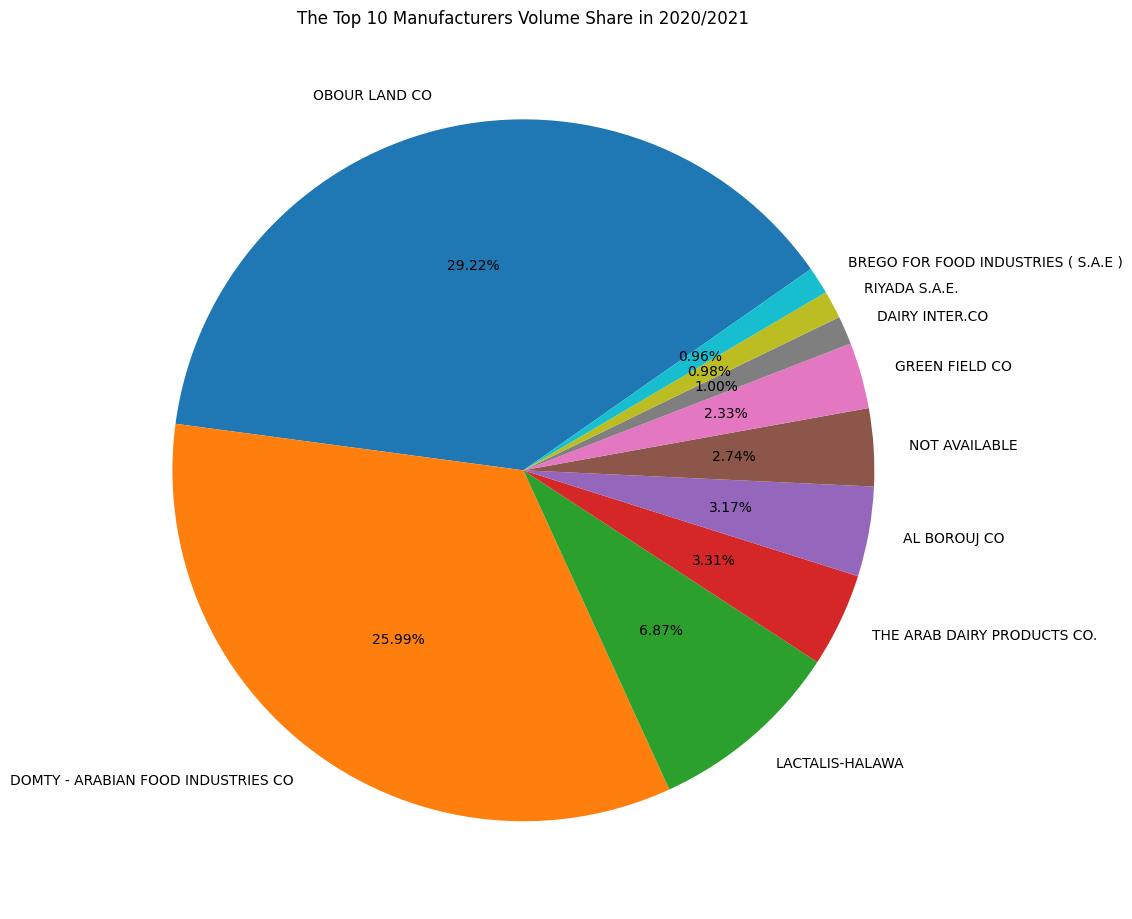

In [17]:
plt.figure(figsize=(11,10))

def autopct(pct):
    total = manufacturer_sales.sum()
    absolute = pct * total / 100
    return f"{absolute:.2f}%"

plt.pie(manufacturer_sales, labels=manufacturer_sales.index, autopct=autopct, startangle=35)
plt.title('The Top 10 Manufacturers Volume Share in 2020/2021')
# plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

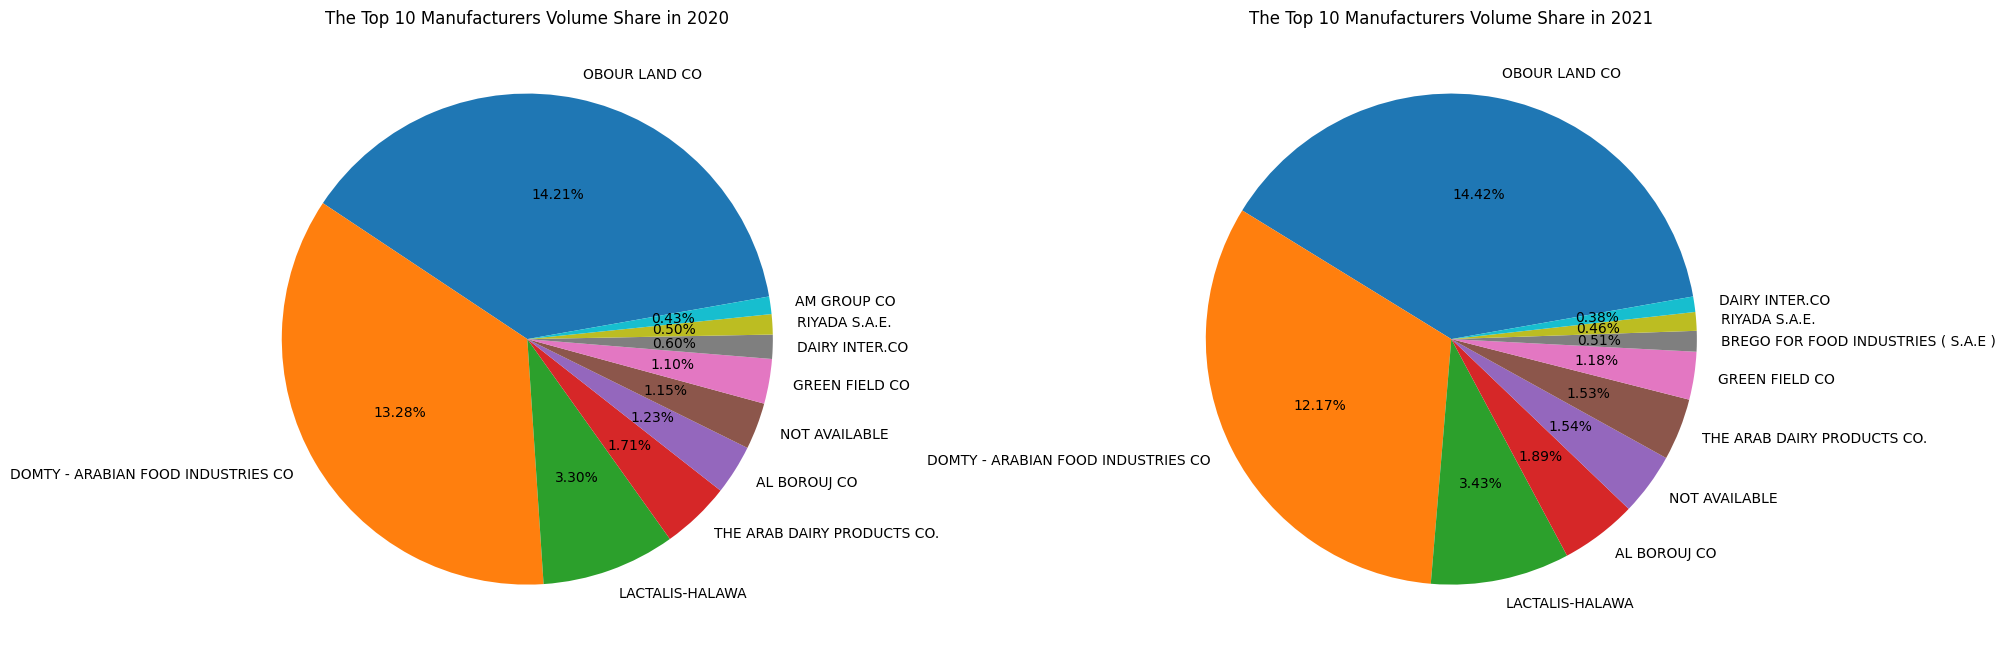

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# First pie chart for 2020
manufacturer_sales_2020 = data[data['PeriodDate'].dt.year == 2020].groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(10)
manufacturer_sales_2020 = round((manufacturer_sales_2020 / data['Extrapolated Sales Volume'].sum()) * 100, 2)

axs[0].pie(manufacturer_sales_2020, labels=manufacturer_sales_2020.index, autopct=autopct, startangle=10)
axs[0].set_title('The Top 10 Manufacturers Volume Share in 2020')

# Second pie chart for 2021
manufacturer_sales_2021 = data[data['PeriodDate'].dt.year == 2021].groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(10)
manufacturer_sales_2021 = round((manufacturer_sales_2021 / data['Extrapolated Sales Volume'].sum()) * 100, 2)

axs[1].pie(manufacturer_sales_2021, labels=manufacturer_sales_2021.index, autopct=autopct, startangle=10)
axs[1].set_title('The Top 10 Manufacturers Volume Share in 2021')

plt.tight_layout()
plt.show()

# 7. Categories Sales Analysis

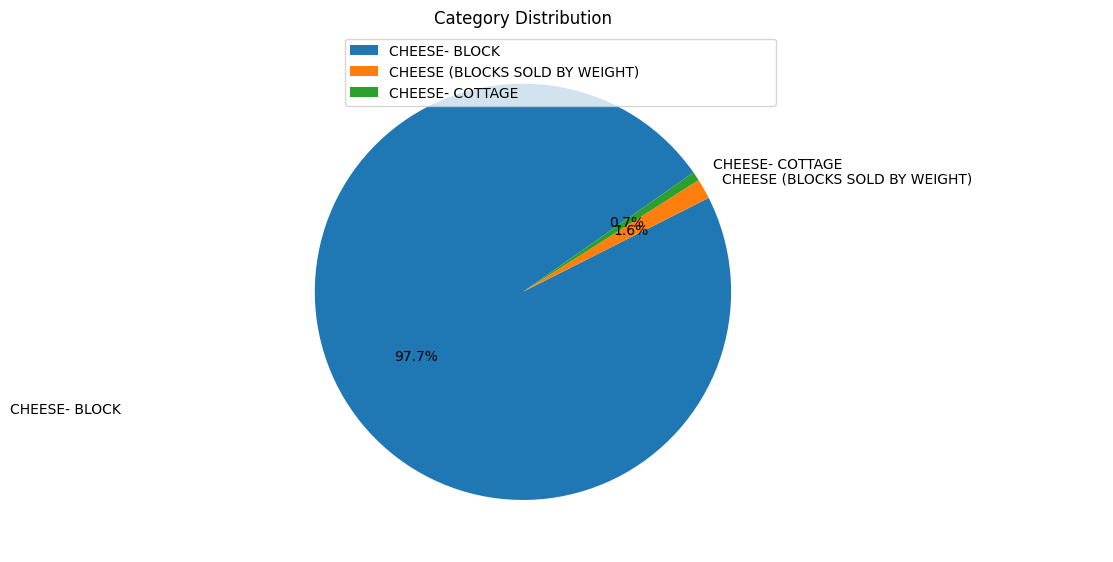

In [ ]:
category_count = data['Category name'].value_counts()

plt.figure(figsize=(10,9))
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=35)
plt.title('Category Distribution')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

In [ ]:
data.groupby('Category name')['Extrapolated Sales Volume'].sum()

Category name
CHEESE (BLOCKS SOLD BY WEIGHT)                                  9.717610e+07
CHEESE- BLOCK                                                   3.094155e+08
CHEESE- COTTAGE                                                 7.620507e+05
Name: Extrapolated Sales Volume, dtype: float64

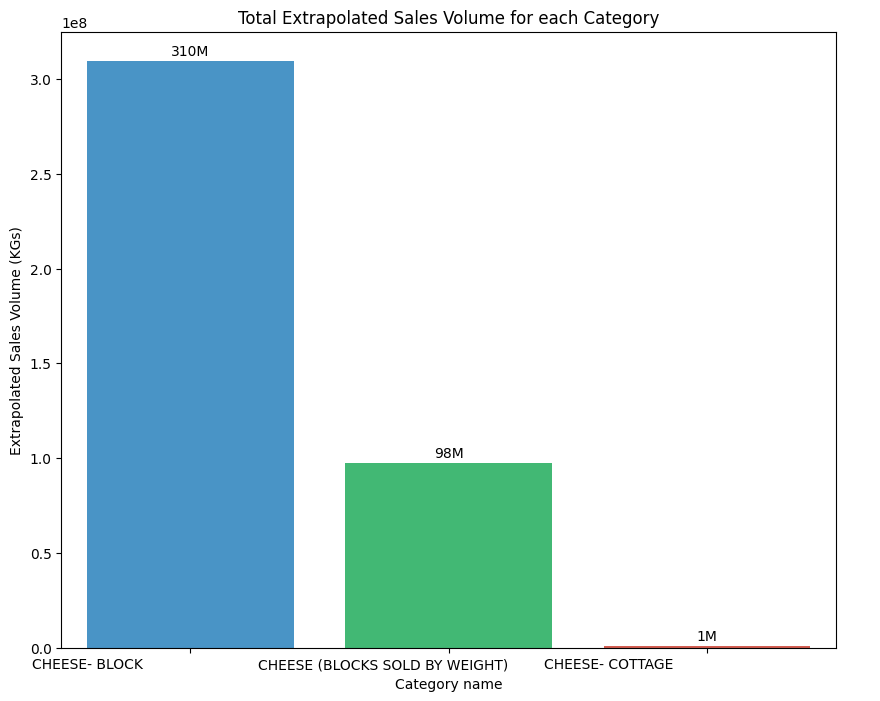

In [ ]:
plt.figure(figsize=(10,8))
colors = ['#3498db', '#2ecc71', '#e74c3c']
agg_data = data.groupby('Category name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(x='Category name', y='Extrapolated Sales Volume', data=agg_data, errorbar=None, palette=colors)
plt.title('Total Extrapolated Sales Volume for each Category')
plt.xlabel('Category name')
plt.ylabel('Extrapolated Sales Volume (KGs)')

for container in ax.containers:
    labels = [f'{ceil(v/1e6)}M' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', padding=2)

plt.show()

In [ ]:
data.groupby('Category name')['Extrapolated Sales Volume'].mean()

Category name
CHEESE (BLOCKS SOLD BY WEIGHT)                                  6304.813906
CHEESE- BLOCK                                                    322.028711
CHEESE- COTTAGE                                                  109.995772
Name: Extrapolated Sales Volume, dtype: float64

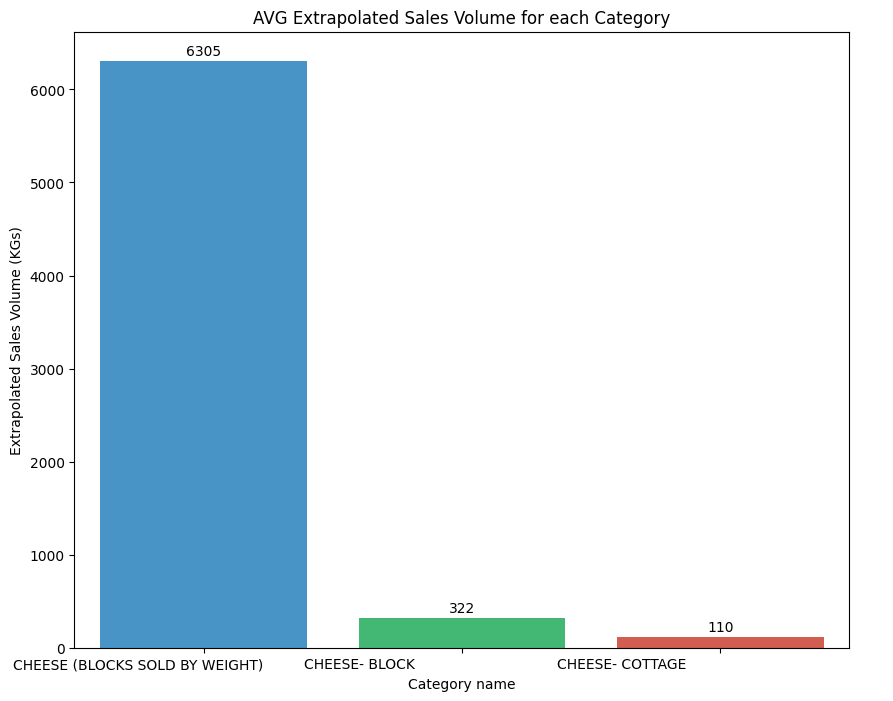

In [ ]:
plt.figure(figsize=(10,8))
agg_data = data.groupby('Category name')['Extrapolated Sales Volume'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(x='Category name', y='Extrapolated Sales Volume', data=agg_data, errorbar=None, palette=colors)
plt.title('AVG Extrapolated Sales Volume for each Category')
plt.xlabel('Category name')
plt.ylabel('Extrapolated Sales Volume (KGs)')

for container in ax.containers:
    labels = [f'{round(v)}' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', padding=2)

plt.show()

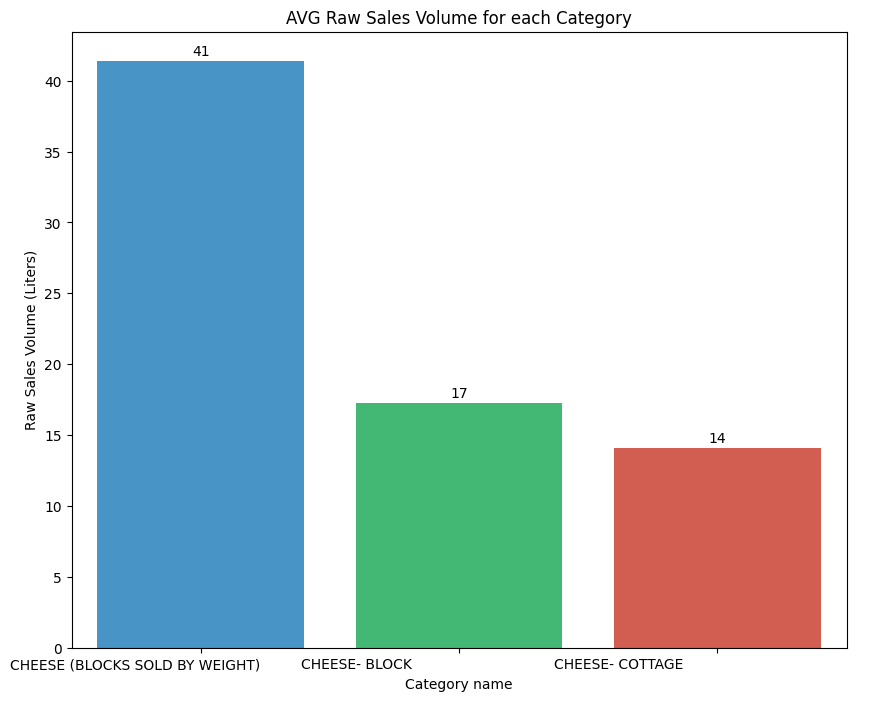

In [ ]:
plt.figure(figsize=(10,8))
agg_data = data.groupby('Category name')['Raw Sales Volume'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(x='Category name', y='Raw Sales Volume', data=agg_data, errorbar=None, palette=colors)
plt.title('AVG Raw Sales Volume for each Category')
plt.xlabel('Category name')
plt.ylabel('Raw Sales Volume (Liters)')

for container in ax.containers:
    labels = [f'{round(v)}' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', padding=2)

plt.show()

* **CHEESE (BLOCKS SOLD BY WEIGHT):** Given its high total and average sales, it appears to be a high-demand category with a tendency for bulk purchases. Retailers may want to ensure they have sufficient stock of these blocks and focus on promoting bulk offers.

* **CHEESE- BLOCK:** Despite having the highest total sales, the lower average sales suggest that it is bought in smaller quantities per purchase. This indicates that it has a broad customer base, but individual transactions may not involve large purchases. Retailers could focus on strategies to increase transaction size, such as bundling offers or discounts for larger quantities.

* **CHEESE- COTTAGE:** With both low total and average sales, cottage cheese appears to be a niche product. It may not be as popular as other cheese categories, so retailers might explore if it's worth increasing promotional efforts or if it's better to allocate resources to more popular categories.

* **CHEESE- BLOCK** sells the most overall, the **blocks sold by weight** seem to be more effective per transaction, and **cottage cheese** is a smaller market both in total and average sales.

In [ ]:
data.groupby(['Category name', 'Channel'])['Extrapolated Sales Volume'].mean().unstack()

Channel                                                       Haberdashery/Kiosk/Mekla  \
Category name                                                                            
CHEESE (BLOCKS SOLD BY WEIGHT)                                             2155.392247   
CHEESE- BLOCK                                                               606.622272   
CHEESE- COTTAGE                                                             709.168317   

Channel                                                       Large Grocery  \
Category name                                                                 
CHEESE (BLOCKS SOLD BY WEIGHT)                                  6745.631607   
CHEESE- BLOCK                                                   1558.478549   
CHEESE- COTTAGE                                                  808.325392   

Channel                                                       Small Grocery  \
Category name                                                                 
CHEESE (BLOCKS SOLD BY WEIGHT)                                  8365.946448   
CHEESE- BLOCK                                                   2086.189148   
CHEESE- COTTAGE                                                  398.083737   

Channel                                                       Supermarket/Key Account  
Category name                                                                          
CHEESE (BLOCKS SOLD BY WEIGHT)                                            1470.283156  
CHEESE- BLOCK                                                               32.820866  
CHEESE- COTTAGE                                                             44.179927

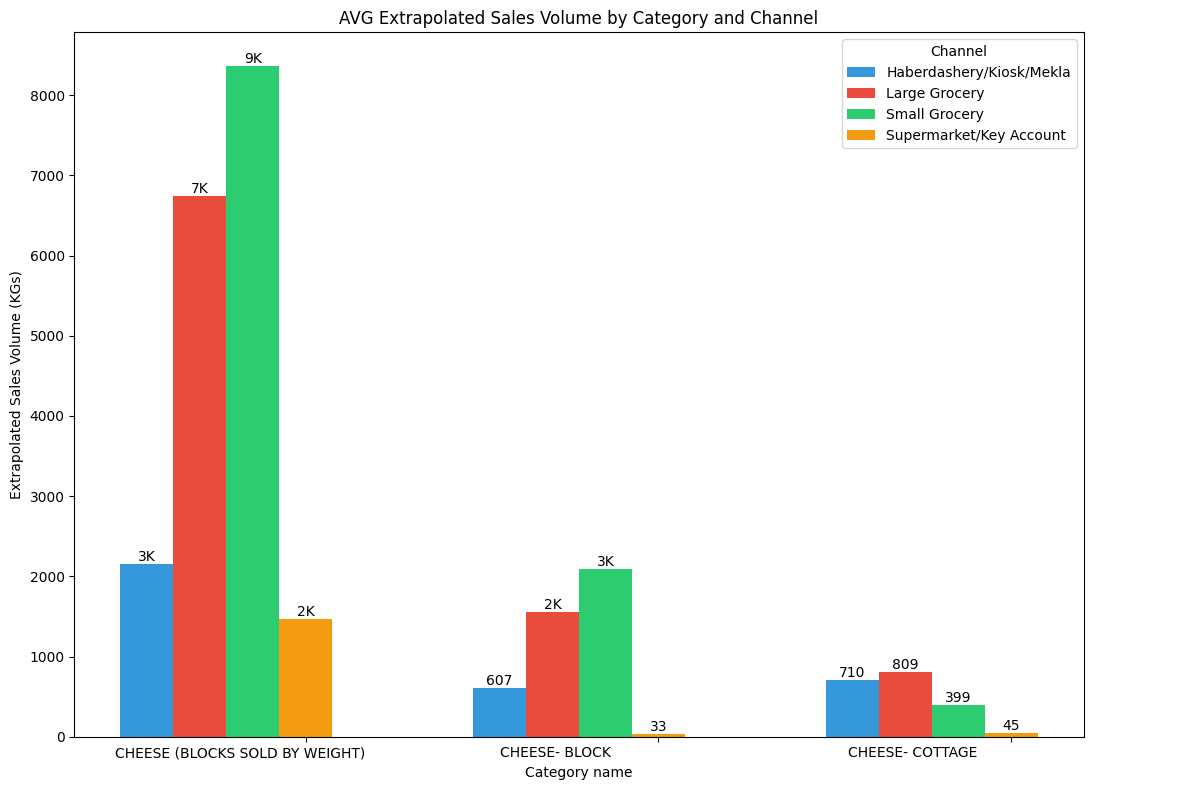

In [ ]:
grouped_data = data.groupby(['Category name', 'Channel'])['Extrapolated Sales Volume'].mean().unstack()

categories = grouped_data.index
channels = grouped_data.columns

x = np.arange(len(categories)) # Category positions on x-axis
bar_width = 0.15
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
plt.figure(figsize=(12, 8))

for i, channel in enumerate(channels):
    plt.bar(x + i * bar_width, grouped_data[channel], width=bar_width, label=channel, color=colors[i])

plt.title('AVG Extrapolated Sales Volume by Category and Channel')
plt.xlabel('Category name')
plt.ylabel('Extrapolated Sales Volume (KGs)')
plt.legend(title='Channel')

plt.xticks(x + bar_width * (len(channels) - 1), categories)

for i, channel in enumerate(channels):
    for j in range(len(categories)):
        if grouped_data[channel][j] >= 1e3:
          plt.text(j + i * bar_width, grouped_data[channel][j],
                  f'{ceil(grouped_data[channel][j]/1e3)}K',
                  ha='center', va='bottom')
        else:
          plt.text(j + i * bar_width, grouped_data[channel][j],
                  f'{ceil(grouped_data[channel][j])}',
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

* The highest sales volumes are observed for the **CHEESE (BLOCKS SOLD BY WEIGHT)** category, especially in the **Small Grocery** (8365.95) and **Large Grocery** (6745.63) channels. These two channels appear to drive most of the average sales for this product type.

* **Small and Large Grocery** stores dominate cheese sales across both **CHEESE (BLOCKS SOLD BY WEIGHT)** and **CHEESE-BLOCK** categories, showing they are the primary outlets for high-volume cheese purchases.

* **Supermarket/Key Account** channels show very low sales across all categories, which may indicate that these stores either do not focus heavily on cheese products or that their cheese selections are limited.

* **Cottage cheese** has the lowest average demand compared to other cheese categories, suggesting it is a niche product, with higher demand in **large grocery stores and kiosks**.

